# Sustainable Investing in New York City

Sustainability has become a core principal in businesses desiring the patronage of Millenials and Gen-Xers. When one thinks of sustainability, thoughts of renewable energy and Fair Trade products come to mind. Sustainable homes include using green energy, recycled water, and compostable waste. Sustainable real estate investing follows a similar ethos. It requires that investors not only make a profit, but do so in a way that elevates the community rather than dividing and dispersing it. 

New York City, like many metropoli, has long struggled with displacing long-time residents of neighborhoods when redevelopment occurs. This gentrification too often leads to morally questionable business transactions that benefit real estate developers to the detriment of established residents and only provides high-risk, short-term gains for both building owners and investors.

This analysis will demonstrate the long-term growth potential of such sustainable investing. 

# Step 1: Load the Data/Filtering for Chosen Zipcodes

In [1]:
import pandas as pd
import pandas.tseries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import statsmodels.api as sm
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')
import itertools

df = pd.read_csv('zillow_data.csv')
df.head(10)

RegionID  RegionName           City State              Metro  \
0     84654       60657        Chicago    IL            Chicago   
1     90668       75070       McKinney    TX  Dallas-Fort Worth   
2     91982       77494           Katy    TX            Houston   
3     84616       60614        Chicago    IL            Chicago   
4     93144       79936        El Paso    TX            El Paso   
5     91733       77084        Houston    TX            Houston   
6     61807       10467       New York    NY           New York   
7     84640       60640        Chicago    IL            Chicago   
8     91940       77449           Katy    TX            Houston   
9     97564       94109  San Francisco    CA      San Francisco   

      CountyName  SizeRank   1996-04   1996-05   1996-06  ...  2017-07  \
0           Cook         1  334200.0  335400.0  336500.0  ...  1005500   
1         Collin         2  235700.0  236900.0  236700.0  ...   308000   
2         Harris         3  210400.0  212200.0  212200.0  ...   321000   
3           Cook         4  498100.0  500900.0  503100.0  ...  1289800   
4        El Paso         5   77300.0   77300.0   77300.0  ...   119100   
5         Harris         6   95000.0   95200.0   95400.0  ...   157900   
6          Bronx         7  152900.0  152700.0  152600.0  ...   394400   
7           Cook         8  216500.0  216700.0  216900.0  ...   798000   
8         Harris         9   95400.0   95600.0   95800.0  ...   166800   
9  San Francisco        10  766000.0  771100.0  776500.0  ...  3767700   

   2017-08  2017-09  2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  \
0  1007500  1007800  1009600  1013300  1018700  1024400  1030700  1033800   
1   310000   312500   314100   315000   316600   318100   319600   321100   
2   320600   320200   320400   320800   321200   321200   323000   326900   
3  1287700  1287400  1291500  1296600  1299000  1302700  1306400  1308500   
4   119400   120000   120300   120300   120300   120300   120500   121000   
5   158700   160200   161900   162800   162800   162800   162900   163500   
6   400000   407300   411600   413200   414300   413900   411400   413200   
7   787100   776100   774900   777900   777900   778500   780500   782800   
8   167400   168400   169600   170900   172300   173300   174200   175400   
9  3763900  3775000  3799700  3793900  3778700  3770800  3763100  3779800   

   2018-04  
0  1030600  
1   321800  
2   329900  
3  1307000  
4   121500  
5   164300  
6   417900  
7   782800  
8   176200  
9  3813500  

[10 rows x 272 columns]

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [3]:
nyc_df = df[df['Metro']=='New York']
nyc_df

RegionID  RegionName        City State     Metro   CountyName  \
6         61807       10467    New York    NY  New York        Bronx   
10        62037       11226    New York    NY  New York        Kings   
12        62087       11375    New York    NY  New York       Queens   
13        62045       11235    New York    NY  New York        Kings   
20        61625       10011    New York    NY  New York     New York   
...         ...         ...         ...   ...       ...          ...   
14513     62305       11958     Peconic    NY  New York      Suffolk   
14530     61831       10518   Lewisboro    NY  New York  Westchester   
14535     62218       11739       Islip    NY  New York      Suffolk   
14567     61948       10964  Orangetown    NY  New York     Rockland   
14620     61817       10501      Somers    NY  New York  Westchester   

       SizeRank   1996-04   1996-05   1996-06  ...   2017-07   2017-08  \
6             7  152900.0  152700.0  152600.0  ...    394400    400000   
10           11  162000.0  162300.0  162600.0  ...    860200    851000   
12           13  252400.0  251800.0  251400.0  ...   1022600   1033700   
13           14  190500.0  191000.0  191500.0  ...    767300    777300   
20           21       NaN       NaN       NaN  ...  12137600  12112600   
...         ...       ...       ...       ...  ...       ...       ...   
14513     14514  177400.0  177200.0  176900.0  ...    673600    679300   
14530     14531  341700.0  339700.0  337600.0  ...    596000    603600   
14535     14536  235000.0  235700.0  236500.0  ...    527200    510200   
14567     14568  261200.0  262400.0  263400.0  ...    631700    629800   
14620     14621  288000.0  288400.0  288900.0  ...    600300    603700   

        2017-09   2017-10   2017-11   2017-12   2018-01   2018-02   2018-03  \
6        407300    411600    413200    414300    413900    411400    413200   
10       853900    870000    885100    887800    890500    901700    930700   
12      1048600   1066400   1081200   1088800   1092700   1089500   1084000   
13       788800    793900    796000    799700    806600    810600    813400   
20     12036600  12050100  12016300  11946500  11978100  11849300  11563000   
...         ...       ...       ...       ...       ...       ...       ...   
14513    675900    671400    684900    699900    700100    693200    687200   
14530    610100    617600    607200    587000    570100    554400    546700   
14535    495800    488400    485700    487100    487100    487900    486100   
14567    624000    622300    622400    624300    625100    628000    634100   
14620    605900    605200    603700    602300    602800    598800    594500   

        2018-04  
6        417900  
10       963200  
12      1084600  
13       816200  
20     11478300  
...         ...  
14513    678400  
14530    556700  
14535    482900  
14567    643000  
14620    595400  

[779 rows x 272 columns]

# Step 2: Data Preprocessing

In [4]:
def get_datetimes(df):
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [5]:
get_datetimes(nyc_df)

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [6]:
nyc_df.isnull().sum()

RegionID      0
RegionName    0
City          0
State         0
Metro         0
             ..
2017-12       0
2018-01       0
2018-02       0
2018-03       0
2018-04       0
Length: 272, dtype: int64

In [7]:
nyc_df.isna().any()[lambda x: x]
unique, counts = np.unique(nyc_df['RegionName'], return_counts=True)
dict(zip(unique, counts))

{7001: 1,
 7002: 1,
 7003: 1,
 7004: 1,
 7005: 1,
 7006: 1,
 7008: 1,
 7009: 1,
 7010: 1,
 7011: 1,
 7012: 1,
 7013: 1,
 7014: 1,
 7016: 1,
 7020: 1,
 7021: 1,
 7022: 1,
 7023: 1,
 7024: 1,
 7026: 1,
 7027: 1,
 7028: 1,
 7029: 1,
 7030: 1,
 7031: 1,
 7032: 1,
 7033: 1,
 7034: 1,
 7035: 1,
 7036: 1,
 7039: 1,
 7040: 1,
 7041: 1,
 7042: 1,
 7043: 1,
 7044: 1,
 7045: 1,
 7046: 1,
 7047: 1,
 7050: 1,
 7052: 1,
 7054: 1,
 7055: 1,
 7057: 1,
 7058: 1,
 7059: 1,
 7060: 1,
 7062: 1,
 7063: 1,
 7064: 1,
 7065: 1,
 7066: 1,
 7067: 1,
 7068: 1,
 7069: 1,
 7070: 1,
 7071: 1,
 7072: 1,
 7073: 1,
 7074: 1,
 7075: 1,
 7076: 1,
 7077: 1,
 7078: 1,
 7079: 1,
 7080: 1,
 7081: 1,
 7082: 1,
 7083: 1,
 7086: 1,
 7087: 1,
 7088: 1,
 7090: 1,
 7092: 1,
 7093: 1,
 7094: 1,
 7095: 1,
 7103: 1,
 7104: 1,
 7105: 1,
 7106: 1,
 7107: 1,
 7109: 1,
 7110: 1,
 7114: 1,
 7201: 1,
 7202: 1,
 7203: 1,
 7204: 1,
 7205: 1,
 7206: 1,
 7208: 1,
 7302: 1,
 7305: 1,
 7306: 1,
 7307: 1,
 7401: 1,
 7403: 1,
 7405: 1,
 7407: 1,


In [8]:
nyc_df.fillna(value=0)

RegionID  RegionName        City State     Metro   CountyName  \
6         61807       10467    New York    NY  New York        Bronx   
10        62037       11226    New York    NY  New York        Kings   
12        62087       11375    New York    NY  New York       Queens   
13        62045       11235    New York    NY  New York        Kings   
20        61625       10011    New York    NY  New York     New York   
...         ...         ...         ...   ...       ...          ...   
14513     62305       11958     Peconic    NY  New York      Suffolk   
14530     61831       10518   Lewisboro    NY  New York  Westchester   
14535     62218       11739       Islip    NY  New York      Suffolk   
14567     61948       10964  Orangetown    NY  New York     Rockland   
14620     61817       10501      Somers    NY  New York  Westchester   

       SizeRank   1996-04   1996-05   1996-06  ...   2017-07   2017-08  \
6             7  152900.0  152700.0  152600.0  ...    394400    400000   
10           11  162000.0  162300.0  162600.0  ...    860200    851000   
12           13  252400.0  251800.0  251400.0  ...   1022600   1033700   
13           14  190500.0  191000.0  191500.0  ...    767300    777300   
20           21       0.0       0.0       0.0  ...  12137600  12112600   
...         ...       ...       ...       ...  ...       ...       ...   
14513     14514  177400.0  177200.0  176900.0  ...    673600    679300   
14530     14531  341700.0  339700.0  337600.0  ...    596000    603600   
14535     14536  235000.0  235700.0  236500.0  ...    527200    510200   
14567     14568  261200.0  262400.0  263400.0  ...    631700    629800   
14620     14621  288000.0  288400.0  288900.0  ...    600300    603700   

        2017-09   2017-10   2017-11   2017-12   2018-01   2018-02   2018-03  \
6        407300    411600    413200    414300    413900    411400    413200   
10       853900    870000    885100    887800    890500    901700    930700   
12      1048600   1066400   1081200   1088800   1092700   1089500   1084000   
13       788800    793900    796000    799700    806600    810600    813400   
20     12036600  12050100  12016300  11946500  11978100  11849300  11563000   
...         ...       ...       ...       ...       ...       ...       ...   
14513    675900    671400    684900    699900    700100    693200    687200   
14530    610100    617600    607200    587000    570100    554400    546700   
14535    495800    488400    485700    487100    487100    487900    486100   
14567    624000    622300    622400    624300    625100    628000    634100   
14620    605900    605200    603700    602300    602800    598800    594500   

        2018-04  
6        417900  
10       963200  
12      1084600  
13       816200  
20     11478300  
...         ...  
14513    678400  
14530    556700  
14535    482900  
14567    643000  
14620    595400  

[779 rows x 272 columns]

As we can see from the above list of zipcodes, there is only one property represented per zipcode. This ensures a balanced analysis, as there is an even number of properties across zipcodes. The downside is that a single property may not be a true representation of an entire zipcode.

# Step 3: EDA and Visualization

As we saw above, some of the zip codes were represented by buildings that were not yet constructed in April 1996 (hence the null values). The next step is to find the top five properties with the largest difference between their original value and their respective values in April 2018. 

## 3A: Local + Proven
These would be the real-estate equivalents of Google or Amazon--investments that have had excellent growth and are expected to continue growing.

In [9]:
top_five_df_1996 = []
for i in nyc_df:
    nyc_df_1996 = (nyc_df['2018-04'] - nyc_df['1996-04'])/ nyc_df['1996-04']
    top_five_df_1996.append(nyc_df_1996)

nyc_df_1996.nlargest(5)

117     11.189940
1155    10.535523
475      9.942505
191      9.403061
106      8.941958
dtype: float64

In [10]:
top_five_df_2005 = []
for i in nyc_df:
    nyc_df_2005 = (nyc_df['2018-04'] - nyc_df['2005-04'])/ nyc_df['2005-04']
    top_five_df_2005.append(nyc_df_2005)

nyc_df_2005.nlargest(5)

475     2.492899
117     2.372871
1155    2.268325
156     2.166136
1534    2.048191
dtype: float64

In [11]:
top_five_df_2014 = []
for i in nyc_df:
    nyc_df_2014 = (nyc_df['2018-04'] - nyc_df['2014-04'])/ nyc_df['2014-04']
    top_five_df_2014.append(nyc_df_2014)

nyc_df_2014.nlargest(15)

660     1.063162
7007    1.012085
475     0.928003
1737    0.922617
190     0.880627
191     0.832927
1155    0.805223
8495    0.761101
70      0.747542
2043    0.729818
519     0.718695
1065    0.717151
3334    0.712431
319     0.705547
6330    0.639090
dtype: float64

In [12]:
top_nyc_df = nyc_df[(nyc_df.SizeRank==661) | (nyc_df.SizeRank==7008) | (nyc_df.SizeRank==476) | (nyc_df.SizeRank==1738) | (nyc_df.SizeRank==191)]
top_nyc_df

RegionID  RegionName         City State     Metro CountyName  SizeRank  \
190      62043       11233     New York    NY  New York      Kings       191   
475      62027       11216     New York    NY  New York      Kings       476   
660      60643        7306  Jersey City    NJ  New York     Hudson       661   
1737     60644        7307  Jersey City    NJ  New York     Hudson      1738   
7007     62310       11963       Noyack    NY  New York    Suffolk      7008   

       1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  2017-10  \
190   124500.0  124500.0  124500.0  ...   788800   788000   787100   797100   
475   146100.0  146600.0  147200.0  ...  1452000  1506100  1553100  1567700   
660   111400.0  111100.0  110900.0  ...   465400   469800   475900   484000   
1737  114300.0  114300.0  114400.0  ...   439500   449000   458300   468100   
7007  230300.0  230800.0  231500.0  ...  1591400  1600300  1599200  1608000   

      2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
190    808400   809800   800800   806100   829200   852300  
475   1559700  1545700  1540200  1553600  1578400  1598700  
660    495800   506700   510000   515300   531900   545500  
1737   478200   487300   496000   510600   531900   546600  
7007  1632200  1679800  1736600  1749800  1727300  1714900  

[5 rows x 272 columns]

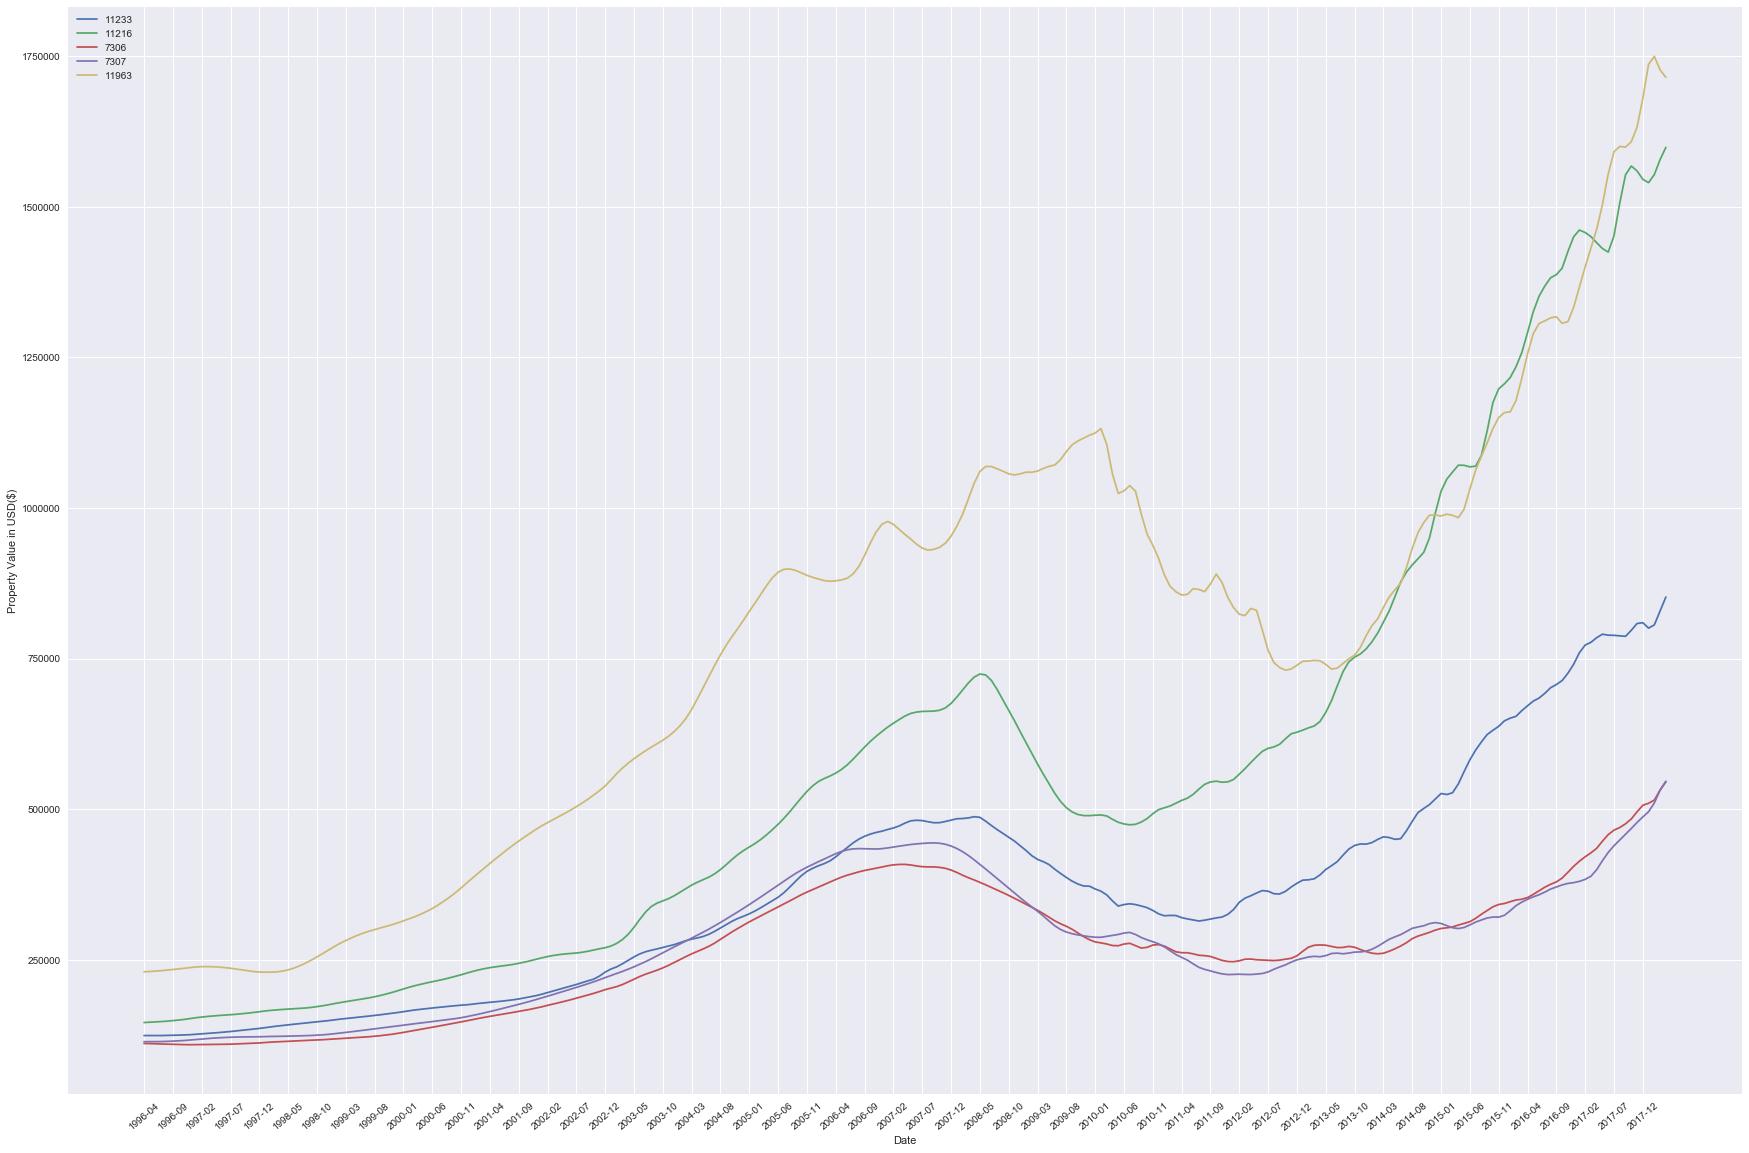

In [17]:
ind_df = (top_nyc_df.drop(columns=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']))
plt.figure(figsize=(30, 20))
plt.xlabel('Date')
plt.xticks(np.arange(0, 265, step=5), rotation=40)
plt.ylabel('Property Value in USD($)')
plt.plot(ind_df.T)
plt.legend(top_nyc_df['RegionName'], loc='upper left')
plt.show()

## 3B: Local + Potential
These would be the real-estate equivalents of "junk" stocks--stocks that have had negative or low gains and who have the potential for being at their lowest, or bargain price for the time.

In [18]:
nyc_df_1996.nsmallest(5)

9897     0.405316
9496     0.407243
11815    0.477931
13772    0.497931
13853    0.498168
dtype: float64

In [19]:
nyc_df_2005.nsmallest(5)

5866    -0.344296
13381   -0.340430
10030   -0.339034
9496    -0.310644
8995    -0.309700
dtype: float64

In [20]:
nyc_df_2014.nsmallest(15)

12353   -0.119973
14535   -0.102750
8947    -0.088762
7020    -0.042553
13381   -0.036640
13853   -0.028504
6375    -0.018782
508     -0.018740
7119    -0.018564
9723    -0.017391
12876   -0.016295
12581   -0.013788
10030   -0.012389
4072    -0.002674
14369   -0.002594
dtype: float64

In [21]:
pot_nyc_df = nyc_df[(nyc_df.SizeRank==12354) | (nyc_df.SizeRank==14536) | (nyc_df.SizeRank==8948) | (nyc_df.SizeRank==7021) | (nyc_df.SizeRank==13382)]
pot_nyc_df

RegionID  RegionName         City State     Metro   CountyName  \
7020      62737       12771  Port Jervis    NY  New York       Orange   
8947      65422       18328     Delaware    PA  New York         Pike   
12353     60872        7931    Far Hills    NJ  New York     Somerset   
13381     61872       10577     Purchase    NY  New York  Westchester   
14535     62218       11739        Islip    NY  New York      Suffolk   

       SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
7020       7021   63100.0   63000.0   62800.0  ...   124300   124500   124200   
8947       8948   74300.0   74500.0   74600.0  ...   123900   125500   127300   
12353     12354  627500.0  628800.0  630000.0  ...  1102400  1096000  1090900   
13381     13382  581800.0  585700.0  589600.0  ...  1107200  1101700  1084200   
14535     14536  235000.0  235700.0  236500.0  ...   527200   510200   495800   

       2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
7020    123300   124200   126500   128300   129300   129900   130500  
8947    128100   127700   126600   127000   128000   128000   127300  
12353  1084300  1067600  1051900  1045600  1046500  1048200  1048200  
13381  1058800  1041500  1041300  1046300  1048100  1050800  1059600  
14535   488400   485700   487100   487100   487900   486100   482900  

[5 rows x 272 columns]

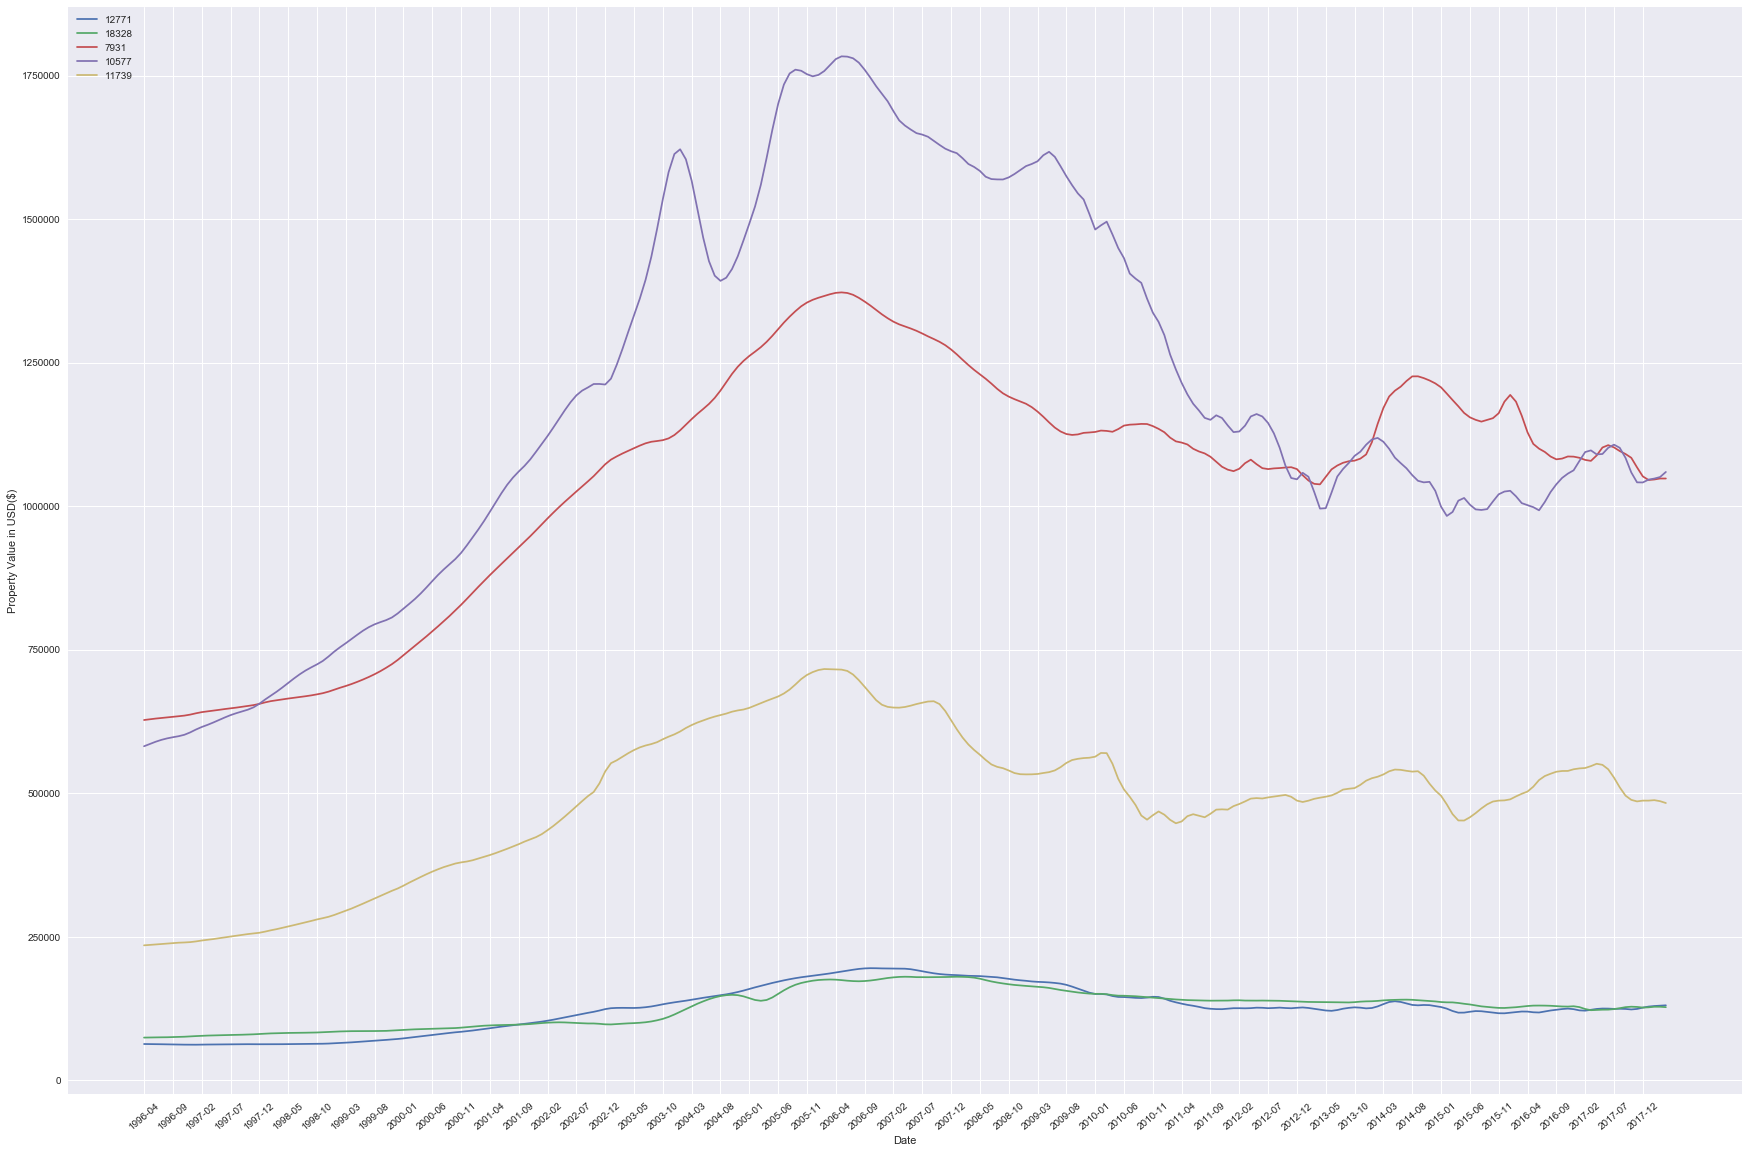

In [22]:
pot_df = (pot_nyc_df.drop(columns=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']))
plt.figure(figsize=(30, 20))
plt.xlabel('Date')
plt.xticks(np.arange(0, 265, step=5), rotation=40)
plt.ylabel('Property Value in USD($)')
plt.plot(pot_df.T)
plt.legend(pot_nyc_df['RegionName'], loc='upper left')
plt.show()

In [23]:
pot_nyc_df_96 = nyc_df[(nyc_df.SizeRank==9898) | (nyc_df.SizeRank==9497) | (nyc_df.SizeRank==11816) | (nyc_df.SizeRank==13773) | (nyc_df.SizeRank==13854)]
pot_nyc_df_96

RegionID  RegionName            City State     Metro   CountyName  \
9496      60685        7462          Vernon    NJ  New York       Sussex   
9897      60663        7422   Highland Lake    NJ  New York       Sussex   
11815     62690       12594           Dover    NY  New York     Dutchess   
13772     60659        7418   Vernon Valley    NJ  New York       Sussex   
13853     61838       10526  Goldens Bridge    NY  New York  Westchester   

       SizeRank   1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  \
9496       9497  135300.0  135000.0  134800.0  ...   170600   172200   174000   
9897       9898  120400.0  120400.0  120400.0  ...   139700   142600   145700   
11815     11816  145000.0  144500.0  144100.0  ...   215700   216900   215800   
13772     13773  145000.0  144800.0  144500.0  ...   214500   207500   199800   
13853     13854  300300.0  297800.0  295400.0  ...   479500   481900   481200   

       2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
9496    175000   177700   181600   184900   187700   189800   190400  
9897    149900   154600   159600   164500   167900   169100   169200  
11815   214600   214000   211000   205400   204400   209900   214300  
13772   198400   201900   206700   209500   210900   214000   217200  
13853   474400   466800   464400   465600   461800   454800   449900  

[5 rows x 272 columns]

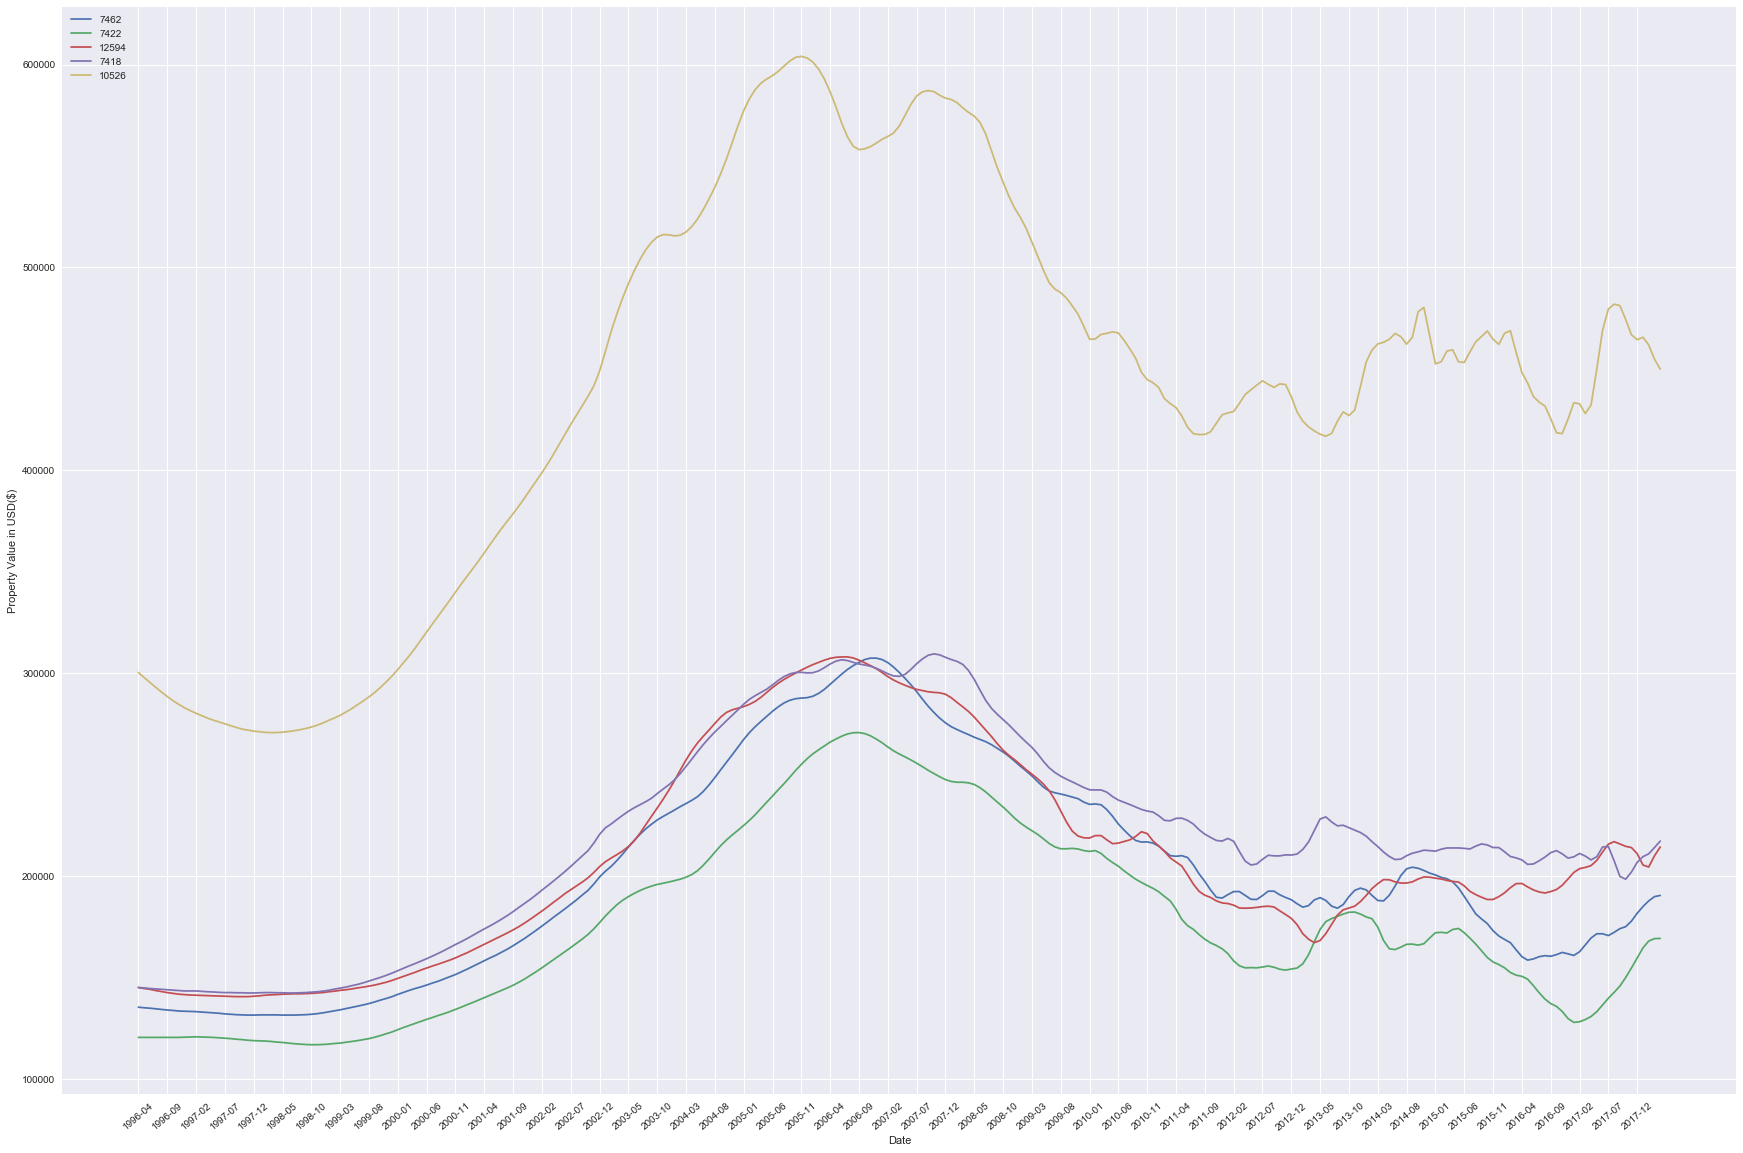

In [24]:
pot_df_96 = (pot_nyc_df_96.drop(columns=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']))
plt.figure(figsize=(30, 20))
plt.xlabel('Date')
plt.xticks(np.arange(0, 265, step=5), rotation=40)
plt.ylabel('Property Value in USD($)')
plt.plot(pot_df_96.T)
plt.legend(pot_nyc_df_96['RegionName'], loc='upper left')
plt.show()

## 3C: National + Proven
The same concept with our proven group in the NYC-Metro area applied nationally.

In [25]:
get_datetimes(df)

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [26]:
df.isnull().sum()

RegionID         0
RegionName       0
City             0
State            0
Metro         1043
              ... 
2017-12          0
2018-01          0
2018-02          0
2018-03          0
2018-04          0
Length: 272, dtype: int64

In [27]:
top_five_nat_df_1996 = []
for i in df:
    df_1996 = (df['2018-04'] - df['1996-04'])/ df['1996-04']
    top_five_nat_df_1996.append(df_1996)

df_1996.nlargest(5)

117     11.189940
1155    10.535523
475      9.942505
191      9.403061
106      8.941958
dtype: float64

In [28]:
top_five_nat_df_2005 = []
for i in df:
    df_2005 = (df['2018-04'] - df['2005-04'])/ df['2005-04']
    top_five_nat_df_2005.append(df_2005)

df_2005.nlargest(5)

6563    2.527619
475     2.492899
117     2.372871
1155    2.268325
156     2.166136
dtype: float64

In [29]:
top_five_nat_df_2014 = []
for i in df:
    df_2014 = (df['2018-04'] - df['2014-04'])/ df['2014-04']
    top_five_nat_df_2014.append(df_2014)

df_2014.nlargest(15)

13409    1.855159
842      1.790554
6563     1.338384
6105     1.253731
4554     1.233115
3325     1.200000
1754     1.187500
4712     1.183630
3794     1.174693
7302     1.164372
3832     1.147079
1835     1.133900
2347     1.125180
3188     1.124431
2522     1.121646
dtype: float64

In [30]:
top_nat_df = df[(df.SizeRank==13410) | (df.SizeRank==843) | (df.SizeRank==6564) | (df.SizeRank==6106) | (df.SizeRank==4555)]
top_nat_df

RegionID  RegionName            City State           Metro  CountyName  \
842       70817       30032  Candler-Mcafee    GA         Atlanta      Dekalb   
4554      72830       33805        Lakeland    FL        Lakeland        Polk   
6105      74241       37210       Nashville    TN       Nashville    Davidson   
6563      63932       15201      Pittsburgh    PA      Pittsburgh   Allegheny   
13409     69649       27980        Hertford    NC  Elizabeth City  Perquimans   

       SizeRank  1996-04  1996-05  1996-06  ...  2017-07  2017-08  2017-09  \
842         843      NaN      NaN      NaN  ...   103300   107700   111700   
4554       4555  41900.0  41900.0  42000.0  ...    85900    87800    89600   
6105       6106  60800.0  61000.0  61200.0  ...   201200   204600   207700   
6563       6564  34400.0  34600.0  34700.0  ...   162300   164400   166100   
13409     13410      NaN      NaN      NaN  ...   104200   106600   109900   

       2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
842     114600   118300   122300   125400   128600   132800   135900  
4554     91800    94400    97000    99000   100400   101600   102500  
6105    211100   214500   217200   219300   221500   224300   226500  
6563    167600   169000   170400   171400   173900   179700   185200  
13409   114000   118100   122200   126600   130600   137300   143900  

[5 rows x 272 columns]

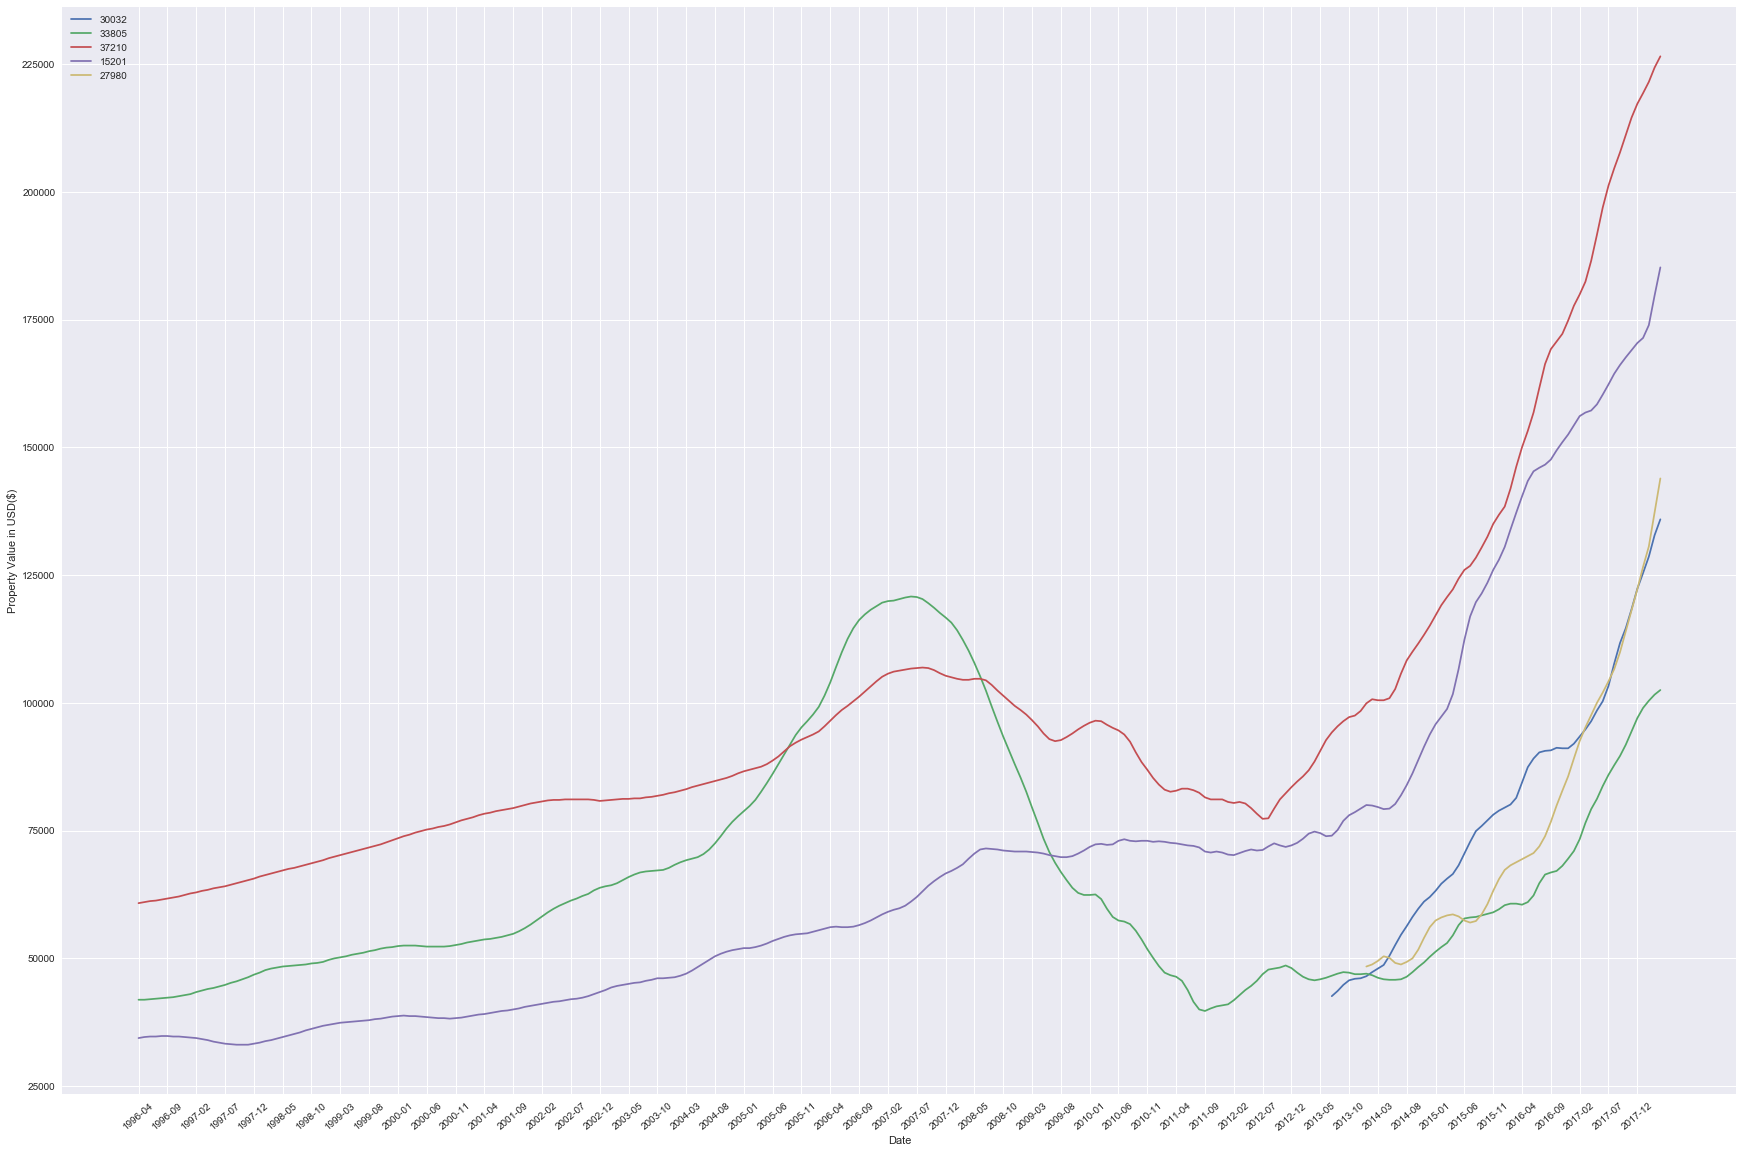

In [31]:
top_nat_slim_df = (top_nat_df.drop(columns=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']))
plt.figure(figsize=(30, 20))
plt.xlabel('Date')
plt.xticks(np.arange(0, 265, step=5), rotation=40)
plt.ylabel('Property Value in USD($)')
plt.plot(top_nat_slim_df.T)
plt.legend(top_nat_df['RegionName'], loc='upper left')
plt.show()

In [32]:
top_nat_df_96 = df[(df.SizeRank==118) | (df.SizeRank==1156) | (df.SizeRank==476) | (df.SizeRank==192) | (df.SizeRank==107)]
top_nat_df_96

RegionID  RegionName         City State     Metro CountyName  SizeRank  \
106      62026       11215     New York    NY  New York      Kings       107   
117      62022       11211     New York    NY  New York      Kings       118   
191      60639        7302  Jersey City    NJ  New York     Hudson       192   
475      62027       11216     New York    NY  New York      Kings       476   
1155     62033       11222     New York    NY  New York      Kings      1156   

       1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  2017-10  \
106   225700.0  227500.0  229400.0  ...  2173600  2201100  2244400  2266100   
117   133200.0  132900.0  132500.0  ...  1405100  1406400  1424700  1435300   
191   137200.0  137800.0  138500.0  ...  1340200  1372300  1411000  1435900   
475   146100.0  146600.0  147200.0  ...  1452000  1506100  1553100  1567700   
1155  149200.0  148400.0  147500.0  ...  1598000  1623800  1638700  1640400   

      2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
106   2275800  2287100  2288900  2265300  2244900  2243900  
117   1440500  1463100  1496100  1531100  1581900  1623700  
191   1446300  1447800  1454900  1453900  1439500  1427300  
475   1559700  1545700  1540200  1553600  1578400  1598700  
1155  1644100  1651200  1661800  1672800  1694000  1721100  

[5 rows x 272 columns]

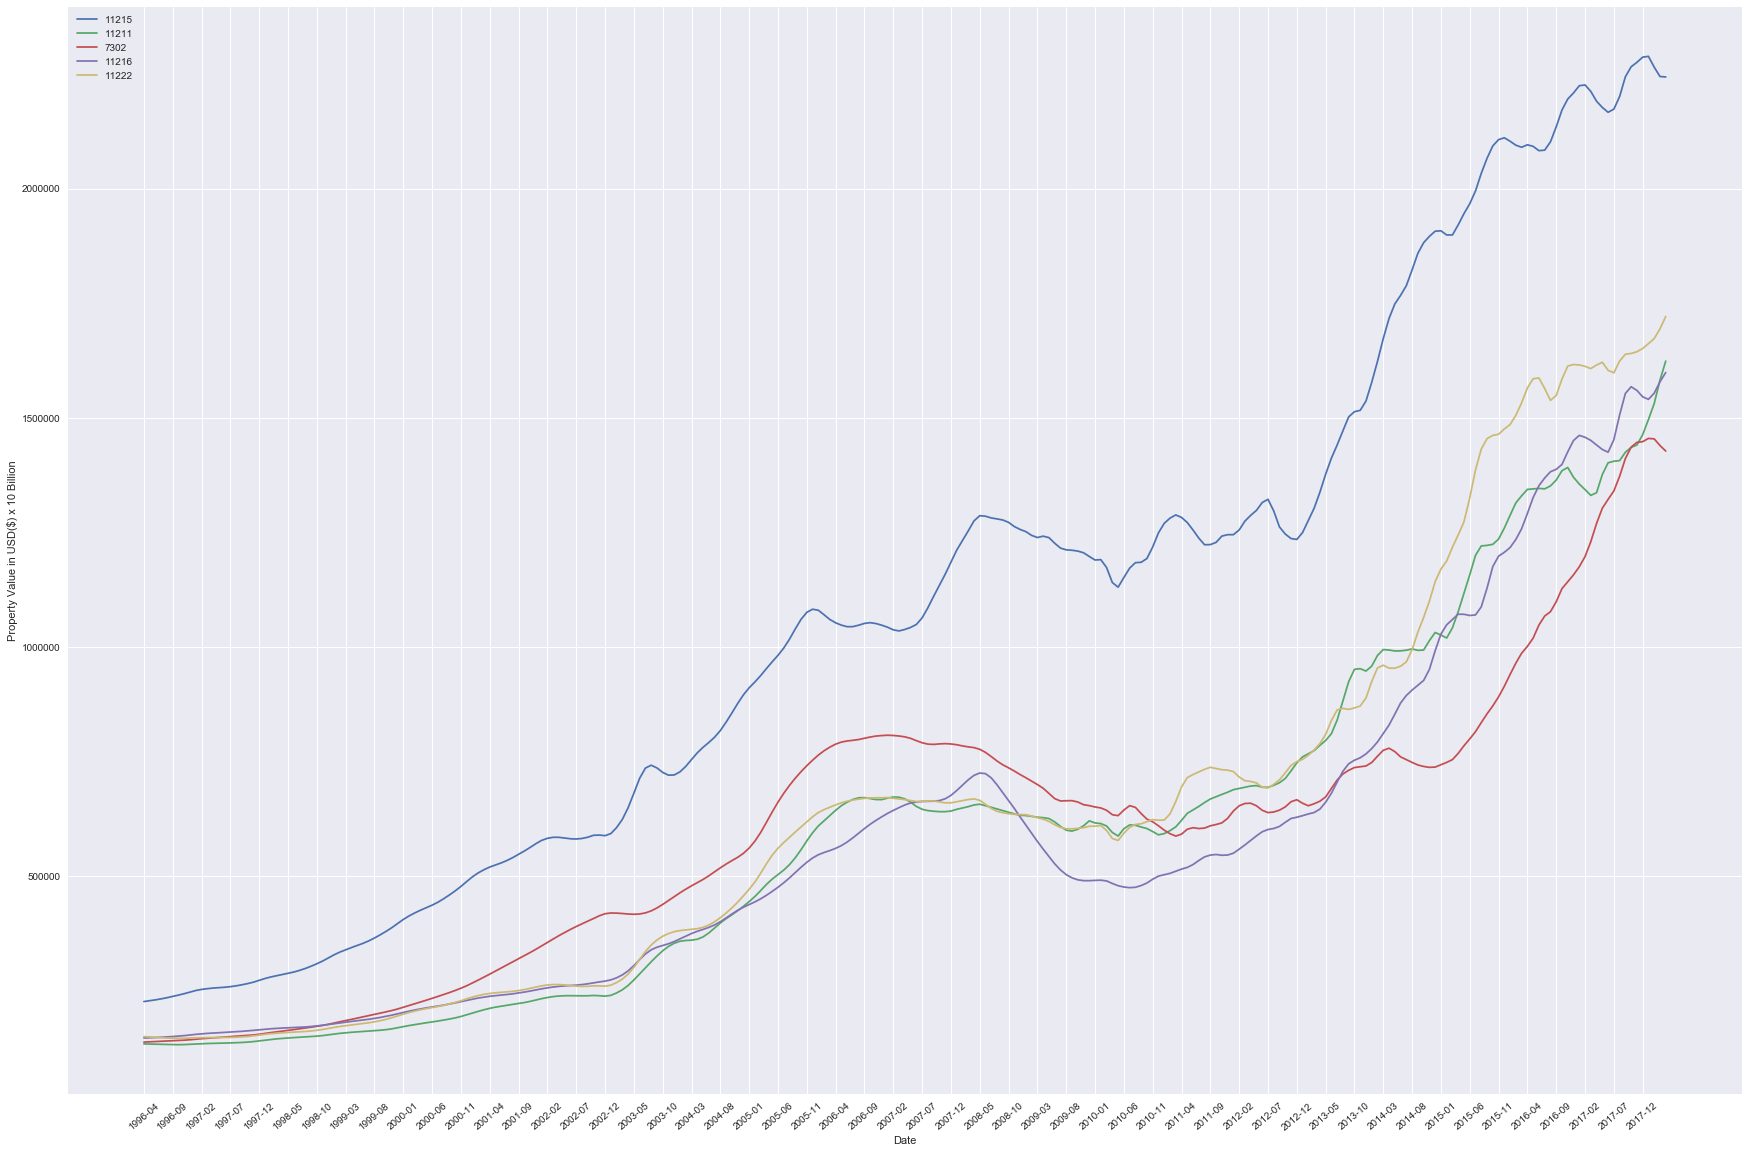

In [33]:
top_nat_slim_df_96 = (top_nat_df_96.drop(columns=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']))
plt.figure(figsize=(30, 20))
plt.xlabel('Date')
plt.xticks(np.arange(0, 265, step=5), rotation=40)
plt.ylabel('Property Value in USD($) x 10 Billion')
plt.plot(top_nat_slim_df_96.T)
plt.legend(top_nat_df_96['RegionName'], loc='upper left')
plt.show()

## 3D. National + Potential
The same concept with our potential group in the NYC-Metro area applied nationally.

In [34]:
df_1996.nsmallest(5)

4149    -0.532609
4381    -0.515924
5068    -0.375469
7402    -0.328704
13845   -0.327154
dtype: float64

In [35]:
df_2005.nsmallest(5)

4149   -0.676692
4381   -0.655068
5278   -0.480181
876    -0.450194
4142   -0.446298
dtype: float64

In [36]:
df_2014.nsmallest(15)

12436   -0.309129
13485   -0.252874
7435    -0.241877
8474    -0.233333
4294    -0.221182
5690    -0.220648
7815    -0.217320
9558    -0.213359
14300   -0.187500
11355   -0.178378
5489    -0.177620
6745    -0.166667
4464    -0.161392
5522    -0.161220
14387   -0.156368
dtype: float64

In [37]:
pot_nat_df = df[(df.SizeRank==12437) | (df.SizeRank==13486) | (df.SizeRank==7436) | (df.SizeRank==8475) | (df.SizeRank==4295)]
pot_nat_df

RegionID  RegionName         City State           Metro  CountyName  \
4294      77592       45331   Greenville    OH      Greenville       Darke   
7435      69622       27944     Hertford    NC  Elizabeth City  Perquimans   
8474      75337       39530       Biloxi    MS        Gulfport    Harrison   
12436     77643       45390   Union City    OH      Greenville       Darke   
13485     77607       45346  New Madison    OH      Greenville       Darke   

       SizeRank  1996-04  1996-05  1996-06  ...  2017-07  2017-08  2017-09  \
4294       4295      NaN      NaN      NaN  ...   122600   122900   123500   
7435       7436      NaN      NaN      NaN  ...   149400   150100   153900   
8474       8475      NaN      NaN      NaN  ...    74600    76400    77600   
12436     12437      NaN      NaN      NaN  ...    72600    72400    72500   
13485     13486      NaN      NaN      NaN  ...   102600   103400   103900   

       2017-10  2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
4294    123400   121700   119600   118600   115800   111200   108100  
7435    156100   152900   146400   140600   139300   143600   147000  
8474     78100    77600    76700    76500    76600    76100    75900  
12436    72600    72100    71500    71100    69700    67700    66600  
13485   104000   102500   100600   100000    98200    94100    91000  

[5 rows x 272 columns]

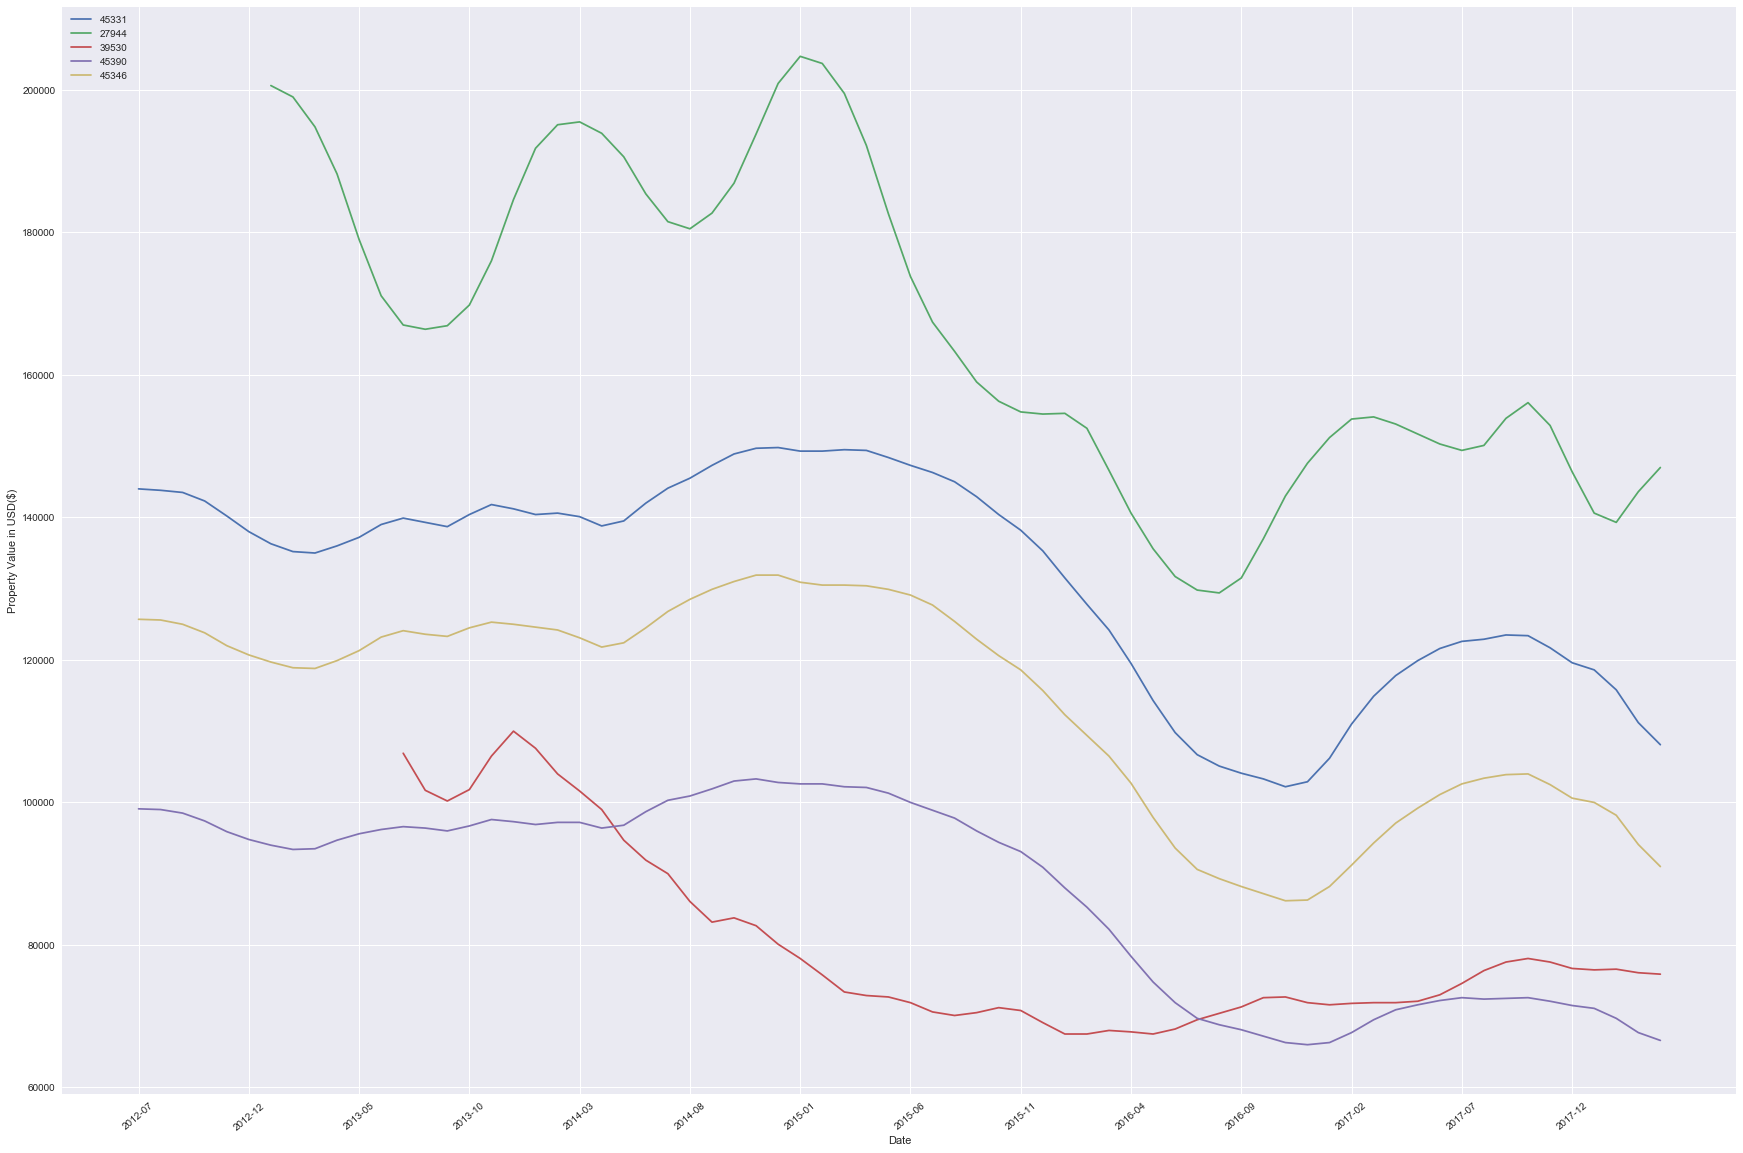

In [38]:
pot_nat_slim_df = (pot_nat_df.drop(columns=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']))
plt.figure(figsize=(30, 20))
plt.xlabel('Date')
plt.xticks(np.arange(0, 265, step=5), rotation=40)
plt.ylabel('Property Value in USD($)')
plt.plot(pot_nat_slim_df.T)
plt.legend(pot_nat_df['RegionName'], loc='upper left')
plt.show()

In [39]:
pot_nat_df_96 = df[(df.SizeRank==4150) | (df.SizeRank==4382) | (df.SizeRank==5069) | (df.SizeRank==7403) | (df.SizeRank==13846)]
pot_nat_df_96

RegionID  RegionName       City State      Metro CountyName  SizeRank  \
4149      79247       48506      Flint    MI      Flint    Genesee      4150   
4381      79244       48503      Flint    MI      Flint    Genesee      4382   
5068      92646       78735     Austin    TX     Austin     Travis      5069   
7402      64354       15902  Johnstown    PA  Johnstown    Cambria      7403   
13845     84758       61012     Capron    IL   Rockford      Boone     13846   

        1996-04   1996-05   1996-06  ...  2017-07  2017-08  2017-09  2017-10  \
4149    46000.0   46400.0   46800.0  ...    20900    21200    21800    22100   
4381    47100.0   47200.0   47400.0  ...    18200    18900    19700    20600   
5068   772100.0  765800.0  760200.0  ...   471500   471200   471900   473300   
7402    43200.0   43200.0   43300.0  ...    28900    28500    28100    27900   
13845  183400.0  181400.0  179300.0  ...   128400   127400   127700   127600   

       2017-11  2017-12  2018-01  2018-02  2018-03  2018-04  
4149     22200    22200    21600    21200    21300    21500  
4381     21000    20800    20500    20800    21700    22800  
5068    473600   473200   473500   475500   479300   482200  
7402     27800    27600    27600    27700    28300    29000  
13845   126600   126000   125700   124900   124000   123400  

[5 rows x 272 columns]

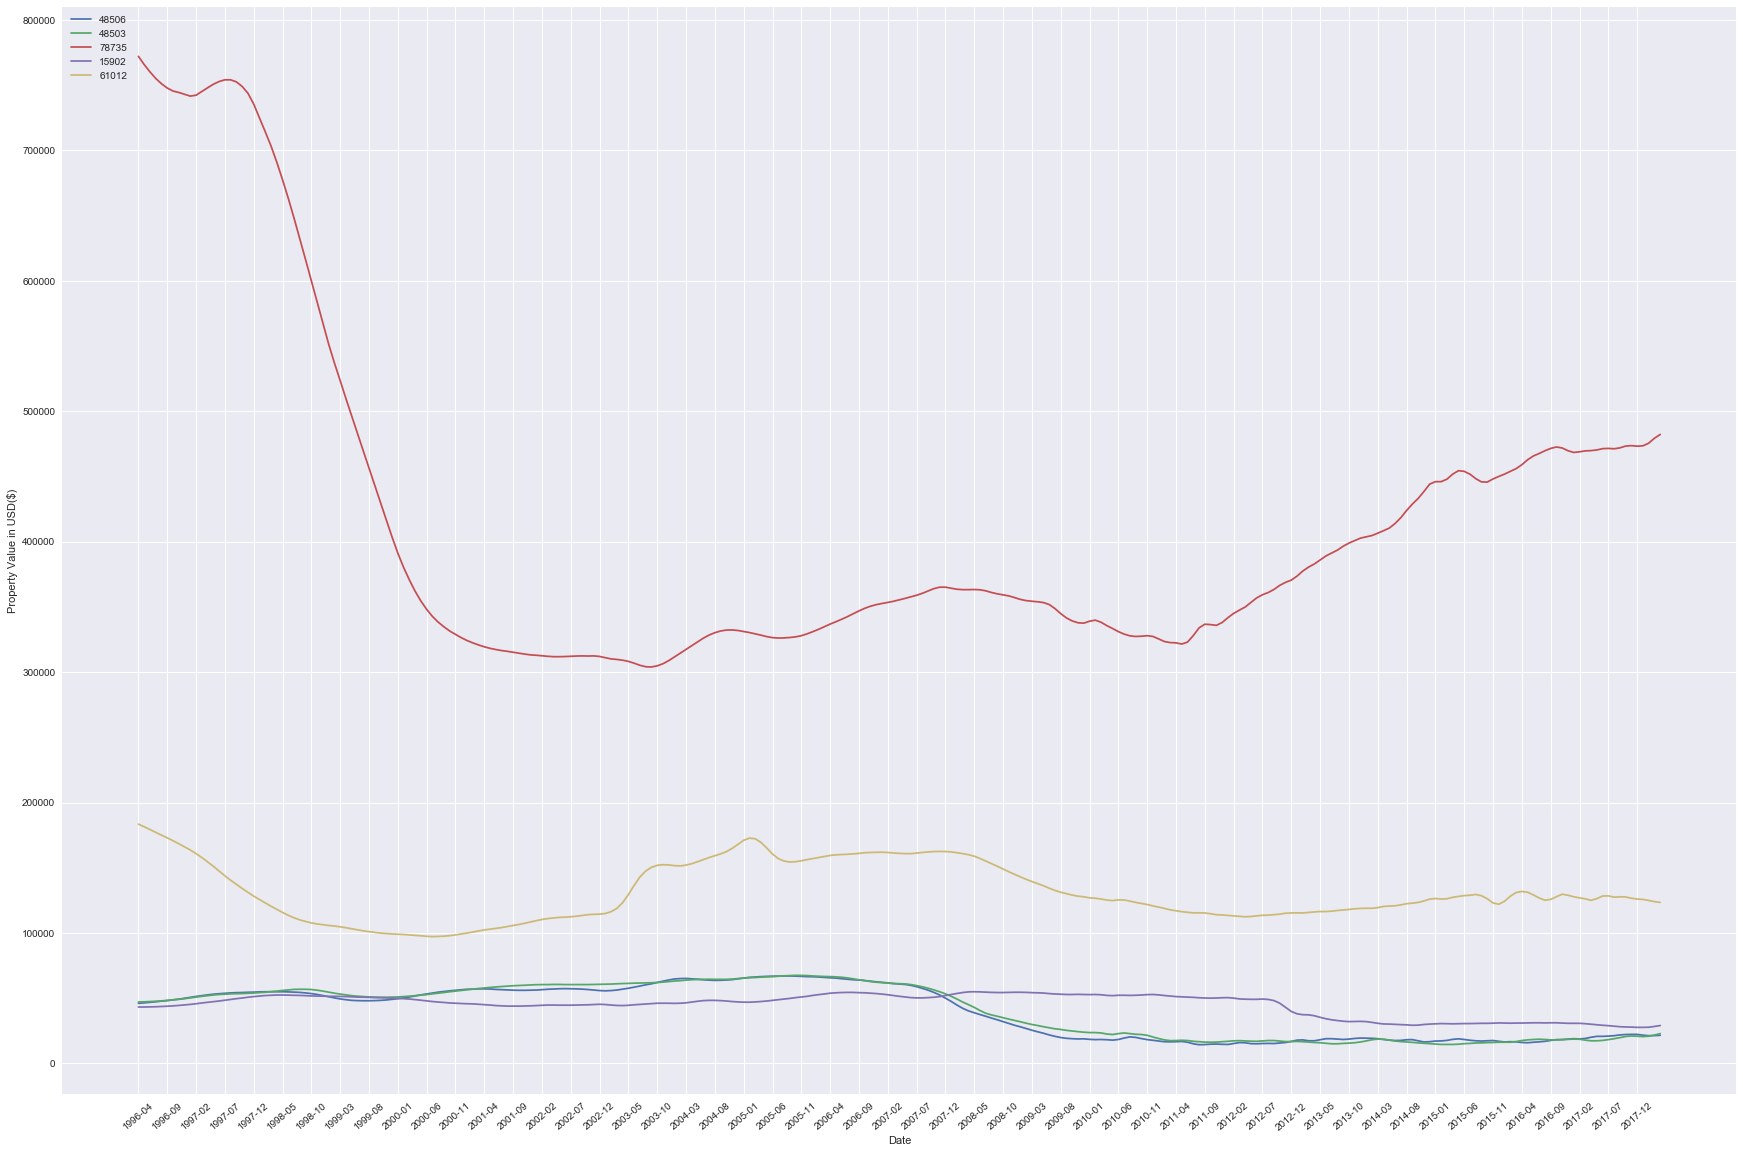

In [40]:
pot_nat_slim_df_96 = (pot_nat_df_96.drop(columns=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank']))
plt.figure(figsize=(30, 20))
plt.xlabel('Date')
plt.xticks(np.arange(0, 265, step=5), rotation=40)
plt.ylabel('Property Value in USD($)')
plt.plot(pot_nat_slim_df_96.T)
plt.legend(pot_nat_df_96['RegionName'], loc='upper left')
plt.show()

# Step 4: Reshaping the Dataframe

In [41]:
nyc_zipcodes = top_nyc_df.RegionID.unique()
nyc_zipcodes

array([62043, 62027, 60643, 60644, 62310])

In [42]:
pot_nyc_zipcodes = pot_nyc_df_96.RegionID.unique()
pot_nyc_zipcodes

array([60685, 60663, 62690, 60659, 61838])

In [43]:
top_nat_zipcodes = top_nat_df_96.RegionID.unique()
top_nat_zipcodes

array([62026, 62022, 60639, 62027, 62033])

In [44]:
pot_nat_zipcodes = pot_nat_df_96.RegionID.unique()
pot_nat_zipcodes

array([79247, 79244, 92646, 64354, 84758])

In [45]:
def melt_data(df):
    melted = pd.melt(df, id_vars=['RegionName', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True, errors='coerce')
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

In [46]:
nyc_zip_62043 = (top_nyc_df[top_nyc_df['RegionID']==62043]).drop(columns=['RegionID', 
                                                                          'RegionName', 
                                                                          'City', 
                                                                          'State', 
                                                                          'Metro',
                                                                          'CountyName',
                                                                          'SizeRank'])
nyc_zip_62043 = nyc_zip_62043.T
nyc_zip_62043

190
1996-04  124500.0
1996-05  124500.0
1996-06  124500.0
1996-07  124500.0
1996-08  124700.0
...           ...
2017-12  809800.0
2018-01  800800.0
2018-02  806100.0
2018-03  829200.0
2018-04  852300.0

[265 rows x 1 columns]

In [47]:
nyc_zip_62027 = (top_nyc_df[top_nyc_df['RegionID']==62027]).drop(columns=['RegionID', 
                                                                          'RegionName', 
                                                                          'City', 
                                                                          'State', 
                                                                          'Metro',
                                                                          'CountyName',
                                                                          'SizeRank'])
nyc_zip_62027 = nyc_zip_62027.T
nyc_zip_62027

475
1996-04   146100.0
1996-05   146600.0
1996-06   147200.0
1996-07   147700.0
1996-08   148400.0
...            ...
2017-12  1545700.0
2018-01  1540200.0
2018-02  1553600.0
2018-03  1578400.0
2018-04  1598700.0

[265 rows x 1 columns]

In [48]:
nyc_zip_60643 = (top_nyc_df[top_nyc_df['RegionID']==60643]).drop(columns=['RegionID', 
                                                                          'RegionName', 
                                                                          'City', 
                                                                          'State', 
                                                                          'Metro',
                                                                          'CountyName',
                                                                          'SizeRank'])
nyc_zip_60643 = nyc_zip_60643.T
nyc_zip_60643

660
1996-04  111400.0
1996-05  111100.0
1996-06  110900.0
1996-07  110600.0
1996-08  110300.0
...           ...
2017-12  506700.0
2018-01  510000.0
2018-02  515300.0
2018-03  531900.0
2018-04  545500.0

[265 rows x 1 columns]

In [49]:
nyc_zip_62044 = (top_nyc_df[top_nyc_df['RegionID']==62044]).drop(columns=['RegionID', 
                                                                          'RegionName', 
                                                                          'City', 
                                                                          'State', 
                                                                          'Metro',
                                                                          'CountyName',
                                                                          'SizeRank'])
nyc_zip_62044 = nyc_zip_62044.T
nyc_zip_62044

Empty DataFrame
Columns: []
Index: [1996-04, 1996-05, 1996-06, 1996-07, 1996-08, 1996-09, 1996-10, 1996-11, 1996-12, 1997-01, 1997-02, 1997-03, 1997-04, 1997-05, 1997-06, 1997-07, 1997-08, 1997-09, 1997-10, 1997-11, 1997-12, 1998-01, 1998-02, 1998-03, 1998-04, 1998-05, 1998-06, 1998-07, 1998-08, 1998-09, 1998-10, 1998-11, 1998-12, 1999-01, 1999-02, 1999-03, 1999-04, 1999-05, 1999-06, 1999-07, 1999-08, 1999-09, 1999-10, 1999-11, 1999-12, 2000-01, 2000-02, 2000-03, 2000-04, 2000-05, 2000-06, 2000-07, 2000-08, 2000-09, 2000-10, 2000-11, 2000-12, 2001-01, 2001-02, 2001-03, 2001-04, 2001-05, 2001-06, 2001-07, 2001-08, 2001-09, 2001-10, 2001-11, 2001-12, 2002-01, 2002-02, 2002-03, 2002-04, 2002-05, 2002-06, 2002-07, 2002-08, 2002-09, 2002-10, 2002-11, 2002-12, 2003-01, 2003-02, 2003-03, 2003-04, 2003-05, 2003-06, 2003-07, 2003-08, 2003-09, 2003-10, 2003-11, 2003-12, 2004-01, 2004-02, 2004-03, 2004-04, 2004-05, 2004-06, 2004-07, ...]

[265 rows x 0 columns]

In [50]:
nyc_zip_62310 = (top_nyc_df[top_nyc_df['RegionID']==62310]).drop(columns=['RegionID', 
                                                                          'RegionName', 
                                                                          'City', 
                                                                          'State', 
                                                                          'Metro',
                                                                          'CountyName',
                                                                          'SizeRank'])
nyc_zip_62310 = nyc_zip_62310.T
nyc_zip_62310

7007
1996-04   230300.0
1996-05   230800.0
1996-06   231500.0
1996-07   232200.0
1996-08   233100.0
...            ...
2017-12  1679800.0
2018-01  1736600.0
2018-02  1749800.0
2018-03  1727300.0
2018-04  1714900.0

[265 rows x 1 columns]

In [51]:
pot_nyc_zip_60685 = (pot_nyc_df_96[pot_nyc_df_96['RegionID']==60685]).drop(columns=['RegionID', 
                                                                          'RegionName', 
                                                                          'City', 
                                                                          'State', 
                                                                          'Metro',
                                                                          'CountyName',
                                                                          'SizeRank'])
pot_nyc_zip_60685 = pot_nyc_zip_60685.T
pot_nyc_zip_60685

9496
1996-04  135300.0
1996-05  135000.0
1996-06  134800.0
1996-07  134500.0
1996-08  134200.0
...           ...
2017-12  181600.0
2018-01  184900.0
2018-02  187700.0
2018-03  189800.0
2018-04  190400.0

[265 rows x 1 columns]

In [52]:
pot_nyc_zip_60663 = (pot_nyc_df_96[pot_nyc_df_96['RegionID']==60663]).drop(columns=['RegionID', 
                                                                          'RegionName', 
                                                                          'City', 
                                                                          'State', 
                                                                          'Metro',
                                                                          'CountyName',
                                                                          'SizeRank'])
pot_nyc_zip_60663 = pot_nyc_zip_60663.T
pot_nyc_zip_60663

9897
1996-04  120400.0
1996-05  120400.0
1996-06  120400.0
1996-07  120400.0
1996-08  120400.0
...           ...
2017-12  159600.0
2018-01  164500.0
2018-02  167900.0
2018-03  169100.0
2018-04  169200.0

[265 rows x 1 columns]

In [53]:
pot_nyc_zip_62690 = (pot_nyc_df_96[pot_nyc_df_96['RegionID']==62690]).drop(columns=['RegionID', 
                                                                          'RegionName', 
                                                                          'City', 
                                                                          'State', 
                                                                          'Metro',
                                                                          'CountyName',
                                                                          'SizeRank'])
pot_nyc_zip_62690 = pot_nyc_zip_62690.T
pot_nyc_zip_62690

11815
1996-04  145000.0
1996-05  144500.0
1996-06  144100.0
1996-07  143500.0
1996-08  143000.0
...           ...
2017-12  211000.0
2018-01  205400.0
2018-02  204400.0
2018-03  209900.0
2018-04  214300.0

[265 rows x 1 columns]

In [54]:
pot_nyc_zip_60659 = (pot_nyc_df_96[pot_nyc_df_96['RegionID']==60659]).drop(columns=['RegionID', 
                                                                          'RegionName', 
                                                                          'City', 
                                                                          'State', 
                                                                          'Metro',
                                                                          'CountyName',
                                                                          'SizeRank'])
pot_nyc_zip_60659 = pot_nyc_zip_60659.T
pot_nyc_zip_60659

13772
1996-04  145000.0
1996-05  144800.0
1996-06  144500.0
1996-07  144300.0
1996-08  144100.0
...           ...
2017-12  206700.0
2018-01  209500.0
2018-02  210900.0
2018-03  214000.0
2018-04  217200.0

[265 rows x 1 columns]

In [55]:
pot_nyc_zip_61838 = (pot_nyc_df_96[pot_nyc_df_96['RegionID']==61838]).drop(columns=['RegionID', 
                                                                          'RegionName', 
                                                                          'City', 
                                                                          'State', 
                                                                          'Metro',
                                                                          'CountyName',
                                                                          'SizeRank'])
pot_nyc_zip_61838 = pot_nyc_zip_61838.T
pot_nyc_zip_61838

13853
1996-04  300300.0
1996-05  297800.0
1996-06  295400.0
1996-07  293000.0
1996-08  290700.0
...           ...
2017-12  464400.0
2018-01  465600.0
2018-02  461800.0
2018-03  454800.0
2018-04  449900.0

[265 rows x 1 columns]

In [56]:
top_nat_zip_62026 = (top_nat_df_96[top_nat_df_96['RegionID']==62026]).drop(columns=['RegionID', 
                                                                          'RegionName', 
                                                                          'City', 
                                                                          'State', 
                                                                          'Metro',
                                                                          'CountyName',
                                                                          'SizeRank'])
top_nat_zip_62026 = top_nat_zip_62026.T
top_nat_zip_62026

106
1996-04   225700.0
1996-05   227500.0
1996-06   229400.0
1996-07   231600.0
1996-08   234100.0
...            ...
2017-12  2287100.0
2018-01  2288900.0
2018-02  2265300.0
2018-03  2244900.0
2018-04  2243900.0

[265 rows x 1 columns]

In [57]:
top_nat_zip_62022 = (top_nat_df_96[top_nat_df_96['RegionID']==62022]).drop(columns=['RegionID', 
                                                                          'RegionName', 
                                                                          'City', 
                                                                          'State', 
                                                                          'Metro',
                                                                          'CountyName',
                                                                          'SizeRank'])
top_nat_zip_62022 = top_nat_zip_62022.T
top_nat_zip_62022

117
1996-04   133200.0
1996-05   132900.0
1996-06   132500.0
1996-07   132200.0
1996-08   131800.0
...            ...
2017-12  1463100.0
2018-01  1496100.0
2018-02  1531100.0
2018-03  1581900.0
2018-04  1623700.0

[265 rows x 1 columns]

In [58]:
top_nat_zip_60639 = (top_nat_df_96[top_nat_df_96['RegionID']==60639]).drop(columns=['RegionID', 
                                                                          'RegionName', 
                                                                          'City', 
                                                                          'State', 
                                                                          'Metro',
                                                                          'CountyName',
                                                                          'SizeRank'])
top_nat_zip_60639 = top_nat_zip_60639.T
top_nat_zip_60639

191
1996-04   137200.0
1996-05   137800.0
1996-06   138500.0
1996-07   139100.0
1996-08   139600.0
...            ...
2017-12  1447800.0
2018-01  1454900.0
2018-02  1453900.0
2018-03  1439500.0
2018-04  1427300.0

[265 rows x 1 columns]

In [59]:
top_nat_zip_62027 = (top_nat_df_96[top_nat_df_96['RegionID']==62027]).drop(columns=['RegionID', 
                                                                          'RegionName', 
                                                                          'City', 
                                                                          'State', 
                                                                          'Metro',
                                                                          'CountyName',
                                                                          'SizeRank'])
top_nat_zip_62027 = top_nat_zip_62027.T
top_nat_zip_62027

475
1996-04   146100.0
1996-05   146600.0
1996-06   147200.0
1996-07   147700.0
1996-08   148400.0
...            ...
2017-12  1545700.0
2018-01  1540200.0
2018-02  1553600.0
2018-03  1578400.0
2018-04  1598700.0

[265 rows x 1 columns]

In [60]:
top_nat_zip_62033 = (top_nat_df_96[top_nat_df_96['RegionID']==62033]).drop(columns=['RegionID', 
                                                                          'RegionName', 
                                                                          'City', 
                                                                          'State', 
                                                                          'Metro',
                                                                          'CountyName',
                                                                          'SizeRank'])
top_nat_zip_62033 = top_nat_zip_62033.T
top_nat_zip_62033

1155
1996-04   149200.0
1996-05   148400.0
1996-06   147500.0
1996-07   146600.0
1996-08   146000.0
...            ...
2017-12  1651200.0
2018-01  1661800.0
2018-02  1672800.0
2018-03  1694000.0
2018-04  1721100.0

[265 rows x 1 columns]

In [61]:
pot_nat_zip_79247 = (pot_nat_df_96[pot_nat_df_96['RegionID']==79247]).drop(columns=['RegionID', 
                                                                          'RegionName', 
                                                                          'City', 
                                                                          'State', 
                                                                          'Metro',
                                                                          'CountyName',
                                                                          'SizeRank'])
pot_nat_zip_79247 = pot_nat_zip_79247.T
pot_nat_zip_79247

4149
1996-04  46000.0
1996-05  46400.0
1996-06  46800.0
1996-07  47200.0
1996-08  47700.0
...          ...
2017-12  22200.0
2018-01  21600.0
2018-02  21200.0
2018-03  21300.0
2018-04  21500.0

[265 rows x 1 columns]

In [62]:
pot_nat_zip_79244 = (pot_nat_df_96[pot_nat_df_96['RegionID']==79244]).drop(columns=['RegionID', 
                                                                          'RegionName', 
                                                                          'City', 
                                                                          'State', 
                                                                          'Metro',
                                                                          'CountyName',
                                                                          'SizeRank'])
pot_nat_zip_79244 = pot_nat_zip_79244.T
pot_nat_zip_79244

4381
1996-04  47100.0
1996-05  47200.0
1996-06  47400.0
1996-07  47600.0
1996-08  47900.0
...          ...
2017-12  20800.0
2018-01  20500.0
2018-02  20800.0
2018-03  21700.0
2018-04  22800.0

[265 rows x 1 columns]

In [63]:
pot_nat_zip_92646 = (pot_nat_df_96[pot_nat_df_96['RegionID']==92646]).drop(columns=['RegionID', 
                                                                          'RegionName', 
                                                                          'City', 
                                                                          'State', 
                                                                          'Metro',
                                                                          'CountyName',
                                                                          'SizeRank'])
pot_nat_zip_92646 = pot_nat_zip_92646.T
pot_nat_zip_92646

5068
1996-04  772100.0
1996-05  765800.0
1996-06  760200.0
1996-07  755200.0
1996-08  751100.0
...           ...
2017-12  473200.0
2018-01  473500.0
2018-02  475500.0
2018-03  479300.0
2018-04  482200.0

[265 rows x 1 columns]

In [64]:
pot_nat_zip_64354 = (pot_nat_df_96[pot_nat_df_96['RegionID']==64354]).drop(columns=['RegionID', 
                                                                          'RegionName', 
                                                                          'City', 
                                                                          'State', 
                                                                          'Metro',
                                                                          'CountyName',
                                                                          'SizeRank'])
pot_nat_zip_64354 = pot_nat_zip_64354.T
pot_nat_zip_64354

7402
1996-04  43200.0
1996-05  43200.0
1996-06  43300.0
1996-07  43400.0
1996-08  43600.0
...          ...
2017-12  27600.0
2018-01  27600.0
2018-02  27700.0
2018-03  28300.0
2018-04  29000.0

[265 rows x 1 columns]

In [65]:
pot_nat_zip_84758 = (pot_nat_df_96[pot_nat_df_96['RegionID']==84758]).drop(columns=['RegionID', 
                                                                          'RegionName', 
                                                                          'City', 
                                                                          'State', 
                                                                          'Metro',
                                                                          'CountyName',
                                                                          'SizeRank'])
pot_nat_zip_84758 = pot_nat_zip_84758.T
pot_nat_zip_84758

13845
1996-04  183400.0
1996-05  181400.0
1996-06  179300.0
1996-07  177100.0
1996-08  175000.0
...           ...
2017-12  126000.0
2018-01  125700.0
2018-02  124900.0
2018-03  124000.0
2018-04  123400.0

[265 rows x 1 columns]

# Step 5: ARIMA Modeling

In [66]:
def test_stationarity(timeseries, window):
    
    #Defining rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(18, 12))
    orig = plt.plot(timeseries.iloc[window:], color='#87CEEB',label='Original')
    mean = plt.plot(rolmean, color='#FFC0CB', label='Rolling Mean')
    std = plt.plot(rolstd, color='#008000', label = 'Rolling Std')
    plt.xlabel('Date')
    plt.xticks(np.arange(0, 264, step=5), rotation=40)
    plt.legend(loc='upper left')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

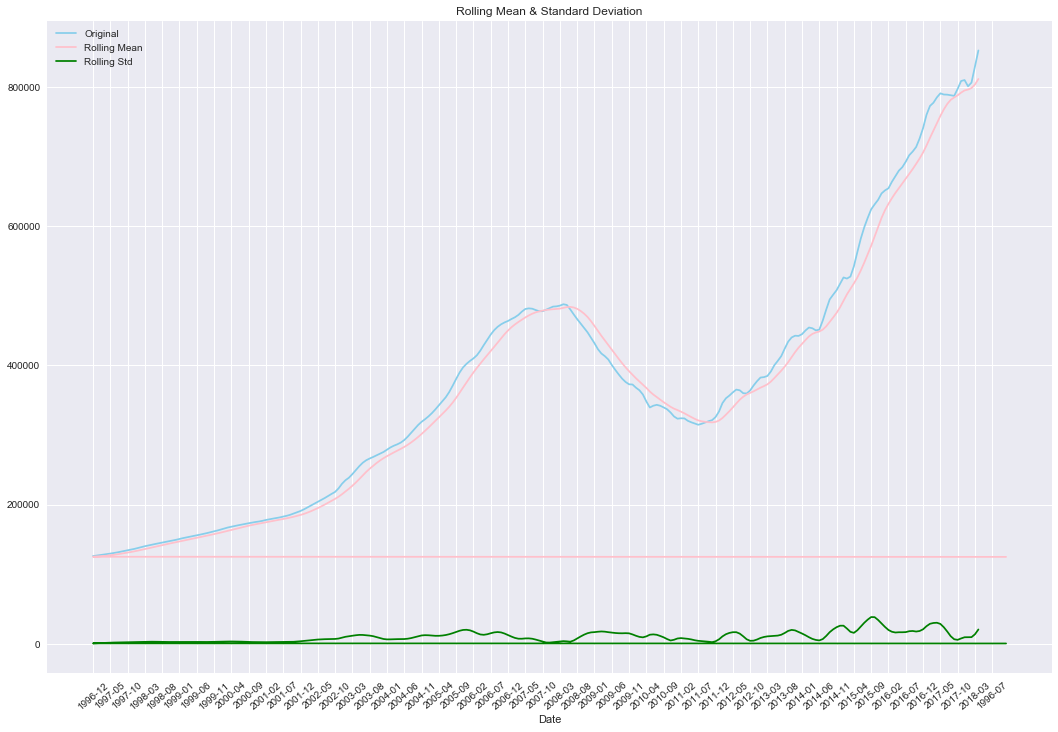

In [67]:
test_stationarity(nyc_zip_62043, 8)

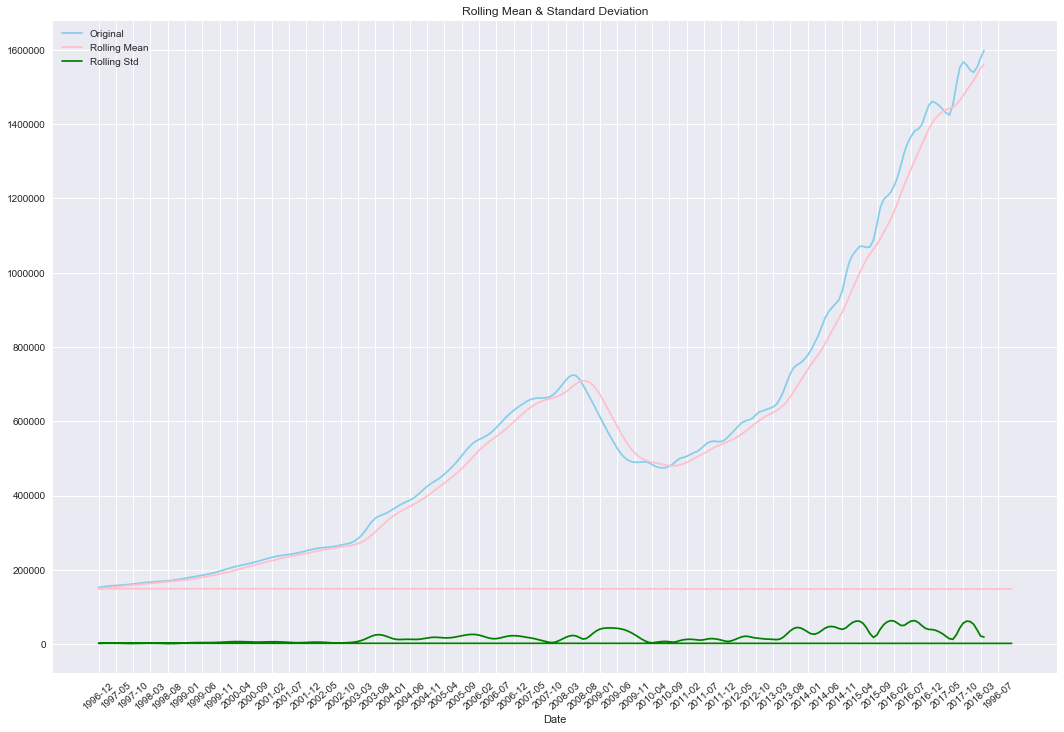

In [68]:
test_stationarity(nyc_zip_62027, 8)

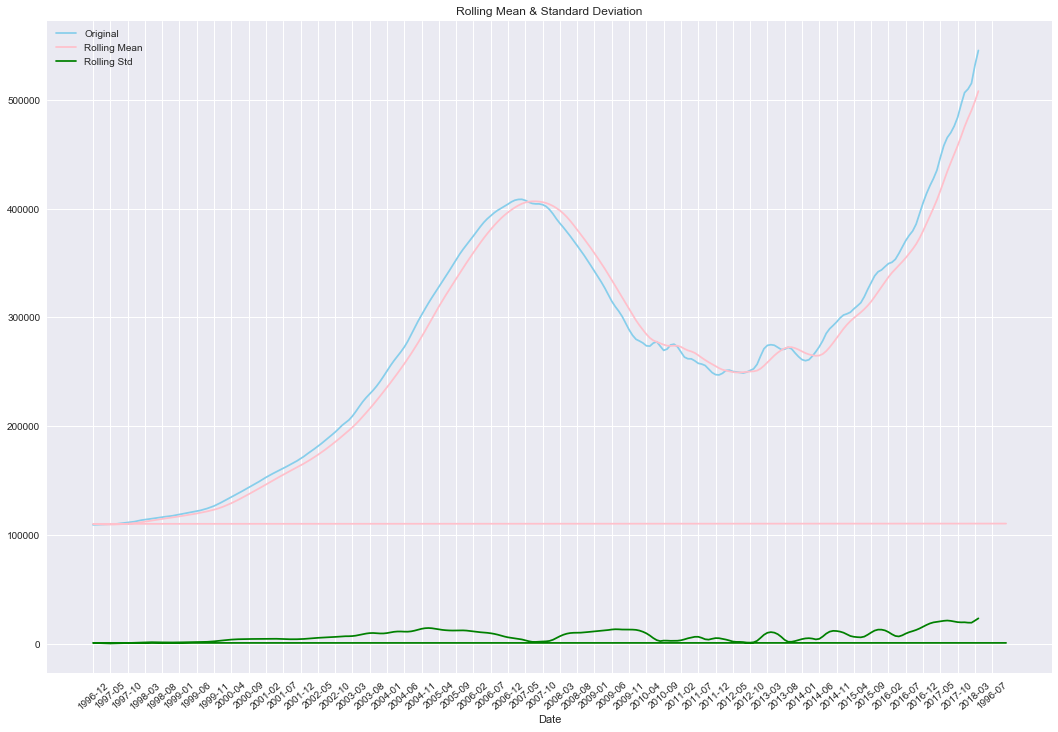

In [69]:
test_stationarity(nyc_zip_60643, 8)

ZeroDivisionError: integer division or modulo by zero

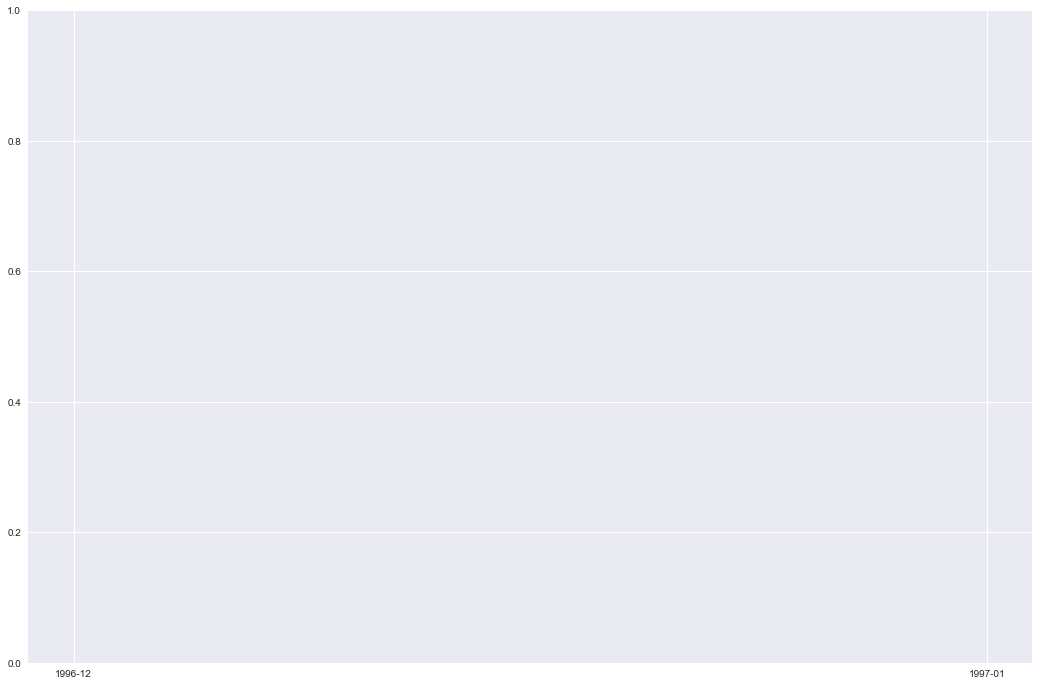

In [70]:
test_stationarity(nyc_zip_62044, 8)

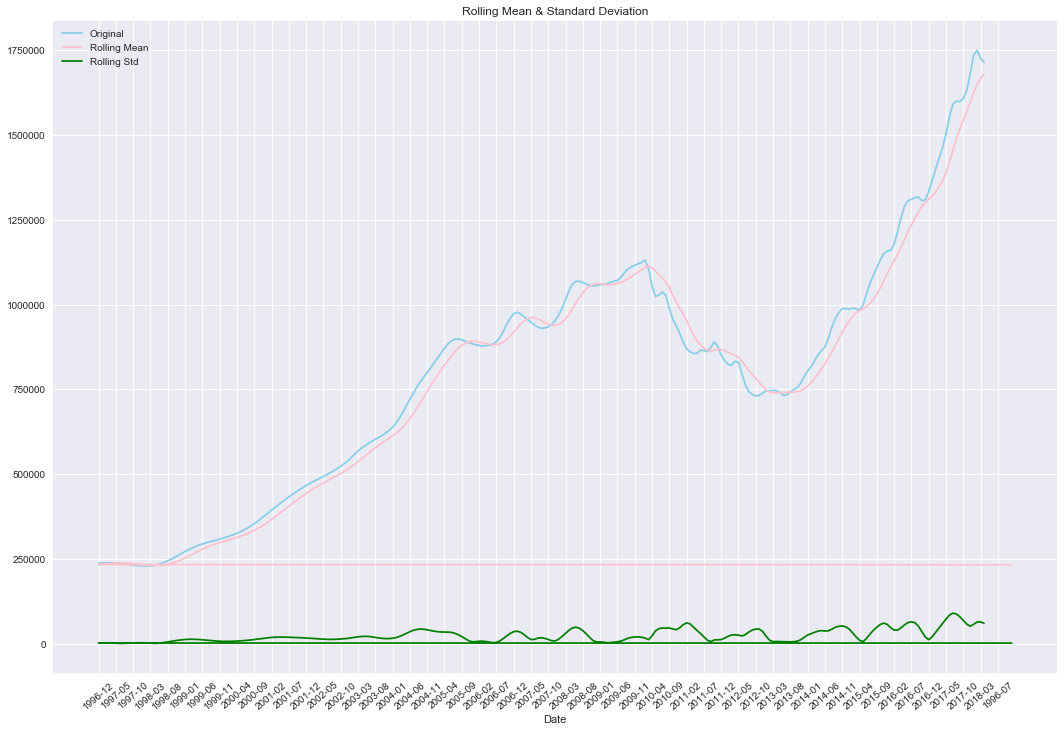

In [71]:
test_stationarity(nyc_zip_62310, 8)

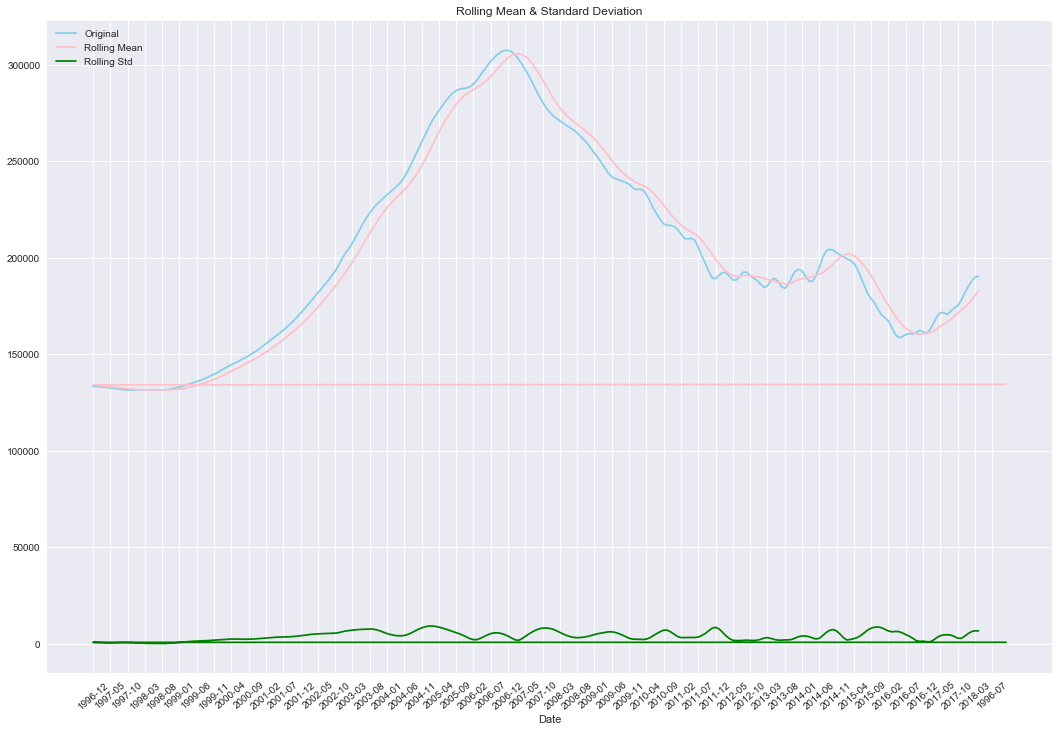

In [72]:
test_stationarity(pot_nyc_zip_60685, 8)

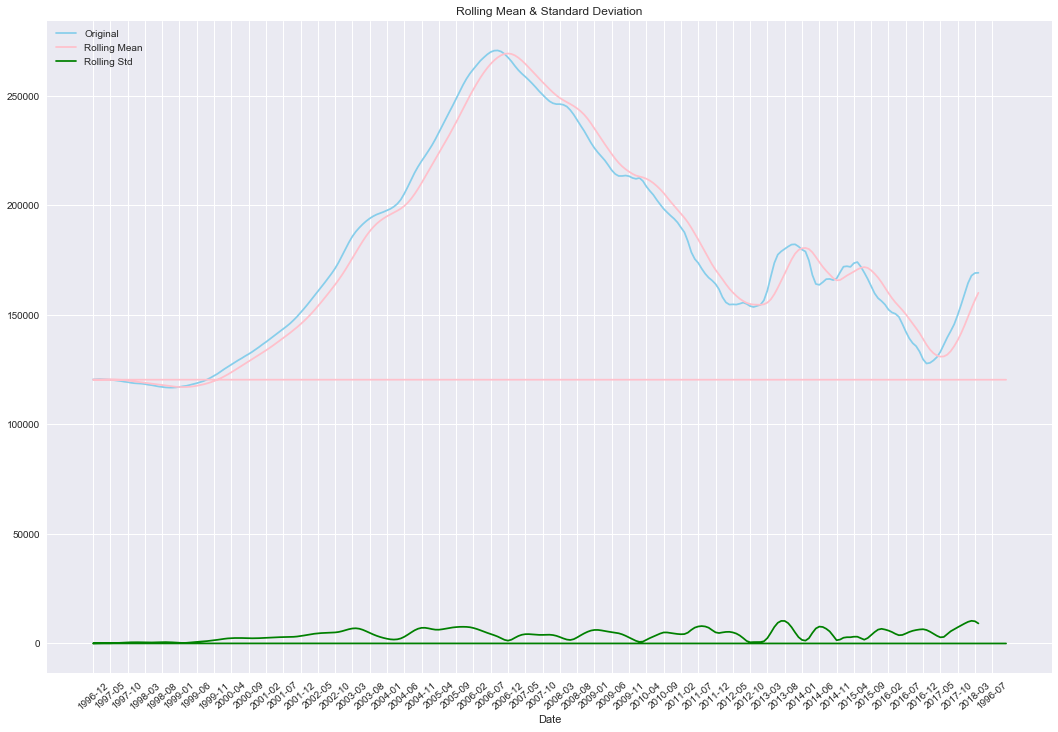

In [73]:
test_stationarity(pot_nyc_zip_60663, 8)

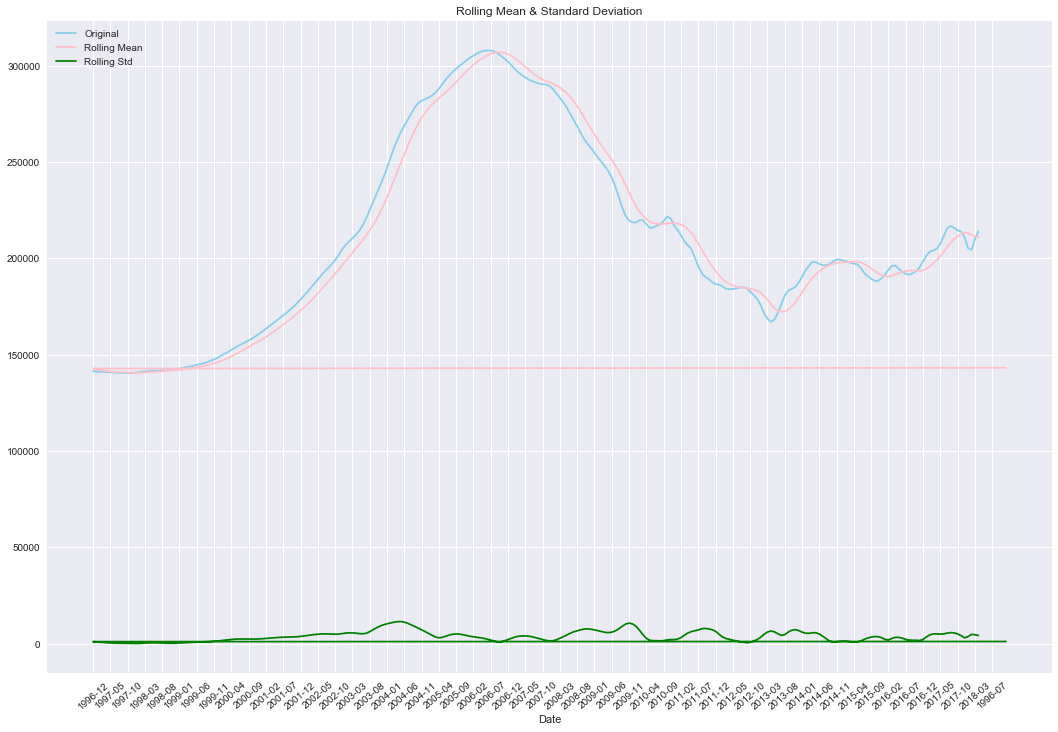

In [74]:
test_stationarity(pot_nyc_zip_62690, 8)

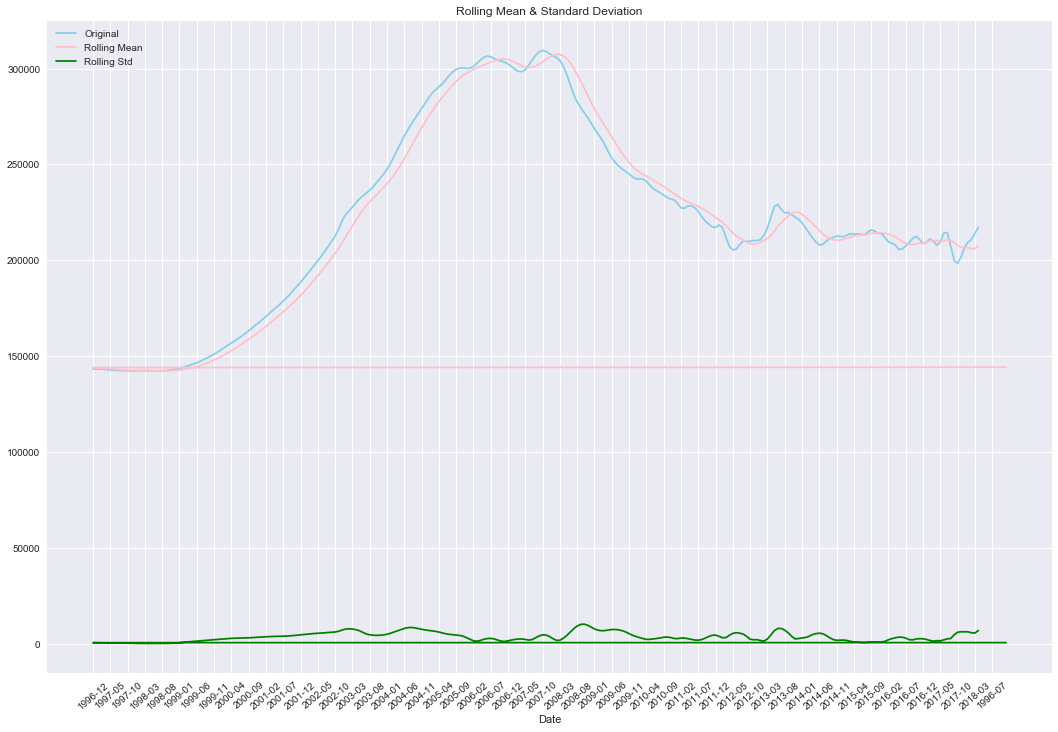

In [75]:
test_stationarity(pot_nyc_zip_60659, 8)

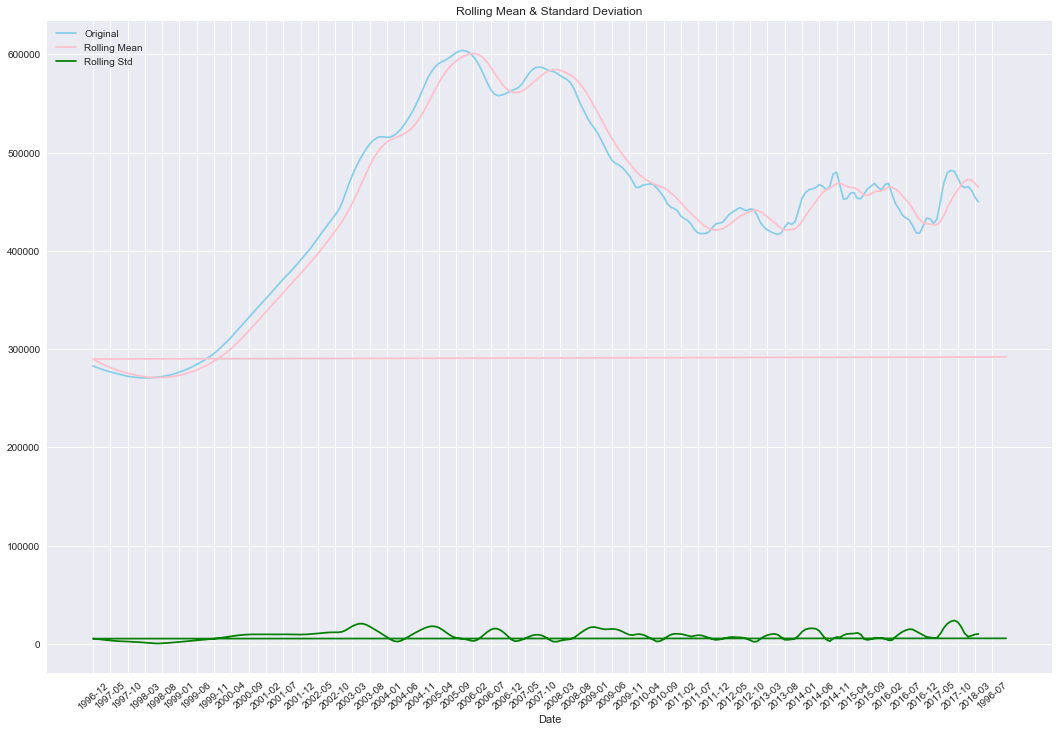

In [76]:
test_stationarity(pot_nyc_zip_61838, 8)

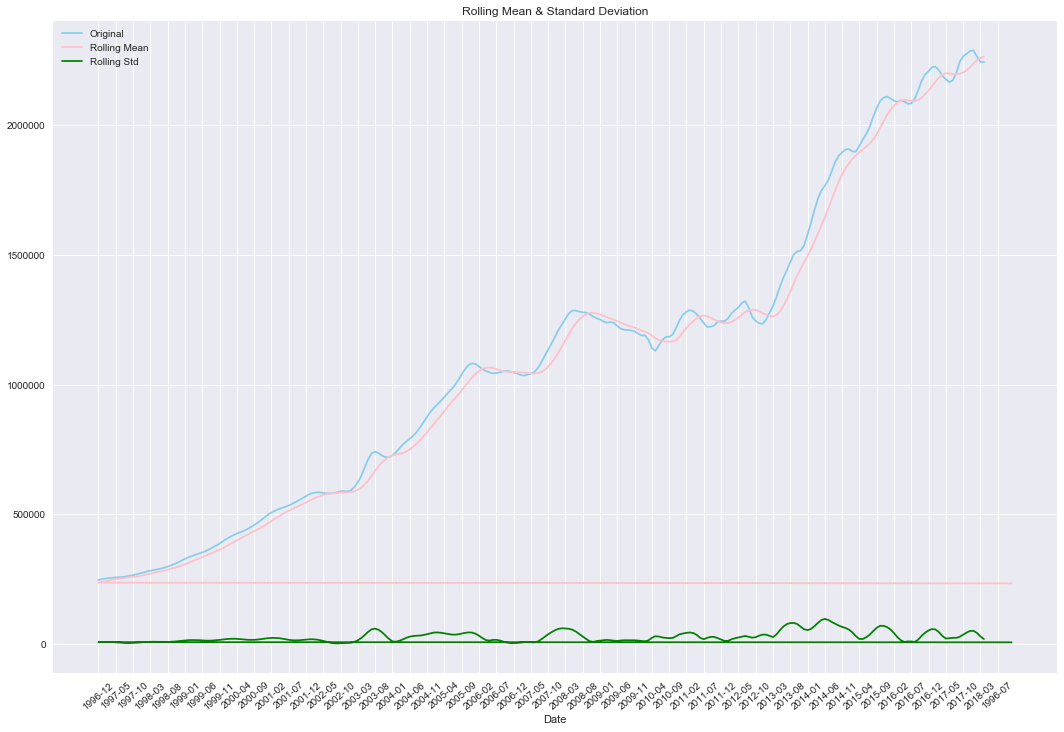

In [77]:
test_stationarity(top_nat_zip_62026, 8)

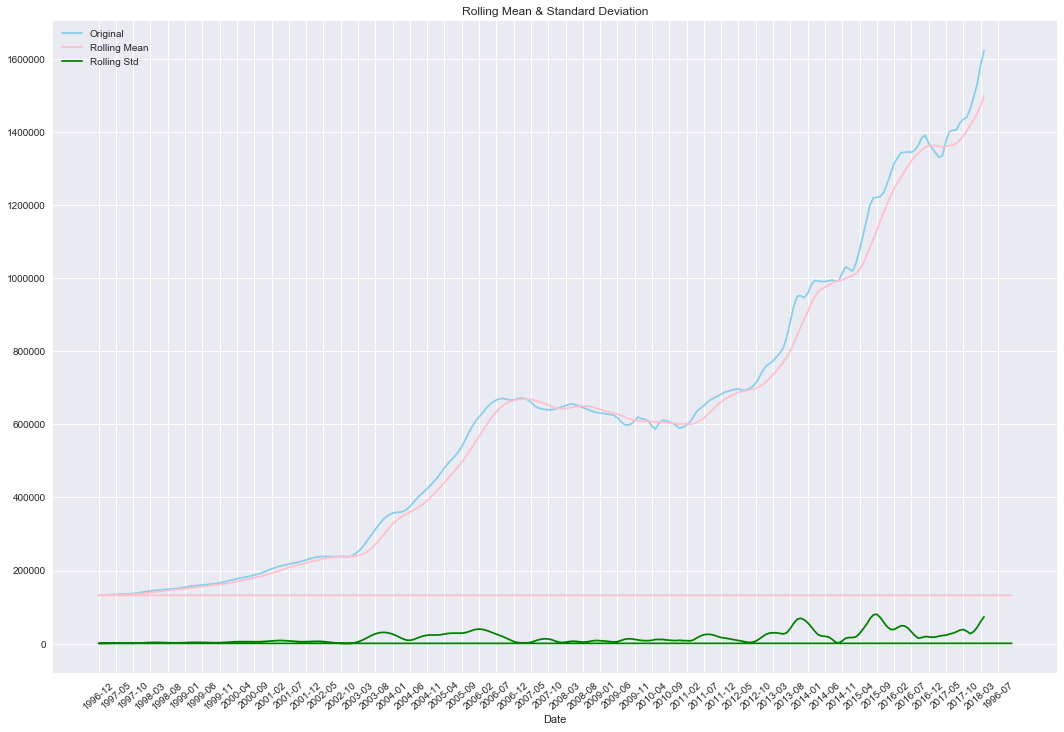

In [78]:
test_stationarity(top_nat_zip_62022, 8)

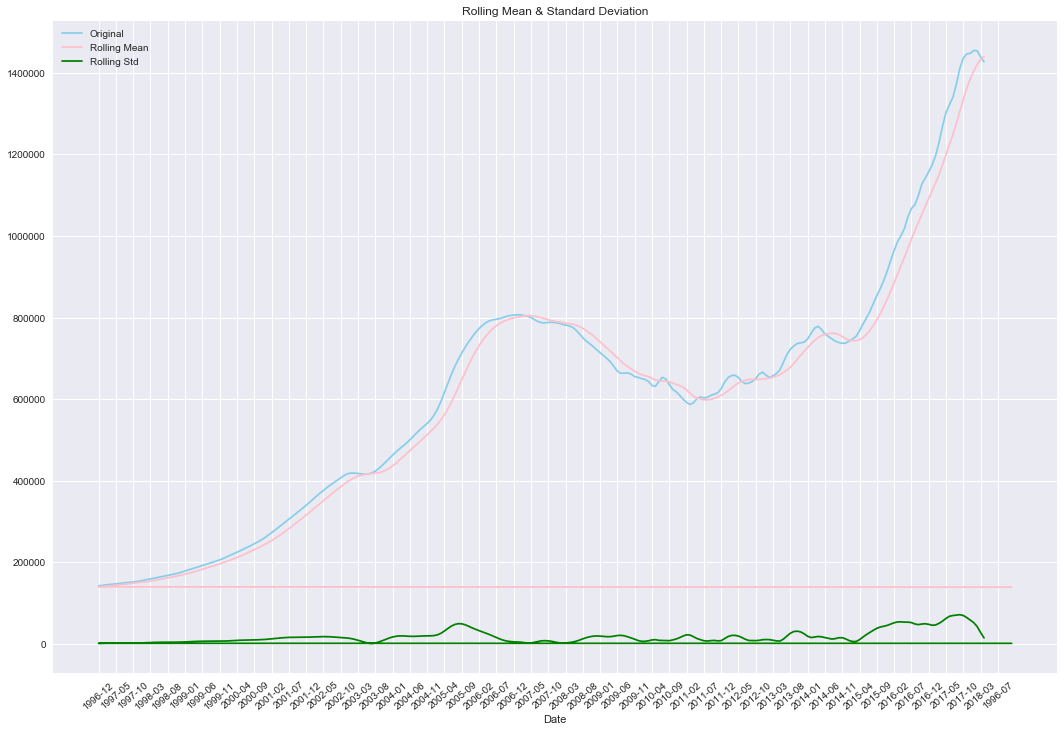

In [79]:
test_stationarity(top_nat_zip_60639, 8)

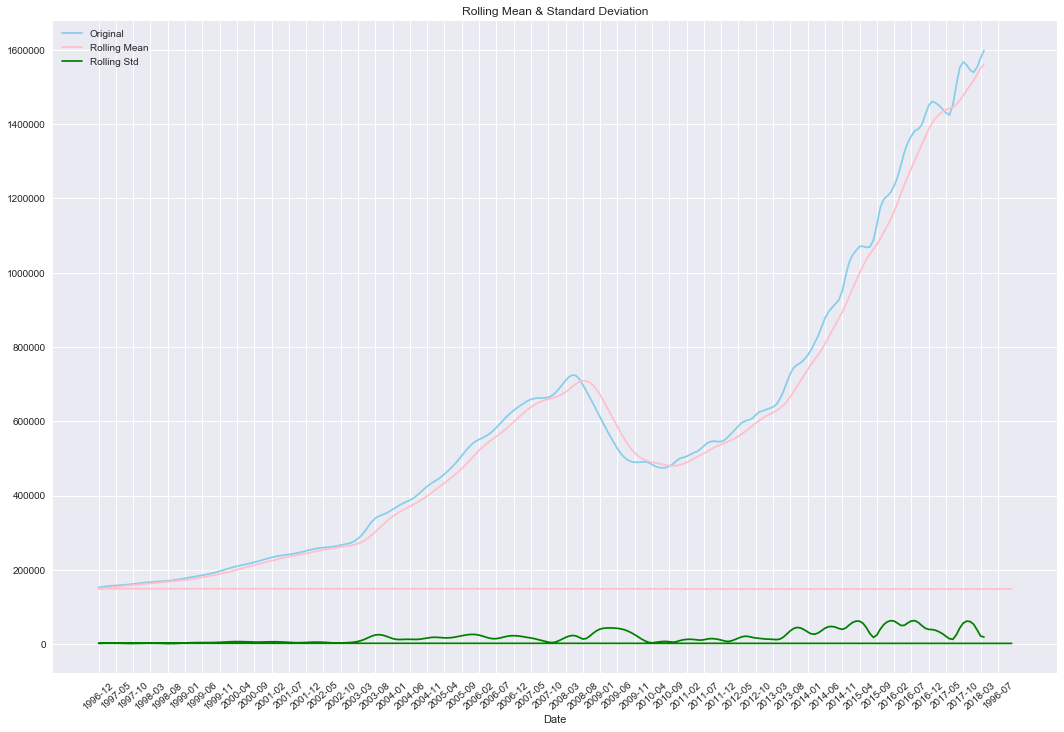

In [80]:
test_stationarity(nyc_zip_62027, 8)

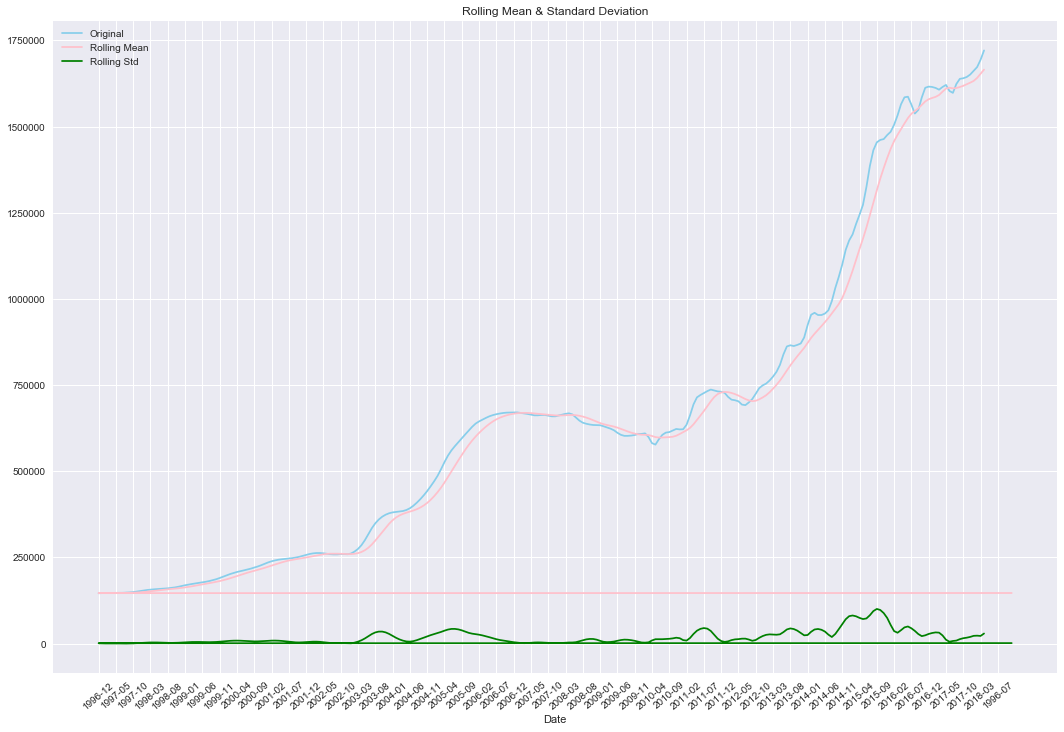

In [81]:
test_stationarity(top_nat_zip_62033, 8)

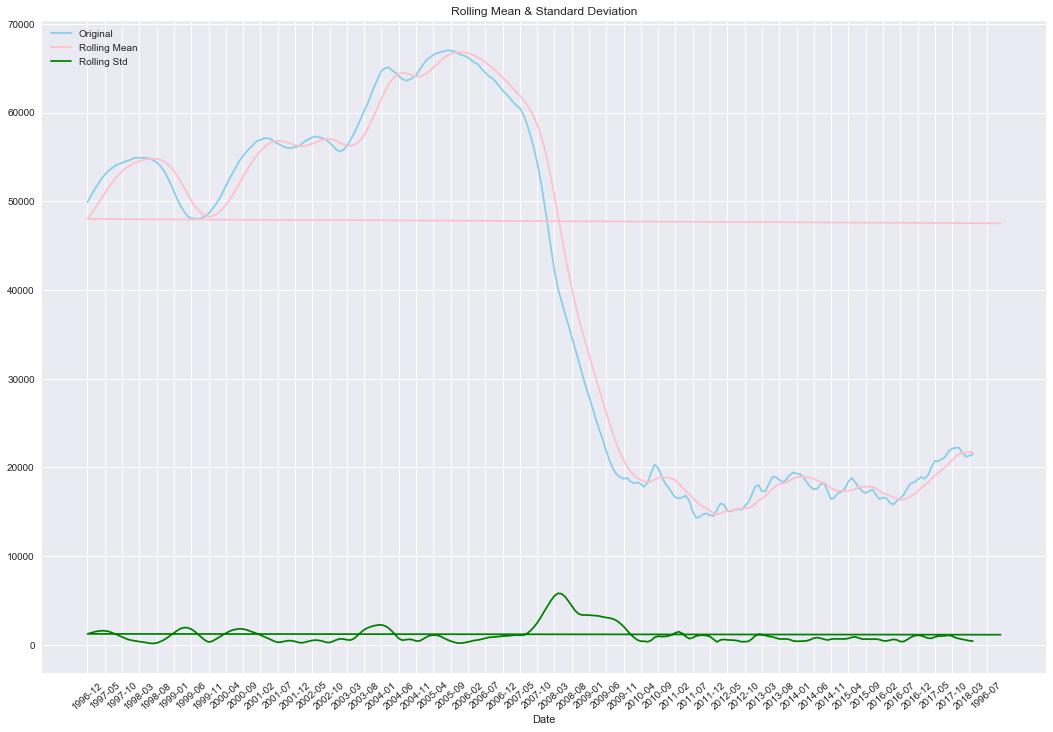

In [82]:
test_stationarity(pot_nat_zip_79247, 8)

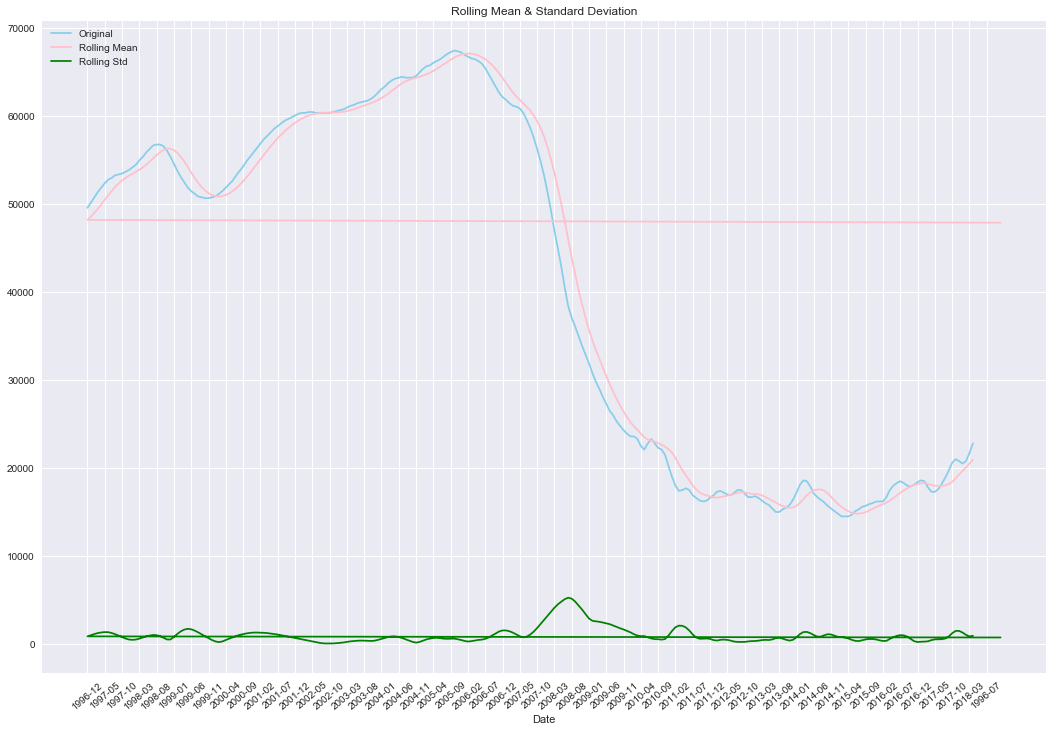

In [83]:
test_stationarity(pot_nat_zip_79244, 8)

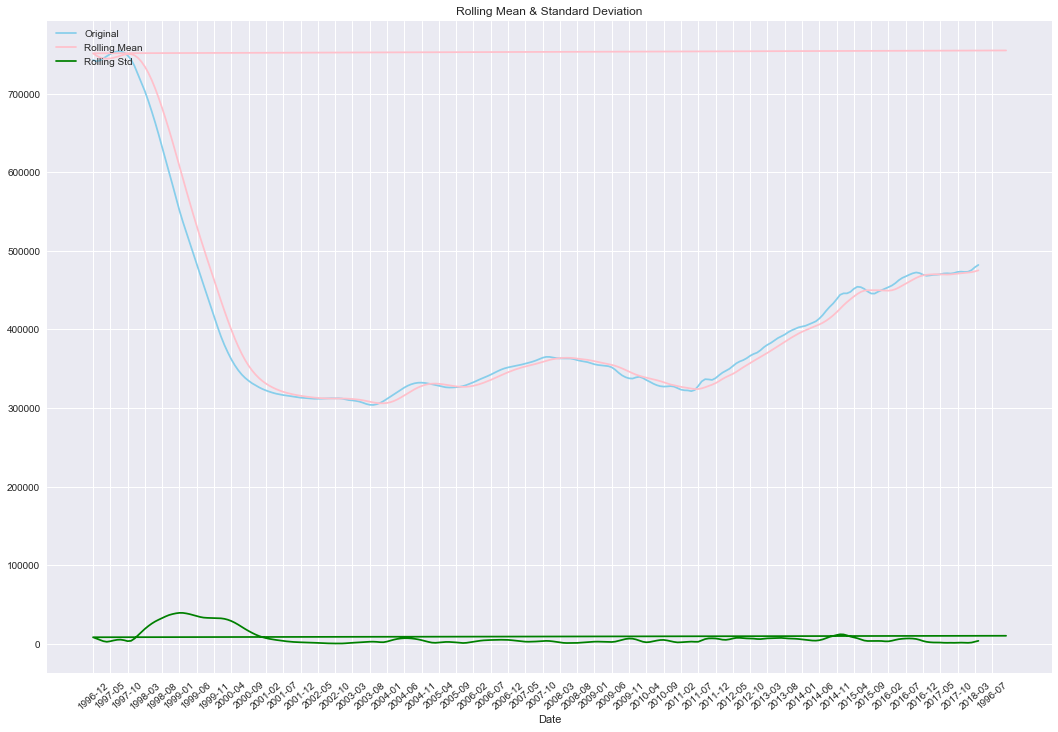

In [84]:
test_stationarity(pot_nat_zip_92646, 8)

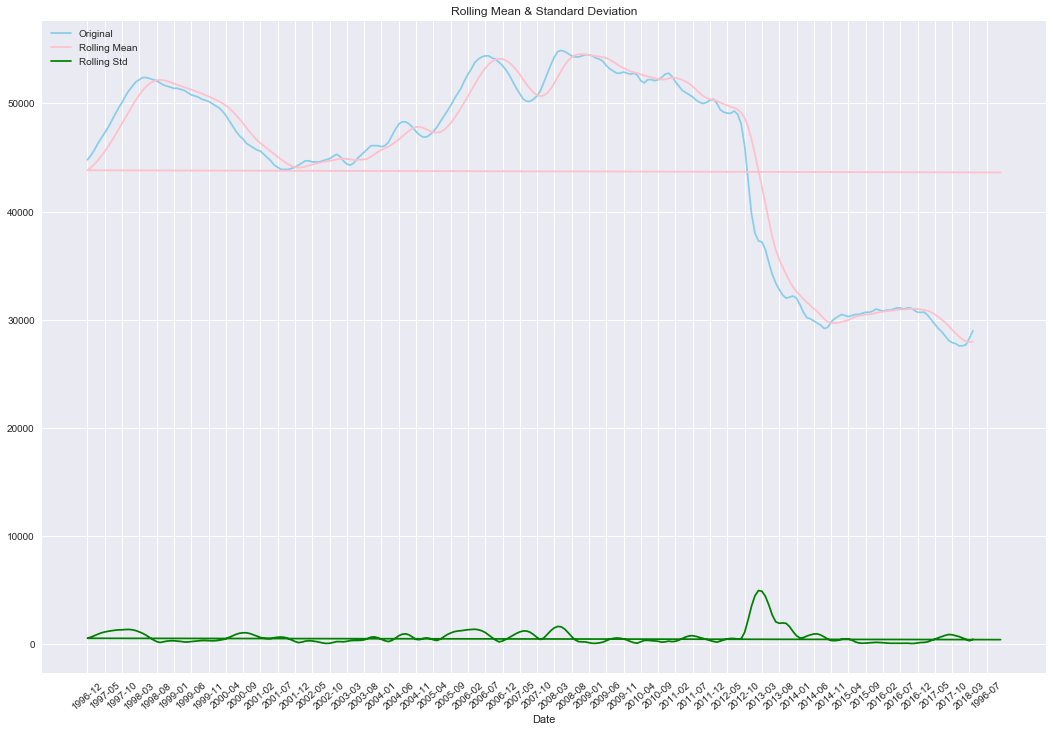

In [85]:
test_stationarity(pot_nat_zip_64354, 8)

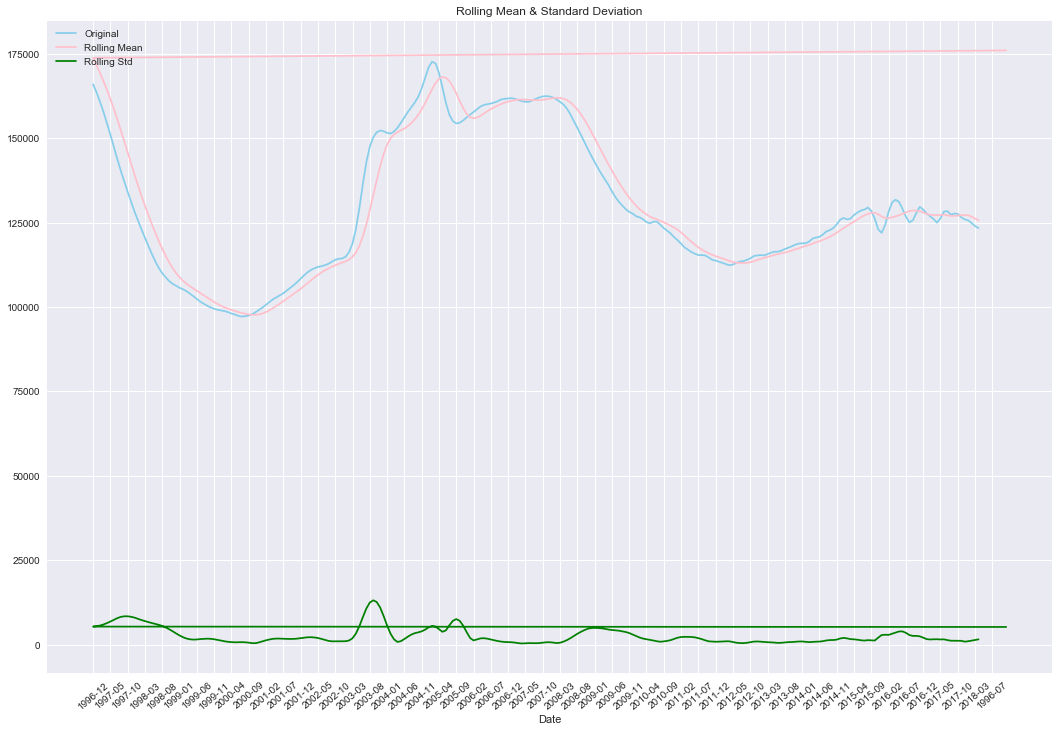

In [86]:
test_stationarity(pot_nat_zip_84758, 8)

In [87]:
p = d = q = range(0,2)

pdq = list(itertools.product(p,d,q))

pdqs = [(x[0],x[1],x[2],12) for x in pdq]

In [88]:
ans=[]
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(nyc_zip_62043,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic, output.bic])

        except:
            continue
ans

[[(0, 0, 0), (0, 0, 0, 12), 7573.655373452197, 7577.2313225553435],
 [(0, 0, 0), (0, 0, 1, 12), 7079.039160742763, 7086.098018917785],
 [(0, 0, 0), (0, 1, 0, 12), 6244.883307127098, 6248.41273621461],
 [(0, 0, 0), (0, 1, 1, 12), 5960.529216505973, 5967.490494352657],
 [(0, 0, 0), (1, 0, 0, 12), 6154.563153947694, 6161.62993292515],
 [(0, 0, 0), (1, 0, 1, 12), 6060.761020578313, 6071.349307840847],
 [(0, 0, 0), (1, 1, 0, 12), 5710.294560111147, 5717.264153978128],
 [(0, 0, 0), (1, 1, 1, 12), 7656.988457289121, 7667.430374059147],
 [(0, 0, 1), (0, 0, 0, 12), 7354.214882732751, 7361.359190797107],
 [(0, 0, 1), (0, 0, 1, 12), 6976.551137490331, 6987.127496307726],
 [(0, 0, 1), (0, 1, 0, 12), 6045.315294114895, 6052.366199993158],
 [(0, 0, 1), (0, 1, 1, 12), 6144.999562078565, 6155.428952734359],
 [(0, 0, 1), (1, 0, 0, 12), 7012.819214400542, 7023.419382866724],
 [(0, 0, 1), (1, 0, 1, 12), 6959.0663437324, 6973.168155488927],
 [(0, 0, 1), (1, 1, 0, 12), 5755.128974753438, 5765.58336555391],

In [89]:
ARIMA_MODEL_62043 = sm.tsa.statespace.SARIMAX((np.log(nyc_zip_62043)),
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output_62043 = ARIMA_MODEL_62043.fit()

print(output_62043.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8188      0.039     20.999      0.000       0.742       0.895
ma.L1          0.4533      0.041     11.083      0.000       0.373       0.533
sigma2      2.964e-05   1.65e-06     17.940      0.000    2.64e-05    3.29e-05


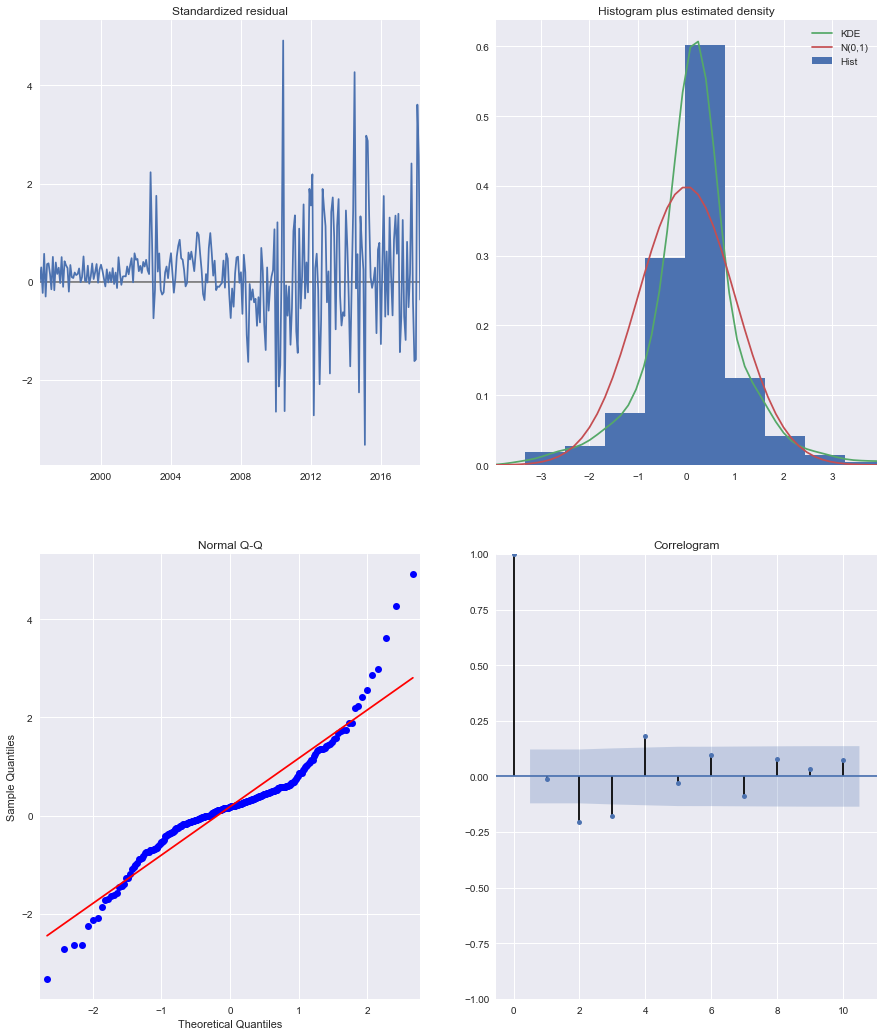

In [90]:
output_62043.plot_diagnostics(figsize=(15, 18))
plt.show()

In [91]:
ARIMA_MODEL_62027 = sm.tsa.statespace.SARIMAX((np.log(nyc_zip_62027)),
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output_62027 = ARIMA_MODEL_62027.fit()

print(output_62027.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9040      0.022     40.607      0.000       0.860       0.948
ma.L1          0.6870      0.036     19.291      0.000       0.617       0.757
sigma2      1.603e-05   7.23e-07     22.168      0.000    1.46e-05    1.74e-05


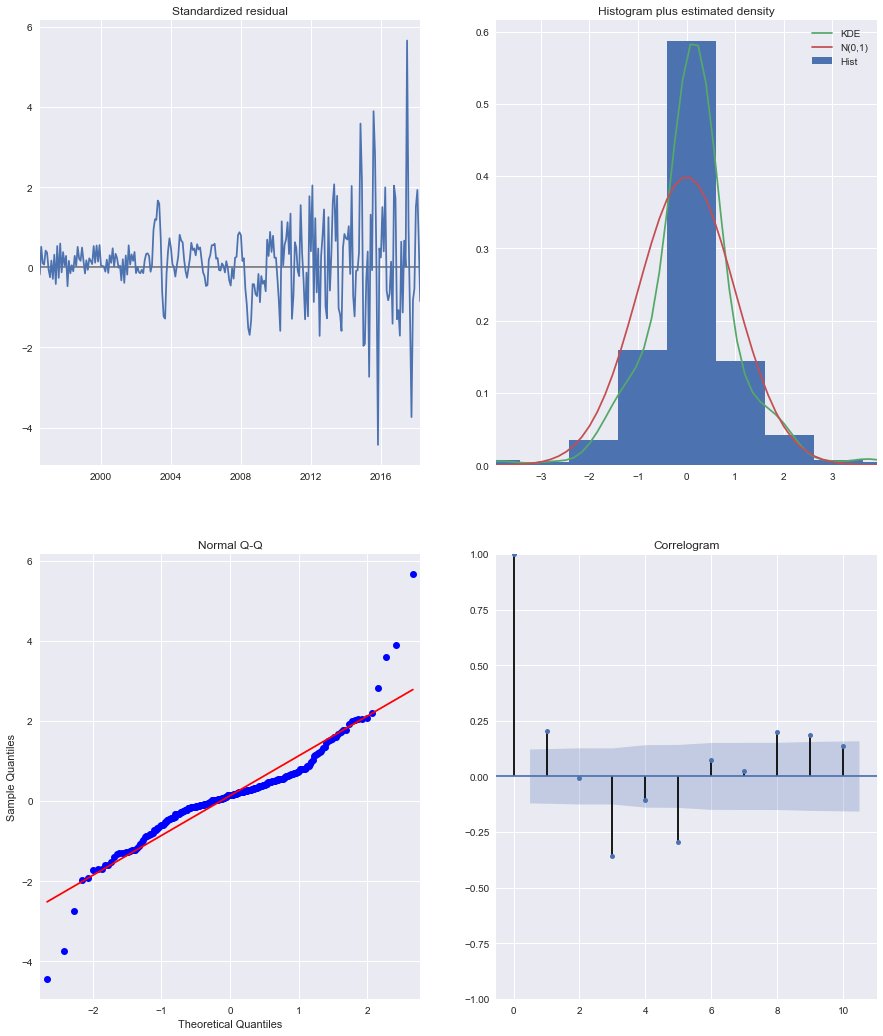

In [92]:
output_62027.plot_diagnostics(figsize=(15, 18))
plt.show()

In [93]:
ARIMA_MODEL_60643 = sm.tsa.statespace.SARIMAX((np.log(nyc_zip_60643)),
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output_60643 = ARIMA_MODEL_60643.fit()

print(output_60643.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8803      0.025     35.045      0.000       0.831       0.930
ma.L1          0.7432      0.033     22.528      0.000       0.679       0.808
sigma2      1.262e-05   7.34e-07     17.194      0.000    1.12e-05    1.41e-05


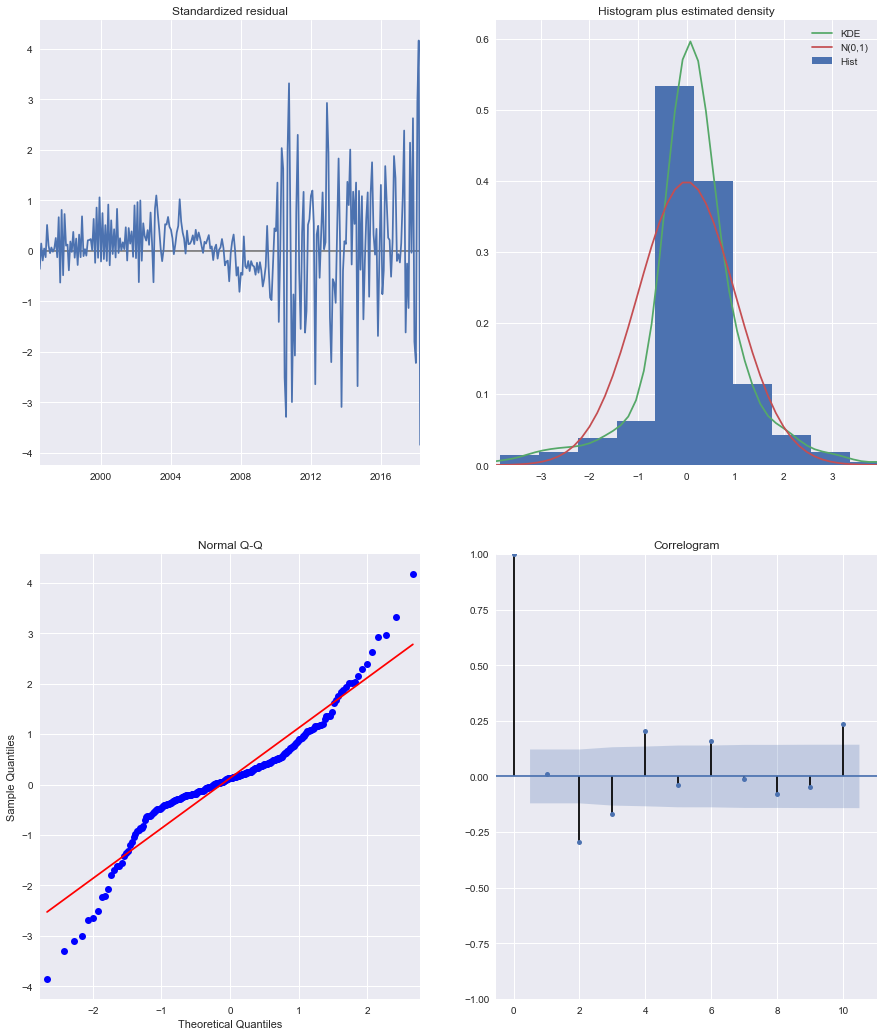

In [94]:
output_60643.plot_diagnostics(figsize=(15, 18))
plt.show()

In [95]:
ARIMA_MODEL_62044 = sm.tsa.statespace.SARIMAX((np.log(nyc_zip_62044)),
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output_62044 = ARIMA_MODEL_62044.fit()

print(output_62044.summary().tables[1])

ValueError: Number of endogenous variables in statespace model must be a positive number.

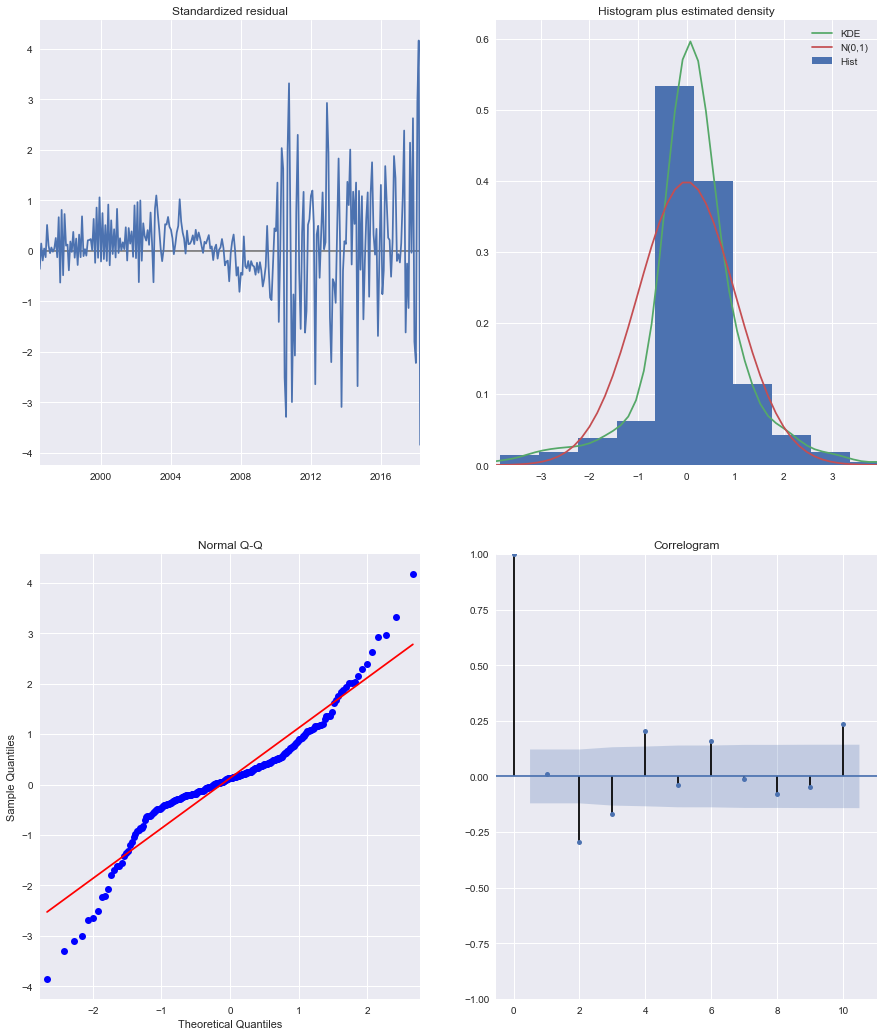

In [96]:
output_62044.plot_diagnostics(figsize=(15, 18))
plt.show()

In [97]:
ARIMA_MODEL_62043 = sm.tsa.statespace.SARIMAX((np.log(nyc_zip_62043)),
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output_62043 = ARIMA_MODEL_62043.fit()

print(output_62043.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8188      0.039     20.999      0.000       0.742       0.895
ma.L1          0.4533      0.041     11.083      0.000       0.373       0.533
sigma2      2.964e-05   1.65e-06     17.940      0.000    2.64e-05    3.29e-05


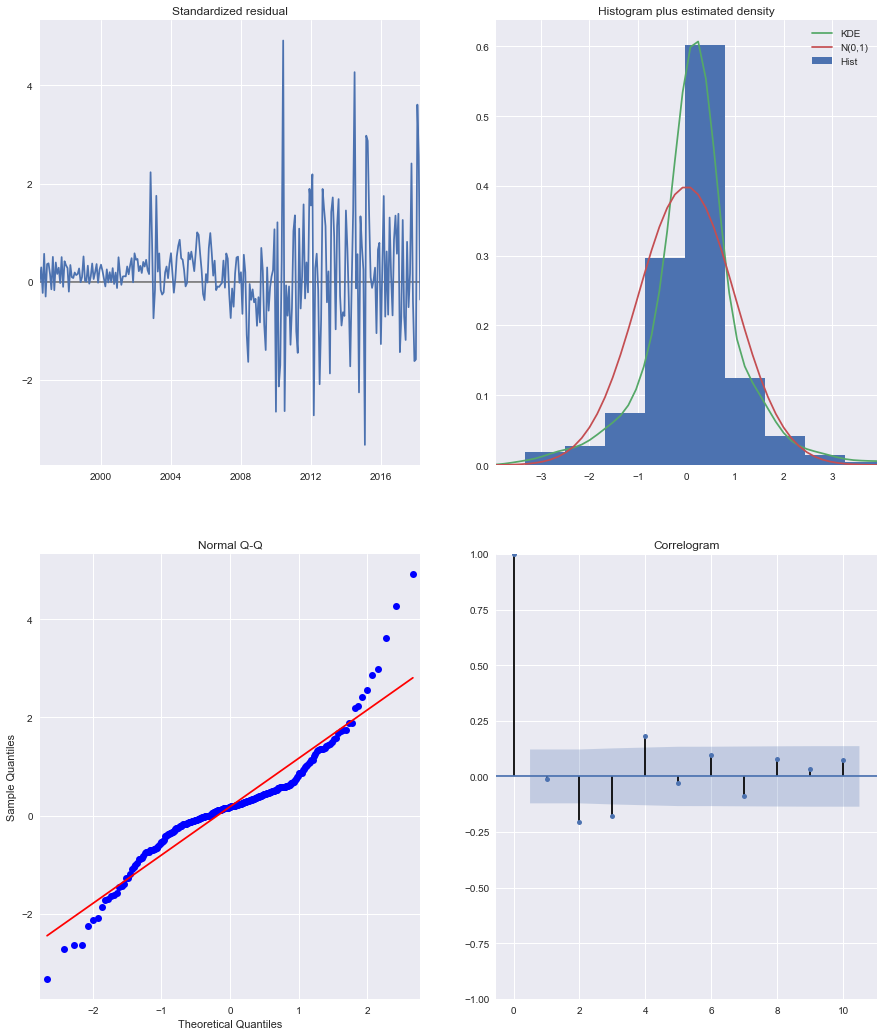

In [98]:
output_62043.plot_diagnostics(figsize=(15, 18))
plt.show()

In [99]:
ARIMA_MODEL_62310 = sm.tsa.statespace.SARIMAX((np.log(nyc_zip_62310)),
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output_62310 = ARIMA_MODEL_62310.fit()

print(output_62310.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7912      0.039     20.319      0.000       0.715       0.867
ma.L1          0.6828      0.034     19.869      0.000       0.615       0.750
sigma2      3.688e-05    1.6e-06     23.052      0.000    3.37e-05       4e-05


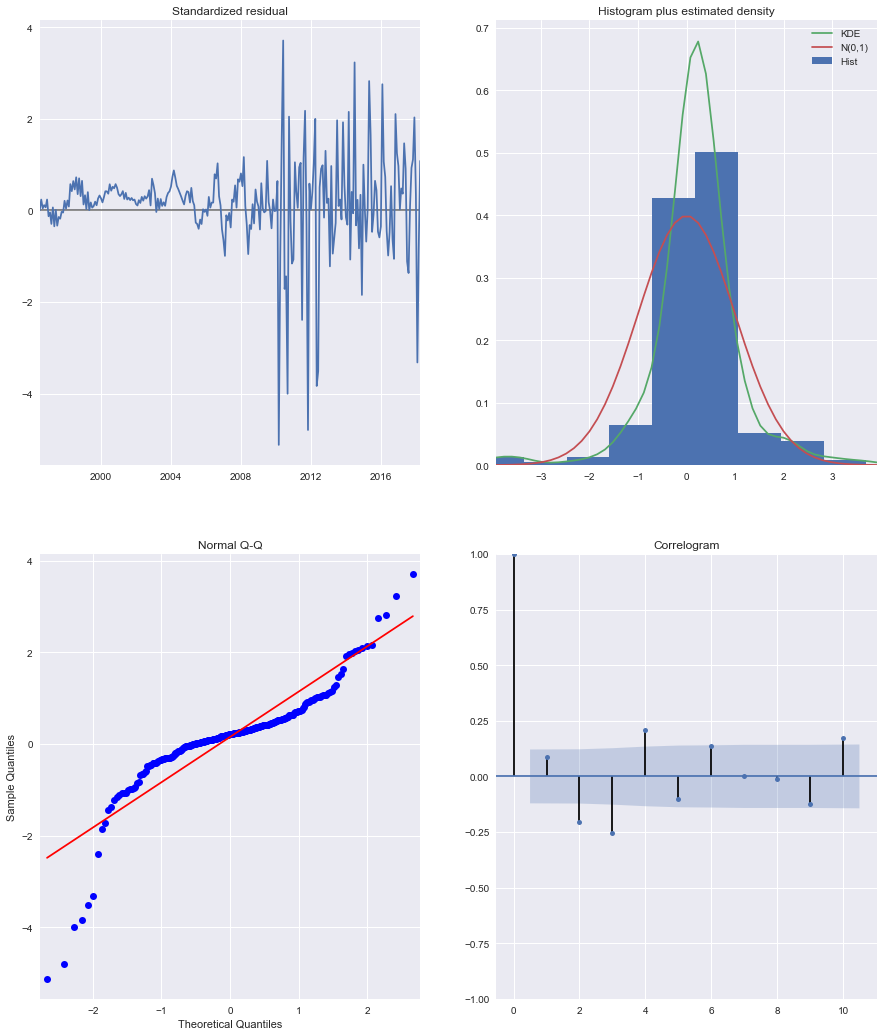

In [100]:
output_62310.plot_diagnostics(figsize=(15, 18))
plt.show()

In [101]:
ARIMA_MODEL_60685 = sm.tsa.statespace.SARIMAX((np.log(pot_nyc_zip_60685)),
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output_60685 = ARIMA_MODEL_60685.fit()

print(output_60685.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8039      0.035     22.983      0.000       0.735       0.872
ma.L1          0.7097      0.033     21.403      0.000       0.645       0.775
sigma2       1.33e-05      8e-07     16.641      0.000    1.17e-05    1.49e-05


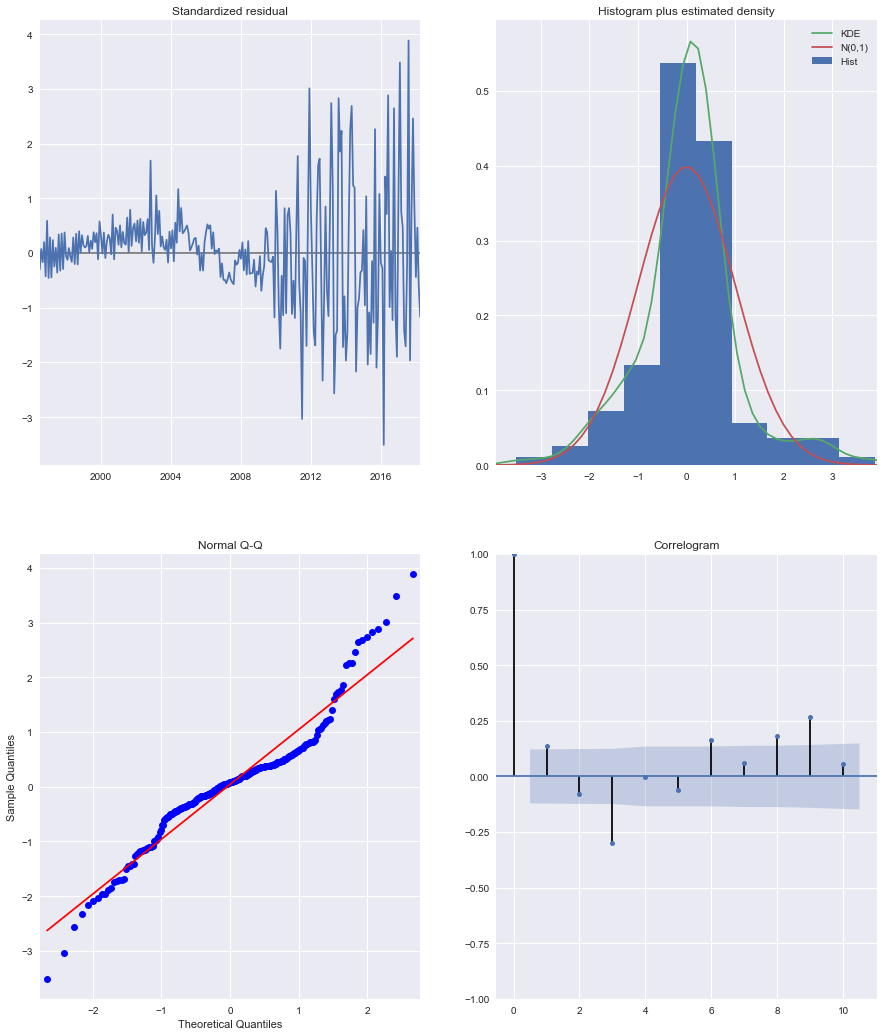

In [102]:
output_60685.plot_diagnostics(figsize=(15, 18))
plt.show()

In [103]:
ARIMA_MODEL_60663 = sm.tsa.statespace.SARIMAX((np.log(pot_nyc_zip_60663)),
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output_60663 = ARIMA_MODEL_60663.fit()

print(output_60663.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8293      0.024     34.113      0.000       0.782       0.877
ma.L1          0.7412      0.029     25.412      0.000       0.684       0.798
sigma2      1.312e-05   5.94e-07     22.078      0.000     1.2e-05    1.43e-05


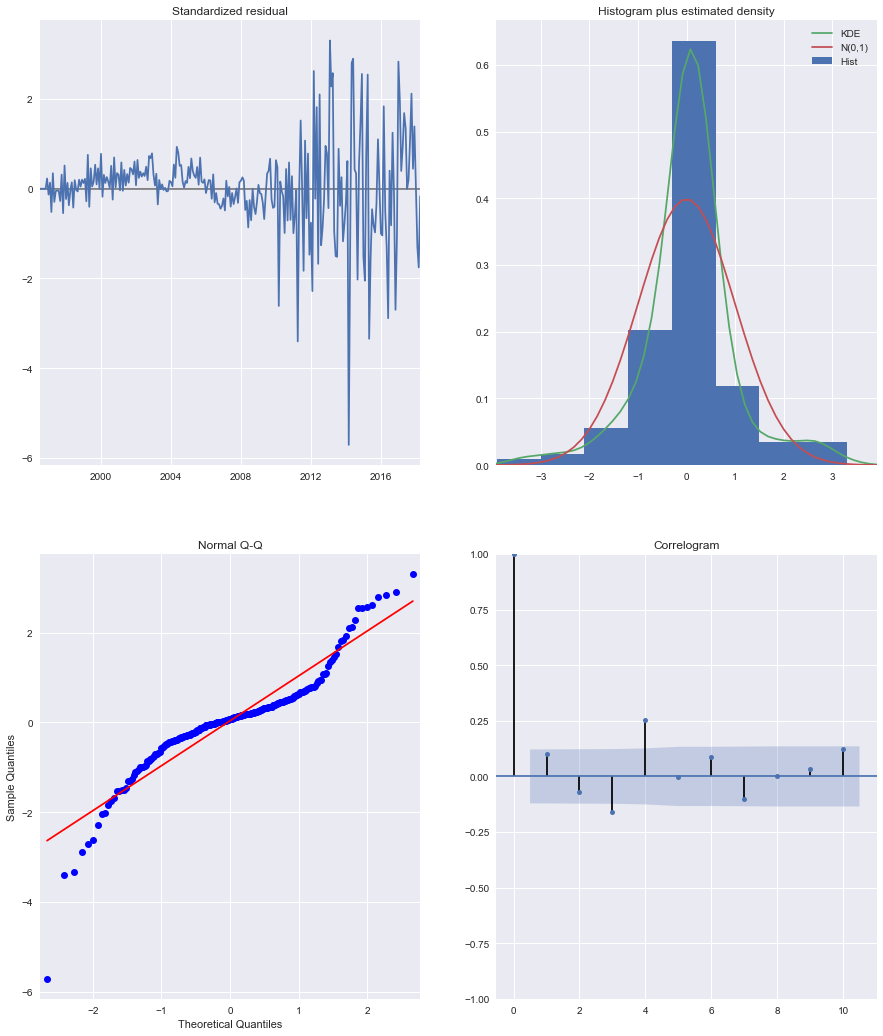

In [104]:
output_60663.plot_diagnostics(figsize=(15, 18))
plt.show()

In [105]:
ARIMA_MODEL_62690 = sm.tsa.statespace.SARIMAX((np.log(pot_nyc_zip_62690)),
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output_62690 = ARIMA_MODEL_62690.fit()

print(output_62690.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7613      0.029     26.624      0.000       0.705       0.817
ma.L1          0.7256      0.027     26.858      0.000       0.673       0.779
sigma2      1.407e-05    6.8e-07     20.695      0.000    1.27e-05    1.54e-05


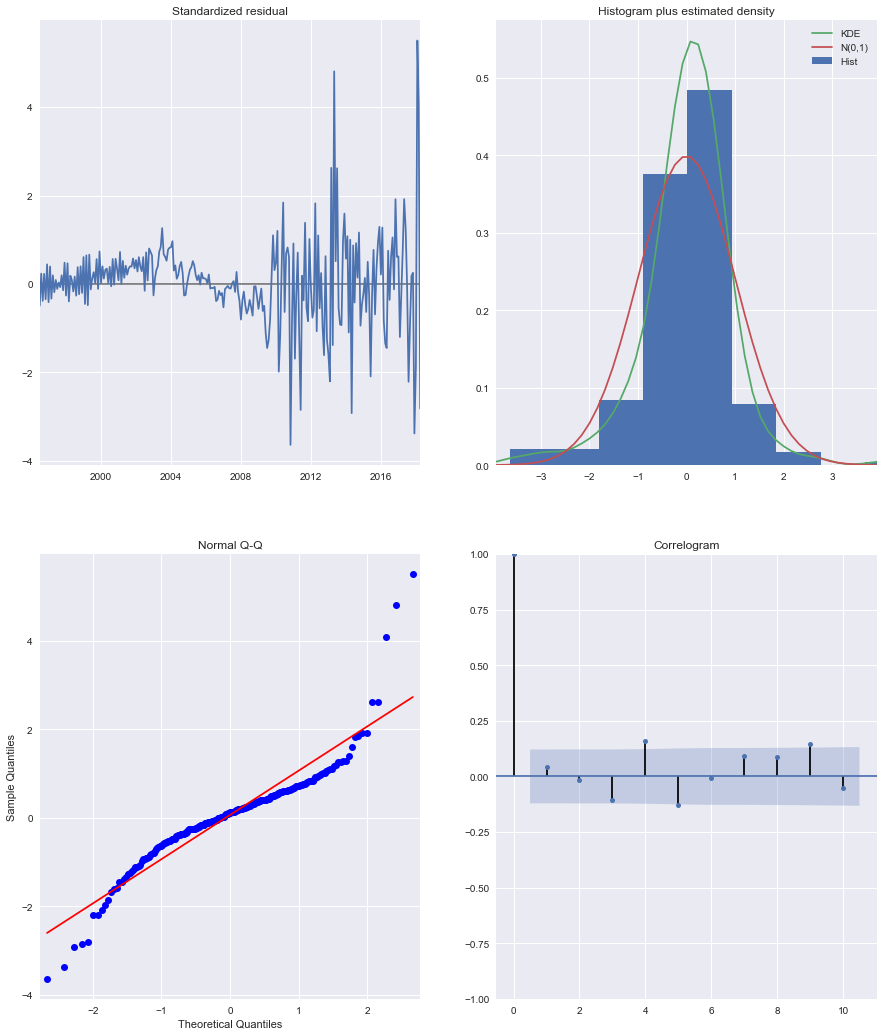

In [106]:
output_62690.plot_diagnostics(figsize=(15, 18))
plt.show()

In [107]:
ARIMA_MODEL_60659 = sm.tsa.statespace.SARIMAX((np.log(pot_nyc_zip_60659)),
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output_60659 = ARIMA_MODEL_60659.fit()

print(output_60659.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6890      0.039     17.800      0.000       0.613       0.765
ma.L1          0.7214      0.031     23.364      0.000       0.661       0.782
sigma2      1.735e-05   9.82e-07     17.662      0.000    1.54e-05    1.93e-05


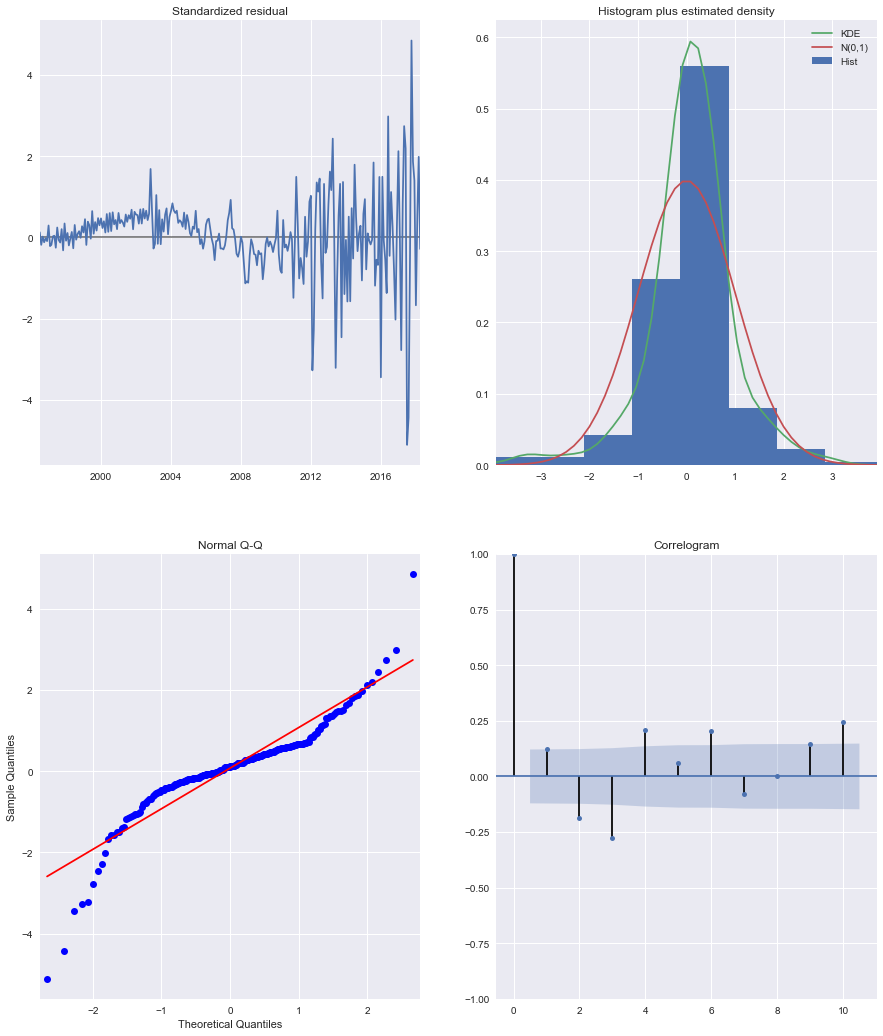

In [108]:
output_60659.plot_diagnostics(figsize=(15, 18))
plt.show()

In [109]:
ARIMA_MODEL_61838 = sm.tsa.statespace.SARIMAX((np.log(pot_nyc_zip_61838)),
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output_61838 = ARIMA_MODEL_61838.fit()

print(output_61838.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6402      0.041     15.794      0.000       0.561       0.720
ma.L1          0.7221      0.033     22.128      0.000       0.658       0.786
sigma2      2.639e-05   1.34e-06     19.626      0.000    2.38e-05     2.9e-05


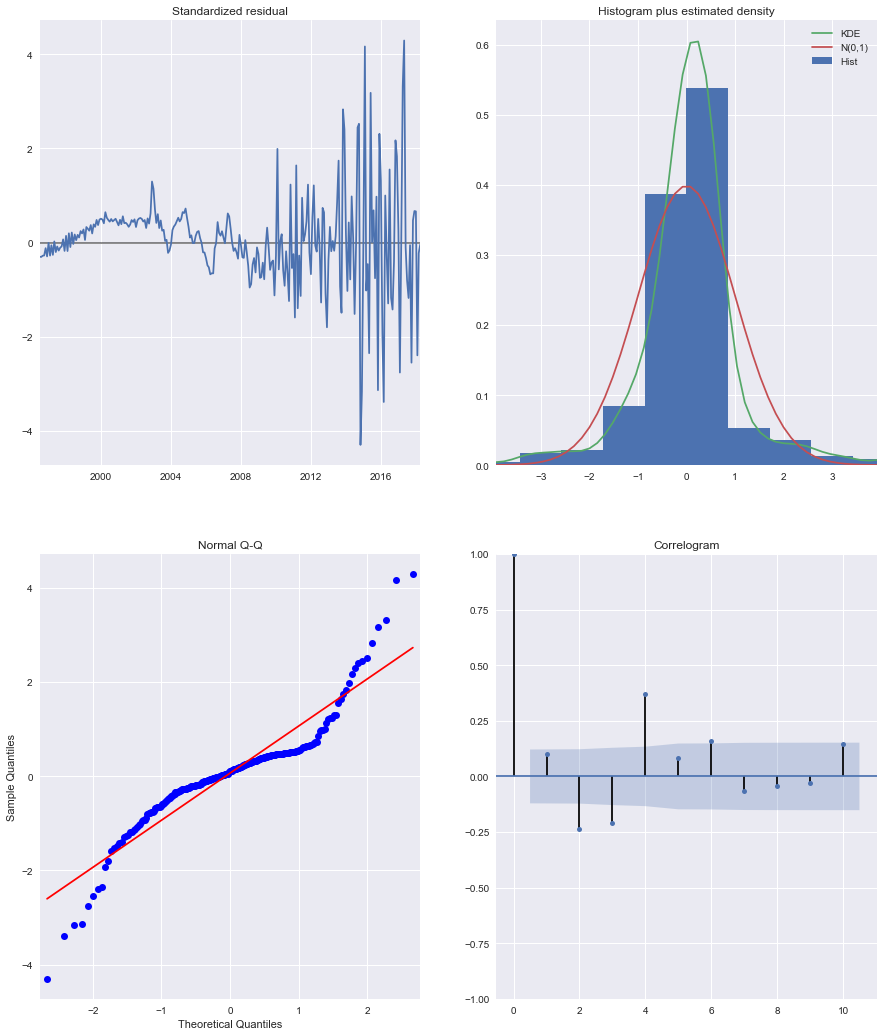

In [110]:
output.plot_diagnostics(figsize=(15, 18))
plt.show()

In [111]:
ARIMA_MODEL_62026 = sm.tsa.statespace.SARIMAX((np.log(top_nat_zip_62026)),
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output_62026 = ARIMA_MODEL_62026.fit()

print(output_62026.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8559      0.031     27.692      0.000       0.795       0.916
ma.L1          0.6720      0.034     19.922      0.000       0.606       0.738
sigma2      2.116e-05   1.28e-06     16.588      0.000    1.87e-05    2.37e-05


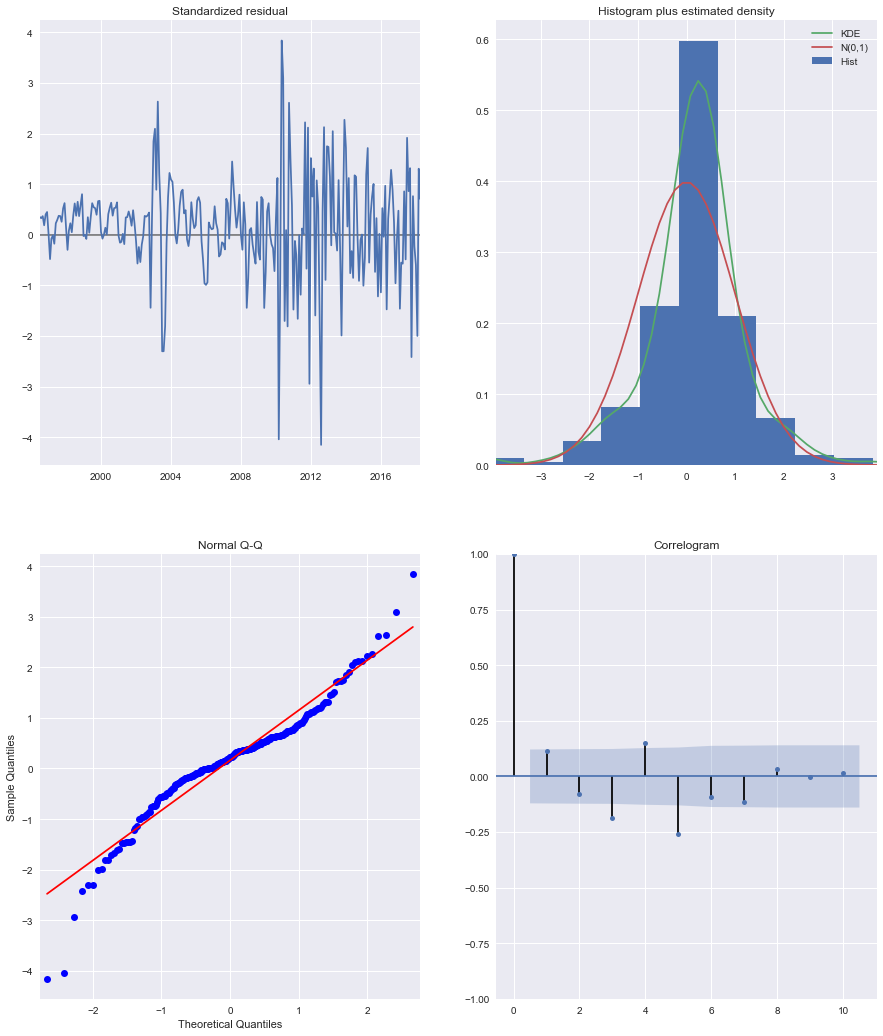

In [112]:
output_62026.plot_diagnostics(figsize=(15, 18))
plt.show()

In [113]:
ARIMA_MODEL_62022 = sm.tsa.statespace.SARIMAX((np.log(top_nat_zip_62022)),
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output_62022 = ARIMA_MODEL_62022.fit()

print(output_62022.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8067      0.038     21.297      0.000       0.732       0.881
ma.L1          0.5254      0.039     13.433      0.000       0.449       0.602
sigma2      4.006e-05   2.18e-06     18.405      0.000    3.58e-05    4.43e-05


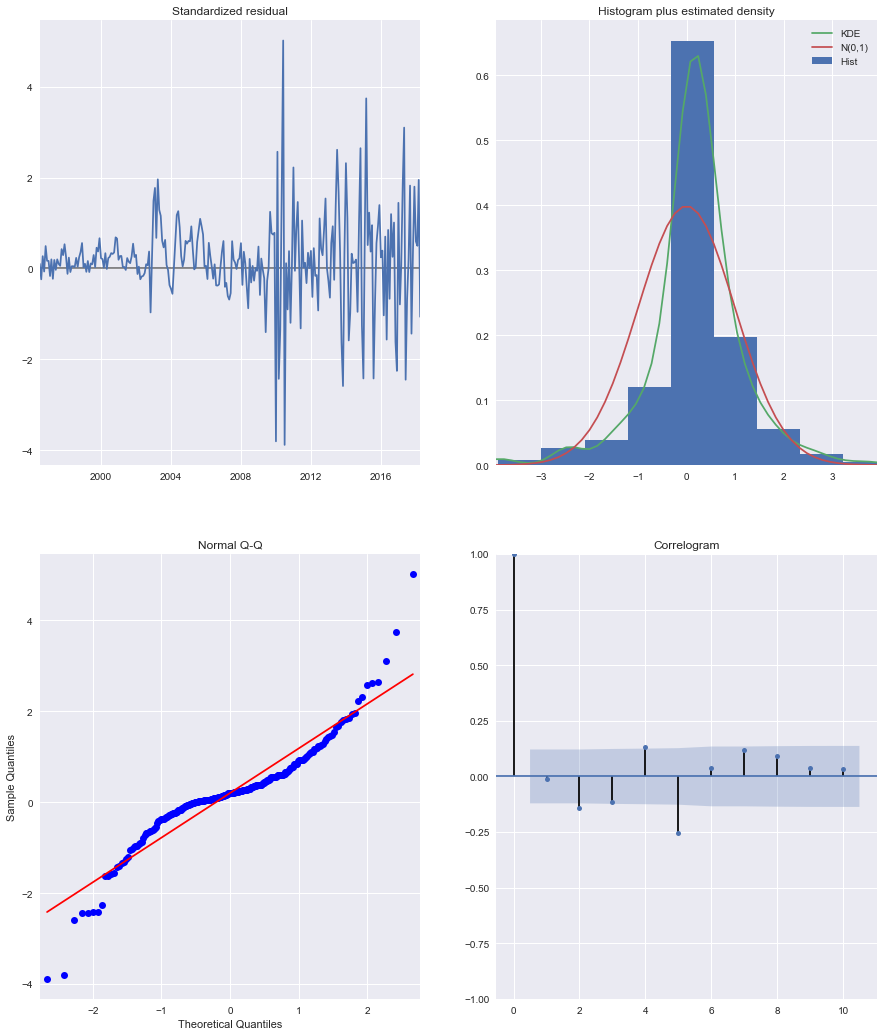

In [114]:
output_62022.plot_diagnostics(figsize=(15, 18))
plt.show()

In [115]:
ARIMA_MODEL_60639 = sm.tsa.statespace.SARIMAX((np.log(top_nat_zip_60639)),
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output_60639 = ARIMA_MODEL_60639.fit()

print(output_60639.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8838      0.030     29.761      0.000       0.826       0.942
ma.L1          0.7698      0.027     28.239      0.000       0.716       0.823
sigma2      1.615e-05   1.11e-06     14.539      0.000     1.4e-05    1.83e-05


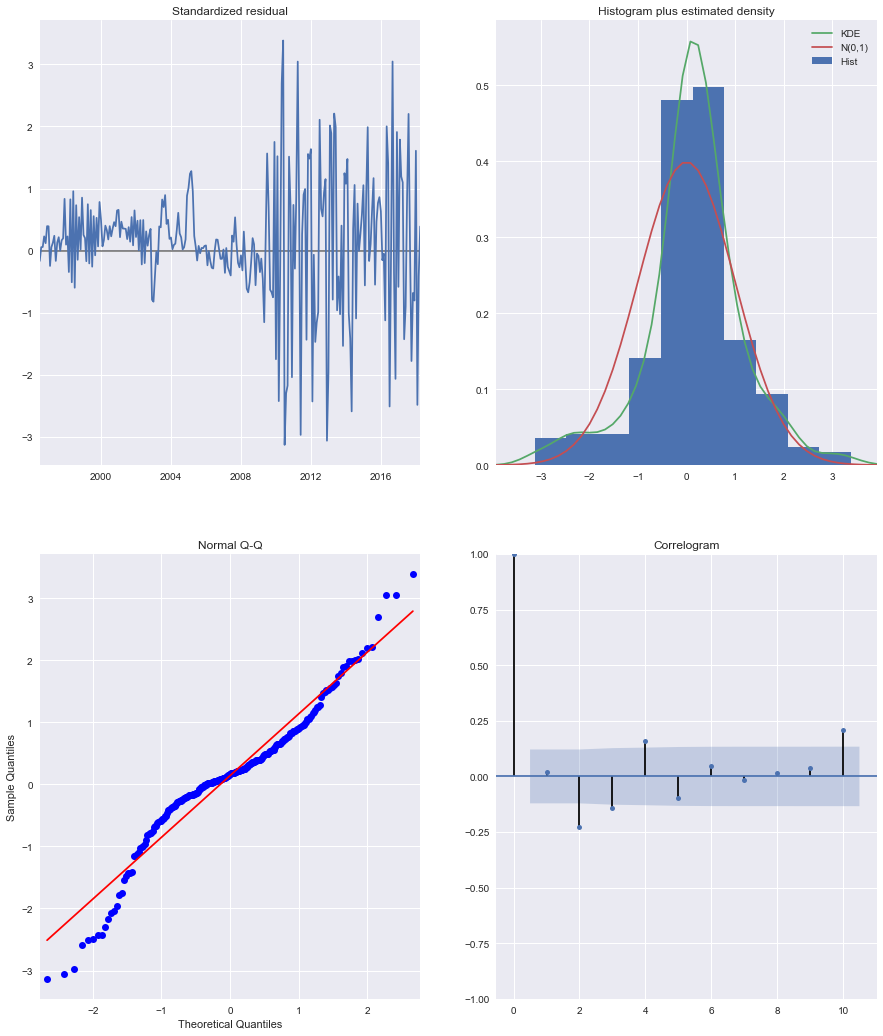

In [116]:
output_60639.plot_diagnostics(figsize=(15, 18))
plt.show()

In [117]:
ARIMA_MODEL_62027 = sm.tsa.statespace.SARIMAX((np.log(top_nat_zip_62027)),
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output_62027 = ARIMA_MODEL_62027.fit()

print(output_62027.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9040      0.022     40.607      0.000       0.860       0.948
ma.L1          0.6870      0.036     19.291      0.000       0.617       0.757
sigma2      1.603e-05   7.23e-07     22.168      0.000    1.46e-05    1.74e-05


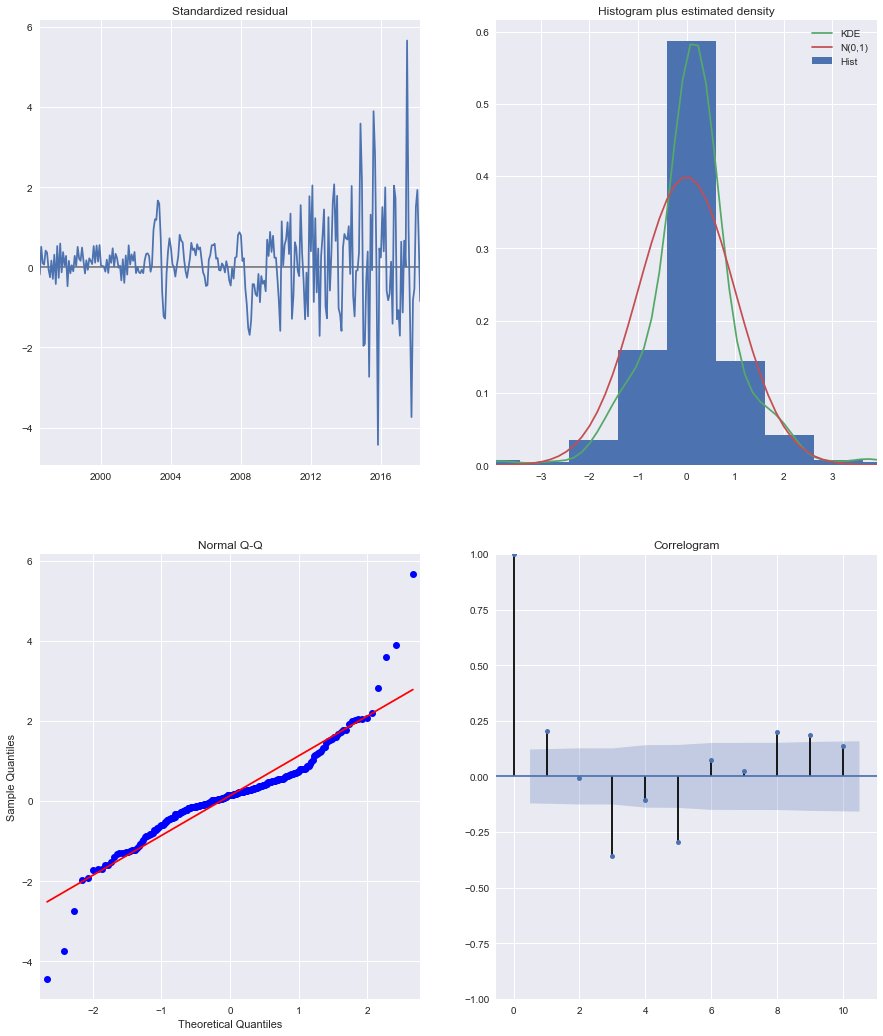

In [118]:
output_62027.plot_diagnostics(figsize=(15, 18))
plt.show()

In [119]:
ARIMA_MODEL_62033 = sm.tsa.statespace.SARIMAX((np.log(top_nat_zip_62033)),
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output_62033 = ARIMA_MODEL_62033.fit()

print(output_62033.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7952      0.030     26.535      0.000       0.736       0.854
ma.L1          0.7154      0.030     24.012      0.000       0.657       0.774
sigma2      3.276e-05   1.91e-06     17.133      0.000     2.9e-05    3.65e-05


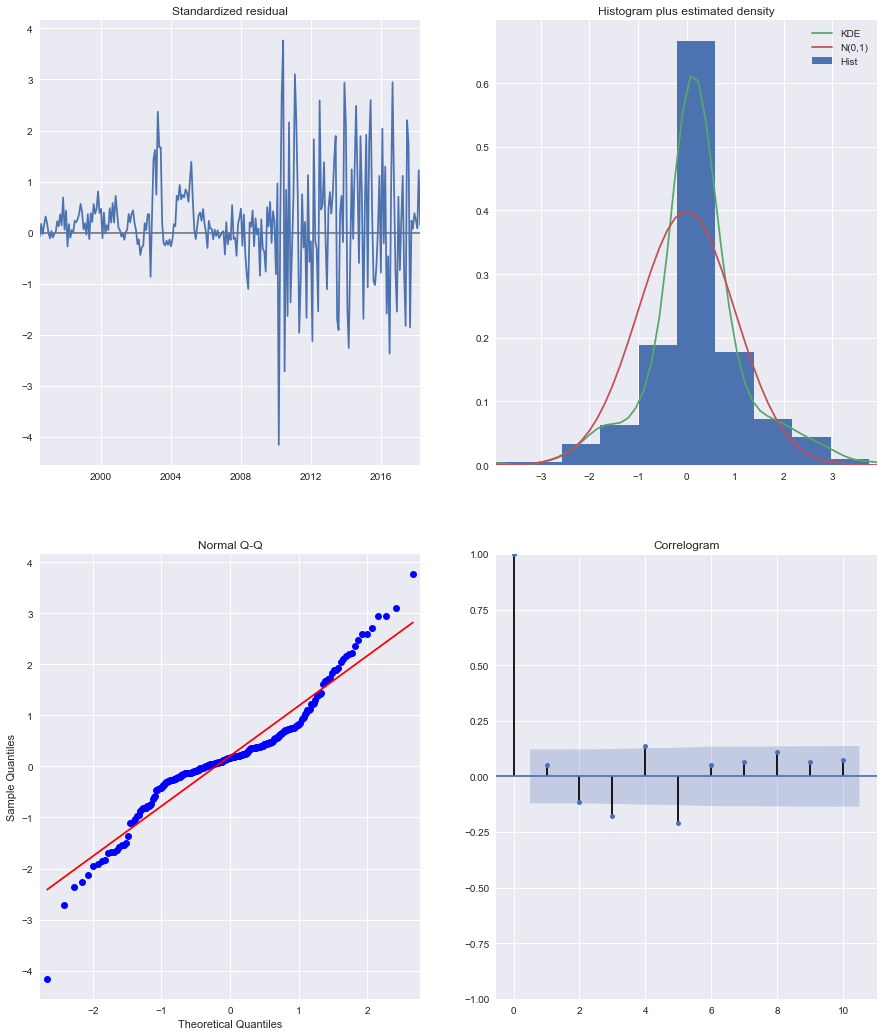

In [120]:
output_62033.plot_diagnostics(figsize=(15, 18))
plt.show()

In [121]:
ARIMA_MODEL_79247 = sm.tsa.statespace.SARIMAX((np.log(pot_nat_zip_79247)),
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output_79247 = ARIMA_MODEL_79247.fit()

print(output_79247.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5402      0.050     10.841      0.000       0.443       0.638
ma.L1          0.6163      0.042     14.677      0.000       0.534       0.699
sigma2         0.0002    1.1e-05     16.342      0.000       0.000       0.000


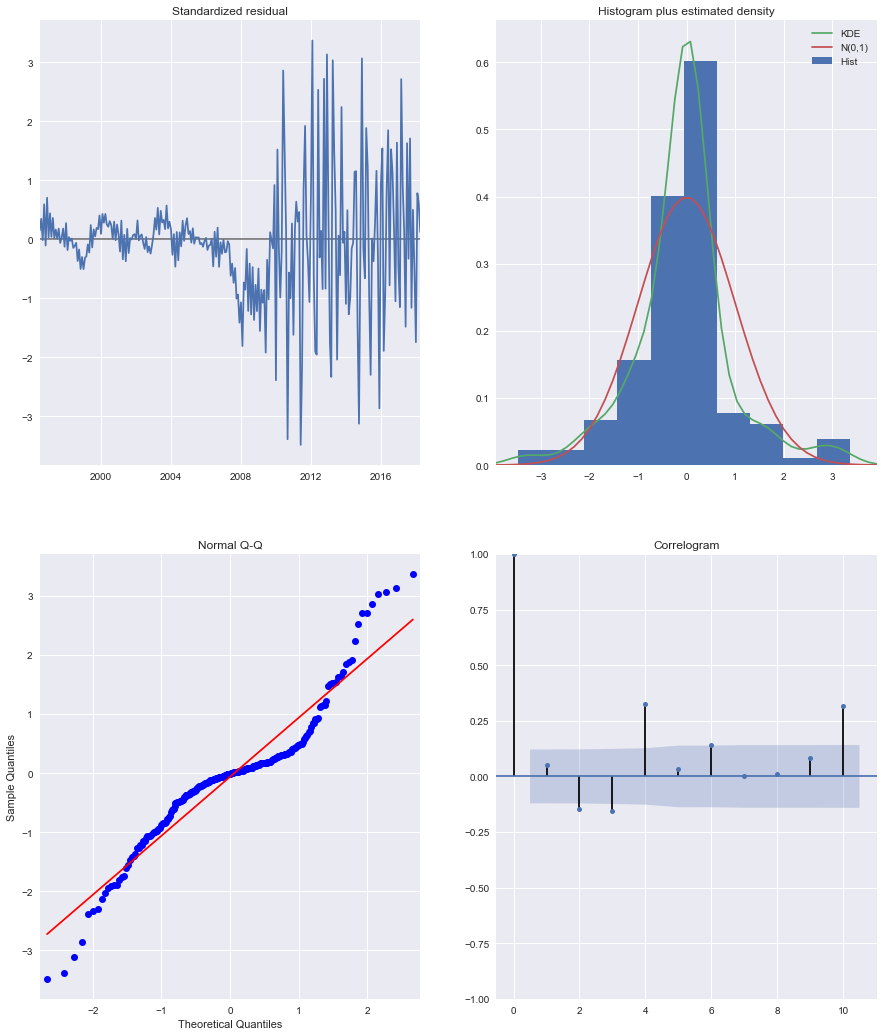

In [122]:
output_79247.plot_diagnostics(figsize=(15, 18))
plt.show()

In [123]:
ARIMA_MODEL_79244 = sm.tsa.statespace.SARIMAX((np.log(pot_nat_zip_79244)),
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output_79244 = ARIMA_MODEL_79244.fit()

print(output_79244.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7351      0.038     19.255      0.000       0.660       0.810
ma.L1          0.5483      0.039     14.183      0.000       0.473       0.624
sigma2      8.444e-05   5.99e-06     14.092      0.000    7.27e-05    9.62e-05


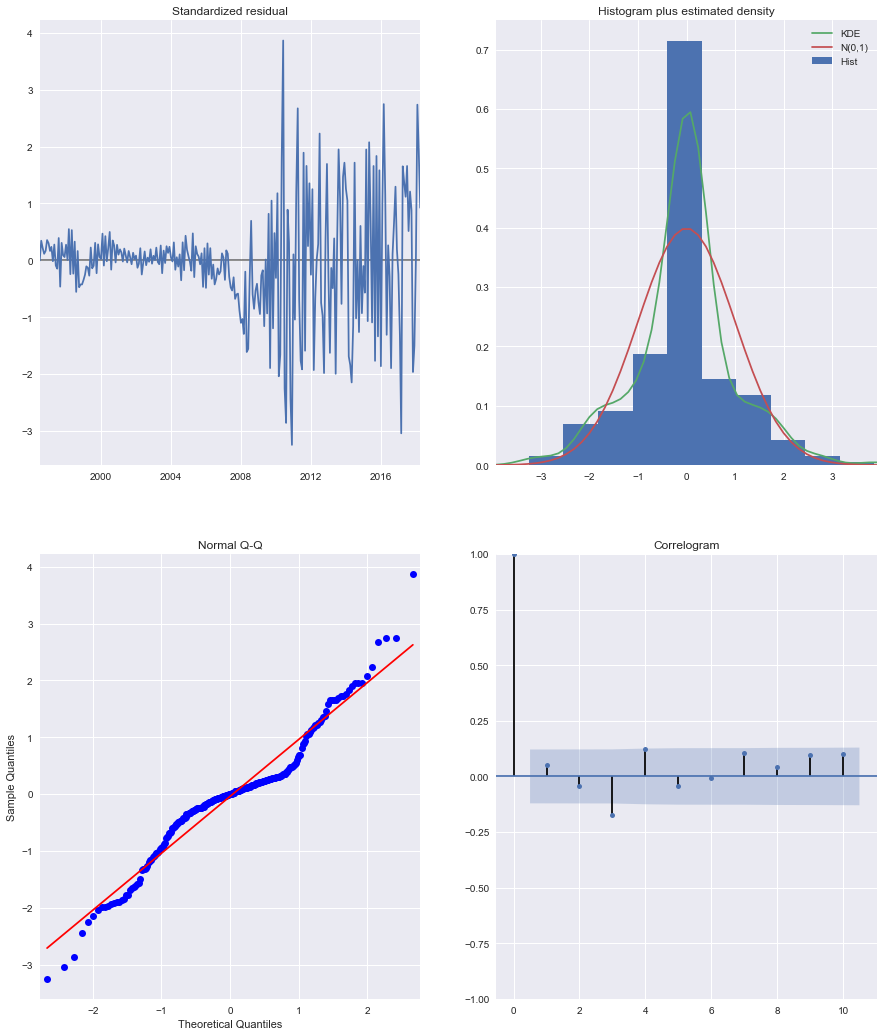

In [124]:
output_79244.plot_diagnostics(figsize=(15, 18))
plt.show()

In [125]:
ARIMA_MODEL_92646 = sm.tsa.statespace.SARIMAX((np.log(pot_nat_zip_92646)),
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output_92646 = ARIMA_MODEL_92646.fit()

print(output_92646.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9397      0.021     44.125      0.000       0.898       0.981
ma.L1          0.7528      0.036     20.843      0.000       0.682       0.824
sigma2      3.249e-06   1.67e-07     19.492      0.000    2.92e-06    3.58e-06


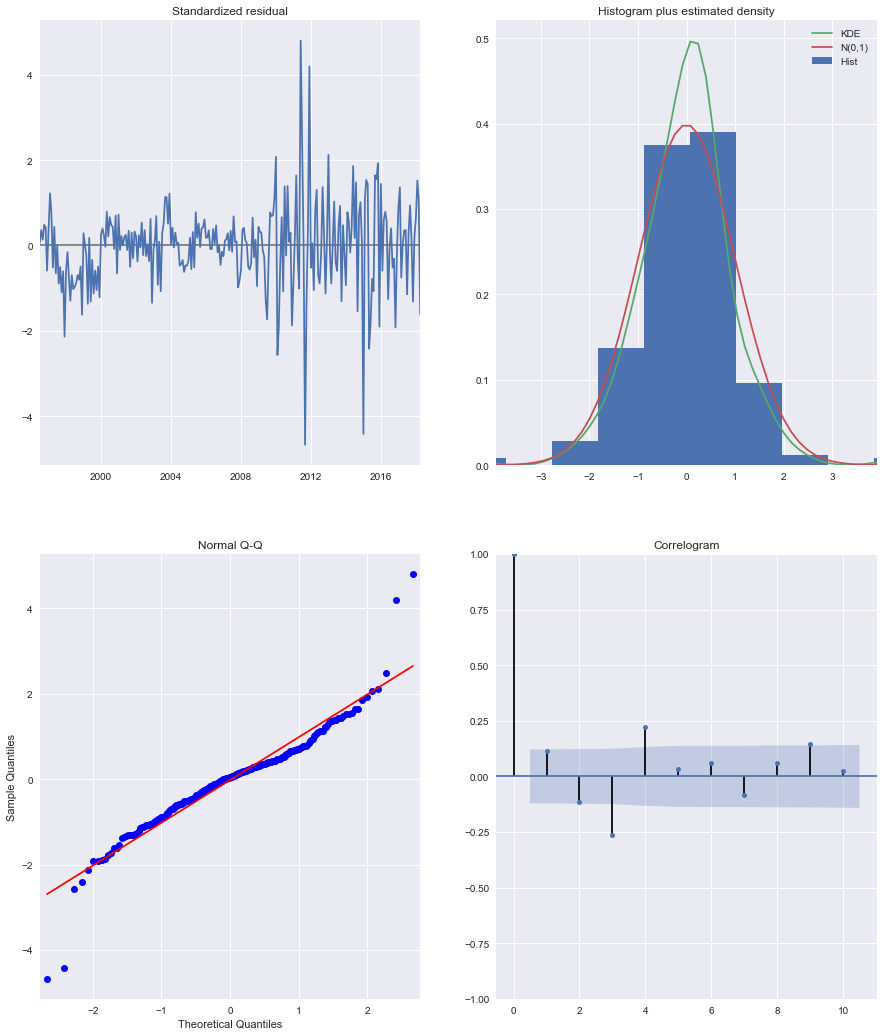

In [126]:
output_92646.plot_diagnostics(figsize=(15, 18))
plt.show()

In [127]:
ARIMA_MODEL_64354 = sm.tsa.statespace.SARIMAX((np.log(pot_nat_zip_64354)),
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output_64534 = ARIMA_MODEL_64354.fit()

print(output_64534.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7868      0.022     35.410      0.000       0.743       0.830
ma.L1          0.5772      0.039     14.706      0.000       0.500       0.654
sigma2      2.132e-05   9.65e-07     22.099      0.000    1.94e-05    2.32e-05


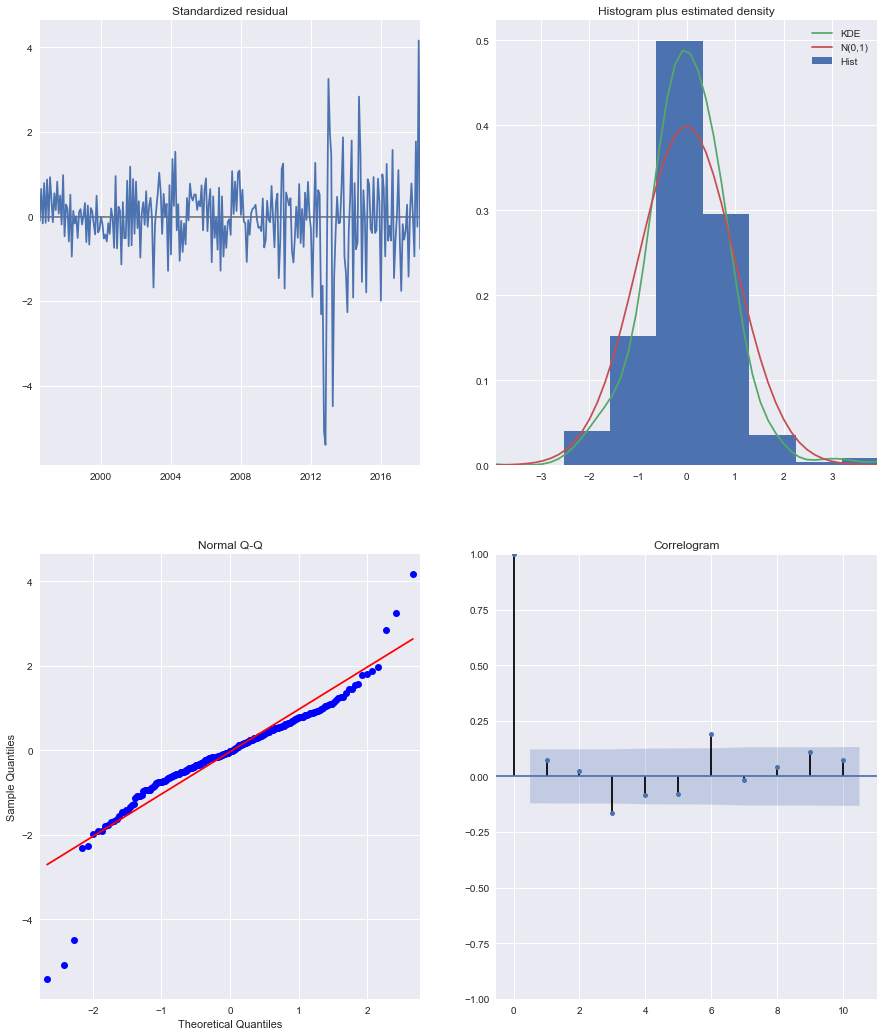

In [128]:
output_64354.plot_diagnostics(figsize=(15, 18))
plt.show()

In [129]:
ARIMA_MODEL_84758 = sm.tsa.statespace.SARIMAX((np.log(pot_nat_zip_84758)),
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

output_84758 = ARIMA_MODEL_84758.fit()

print(output_84758.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8475      0.027     31.373      0.000       0.795       0.900
ma.L1          0.5681      0.031     18.579      0.000       0.508       0.628
sigma2      1.675e-05   7.76e-07     21.588      0.000    1.52e-05    1.83e-05


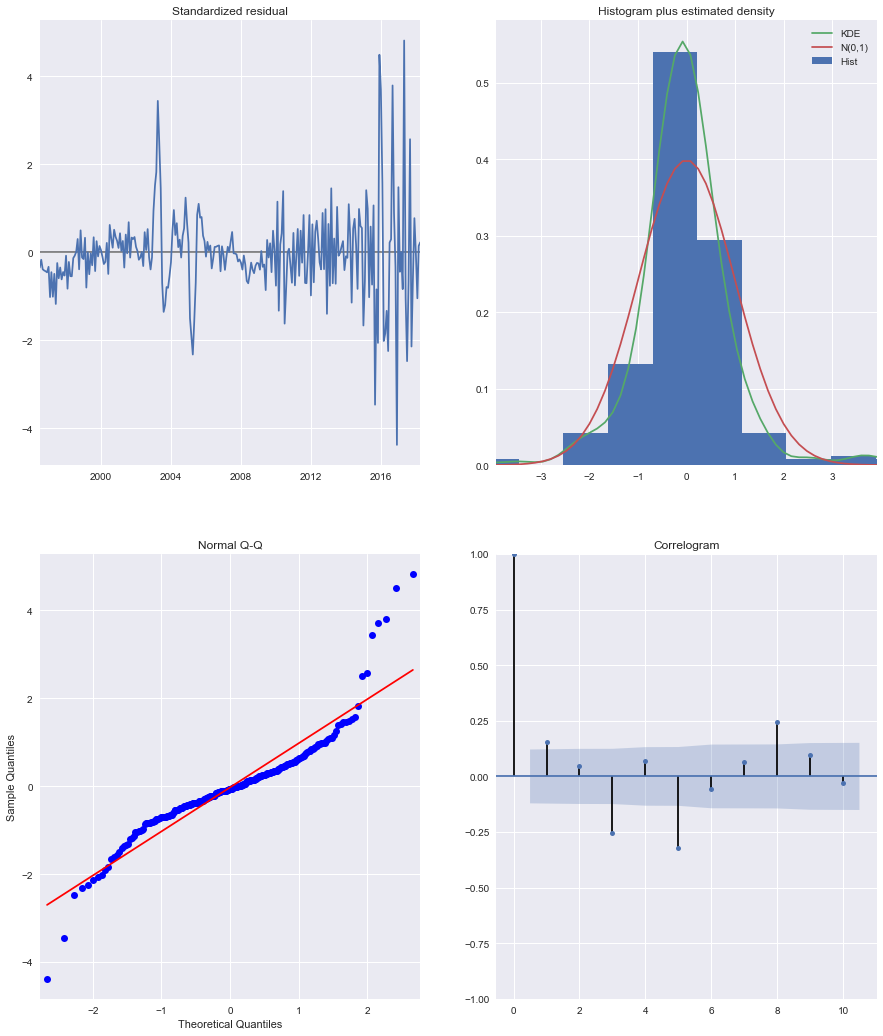

In [130]:
output_84758.plot_diagnostics(figsize=(15, 18))
plt.show()

# Step 6: One-Step Forecasting

In [143]:
pred_62043 = output_62043.get_prediction(start=pd.to_datetime('2012-01-01'), dynamic=False)
pred_conf_62043 = pred_62043.conf_int()

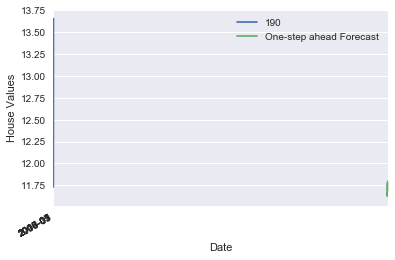

In [148]:
#plot observed values
ax = np.log(nyc_zip_62043['1996-04-01':]).plot(label='observed')

#plot predicted values
pred_62043.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9)

#plot the range for confidence intervals
ax.fill_between(pred_conf_62043.index,
                pred_conf_62043.iloc[:, 0],
                pred_conf_62043.iloc[:, 1], color='g', alpha=.2)

#set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('House Values')
plt.legend()

plt.show()

# Step 7: Dynamic Forecasting

In [ ]:
#get the real and predicted values
top_nyc_62043_forecasted = pred.predicted_mean
dfw_75081_truth = log_75081['2012-01-01':].values

#compute the mean square error
rmse_75081 = np.sqrt(((dfw_75081_forecasted - dfw_75081_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse_75081, 2)))

In [ ]:
#get forecast 60 steps (5 years) ahead in future
prediction = output.get_forecast(steps=61)

#get confidence intervals of forecasts
pred_conf = prediction.conf_int()

In [ ]:
#plot future predictions with confidence intervals

ax = log_75081.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('House Values')

plt.legend()
plt.show()

In [ ]:
pred_dynamics =[]
for output in outputs:
    pred_dynamic = output.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=True, full_results=True)
    pred_dynamic_conf = pred_dynamic.conf_int()
    pred_dynamics.append((pred_dynamic, pred_dynamic_conf))

In [ ]:
for i , pred_dynamic in enumerate(pred_dynamics):
    series = timeseries[i][1]
    
    
    
    # Get the Real and predicted values
    series_forecasted = pred_dynamic[0].predicted_mean
    series_truth = series['2017-01-01':].squeeze()

    # series_truth.squeeze()
    # Compute the mean square error
    rmse = np.sqrt(((series_forecasted-series_truth)**2).mean())

    print(titles[i],'\n')
    print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))
    print('The root mean squared error'.title()
          + 'of our forcase is'
          +'{}% of mean housing price from 2017.'.format(round(rmse/series_truth.mean()*100,3)))
    # The Mean Squared Error of our forecasts is 0.07
    
    
    ax = series['2015':].plot(label='observed', figsize=(20, 15))
    pred_dynamic[0].predicted_mean.plot(label='Dynamic Forecast', ax=ax)

    ax.fill_between(pred_dynamic[1].index,
                    pred_dynamic[1].iloc[:, 0],
                    pred_dynamic[1].iloc[:, 1], color='g', alpha=.3)

    ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-01'), series_forecasted.index[-1], alpha=.1, zorder=-1)

    ax.set_xlabel('Date')
    ax.set_ylabel('Housing Price')
    ax.set_title(titles[i])
    plt.legend()
    plt.show()

# Step 8: Interpreting Results (Actual v. Predicted)

In [ ]:
profits =[]
compare = []
for i, prediction in enumerate(forecasts):
   
    actual =  timeseries[i][1]['2018-04'].values[0][0] 
    future = prediction[0].predicted_mean['2021-04'].values[0]
    limits = prediction[1]['2020-04'].values[0]
    
    profit = future-actual
    compare.append(((i,titles[i]),round(profit,0),round(profit/actual*100,0), actual, future, limits))
    
    #sorting the profit margins by the relative quantities (% increase)
    compare_sorted_rel = sorted(compare, key = lambda x:x[2], reverse = True)

In [ ]:
topbar =[]
bottombar =[]
yerrs =[]
xs =[]
label =[]
for i in range(len(compare_sorted_rel)):
    topbar.append(round(compare_sorted_rel[i][4],0))
    bottombar.append(round(compare_sorted_rel[i][3],0))
    yerrs.append(round(compare_sorted_rel[i][-1][1]- compare_sorted_rel[i][-2],0))
    idx = compare_sorted_rel[i][0][0]
    label.append(str(compare_sorted_rel[i][2])[:-2]+'%')
    xs.append(str(timeseries[idx][0].RegionName.values[0]))

In [ ]:
plt.style.use('seaborn')
fig = plt.figure(figsize =(20,8))
x = range(1,len(topbar)+1)
plt.bar(x,topbar,yerr=yerrs, color = "red", label ='April 2021')
plt.bar(x, bottombar, color = "blue", label ='April 2018')

for i in range(len(label)):
    plt.text(x=x[i]+0.1,y=topbar[i]+500000, s=label[i],fontsize = 18)

plt.gcf().autofmt_xdate()
plt.legend(fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ticklabel_format(style ='plain')
plt.title('Comparisons between actual price in April 2018 and predicted price in April 2021', fontsize=20)
plt.gcf().autofmt_xdate()

In [ ]:
for i in range(len(compare_sorted_rel)):
    print(compare_sorted_rel[i][0][1], '\t',label[i])